<a href="https://colab.research.google.com/github/LukeHolmessba23038/Planning-Application-Issue-Detector/blob/main/Irish_Planning_Data_Ireland_Cloud_Version_No_API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files

# Upload your file from local system
uploaded = files.upload()


Saving Tableau_Ready_Planning_Applications_With_Street_Town_Cleaned.xlsx to Tableau_Ready_Planning_Applications_With_Street_Town_Cleaned.xlsx


In [ ]:
!pip install openpyxl


In [ ]:
import pandas as pd
import numpy as np

# The filename will be the same as the file you uploaded
filename = 'Tableau_Ready_Planning_Applications_With_Street_Town_Cleaned.xlsx'

# Load the dataset from the Excel file
df = pd.read_excel(filename)

# Quick overview of the data (EDA)
print("Data Types:\n", df.dtypes)
print("\nMissing Values:\n", df.isnull().sum())
print("\nBasic Statistics (Numeric Columns):\n", df.describe())

# Check the first few rows of the dataset
print("\nFirst 5 Rows of Data:\n", df.head())


Data Types:
 OBJECTID                    int64
PlanningAuthority          object
ApplicationNumber          object
DevelopmentDescription     object
DevelopmentAddress         object
ApplicationStatus          object
ApplicationType            object
Decision                   object
LandUseCode                object
AreaofSite                float64
NumResidentialUnits         int64
OneOffHouse                object
FloorArea                 float64
ReceivedDate               object
DecisionDate               object
DecisionDueDate            object
GrantDate                  object
ExpiryDate                 object
FIRequestDate              object
FIRecDate                  object
LinkAppDetails             object
OneOffKPI                  object
ETL_DATE                   object
geometry                   object
County                     object
ClosestCity                object
Longitude                 float64
Latitude                  float64
Eircode                    object
C

In [ ]:
# Install necessary libraries
!pip install plotly dash
!pip install seaborn matplotlib
!pip install nltk scikit-learn
!pip install transformers


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 50.4 MB/s eta 0:00:00


In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
date_columns = ['ReceivedDate', 'DecisionDate', 'DecisionDueDate', 'GrantDate', 'ExpiryDate']
for date_col in date_columns:
    df[date_col] = pd.to_datetime(df[date_col], errors='coerce')

# Step 3: Fill missing values for 'LandUseCode' with 'Unknown'
df['LandUseCode'].fillna('Unknown', inplace=True)

# Step 4: Fill missing 'DecisionDueDate' based on the average time between 'ReceivedDate' and 'DecisionDate'
df['DecisionDueDate'] = df['DecisionDueDate'].fillna(df['ReceivedDate'] + (df['DecisionDate'] - df['ReceivedDate']).mean())

# Step 5: Fill 'GrantDate' and 'ExpiryDate' with placeholder 'Not Available'
df['GrantDate'].fillna('Not Available', inplace=True)
df['ExpiryDate'].fillna('Not Available', inplace=True)

# Step 6: Display updated missing value summary
missing_values_after_fill = df[['LandUseCode', 'DecisionDueDate', 'GrantDate', 'ExpiryDate']].isnull().sum()
print("Missing Values After Filling:\n", missing_values_after_fill)

<ipython-input-6-3cf781badd21>:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Not Available' has dtype incompatible with datetime64[ns, UTC], please explicitly cast to a compatible dtype first.
  df['GrantDate'].fillna('Not Available', inplace=True)
<ipython-input-6-3cf781badd21>:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Not Available' has dtype incompatible with datetime64[ns, UTC], please explicitly cast to a compatible dtype first.
  df['ExpiryDate'].fillna('Not Available', inplace=True)


Missing Values After Filling:
 LandUseCode        0
DecisionDueDate    0
GrantDate          0
ExpiryDate         0
dtype: int64


In [ ]:
# Convert necessary date columns to datetime format
date_columns = ['ReceivedDate', 'DecisionDate', 'DecisionDueDate', 'GrantDate', 'ExpiryDate']
for date_col in date_columns:
    df[date_col] = pd.to_datetime(df[date_col], errors='coerce')

# Step 1: Fill missing 'DecisionDueDate' based on the average time between 'ReceivedDate' and 'DecisionDate'
# Calculate the average time difference (in days)
avg_time_diff = (df['DecisionDate'] - df['ReceivedDate']).mean()

# Fill missing 'DecisionDueDate' using the average time difference
df['DecisionDueDate'] = df['DecisionDueDate'].fillna(df['ReceivedDate'] + avg_time_diff)

# Step 2: Fill 'GrantDate' and 'ExpiryDate' with the maximum date from the dataset or leave them as is
# Find the maximum dates in the dataset
max_grant_date = df['GrantDate'].max()
max_expiry_date = df['ExpiryDate'].max()

# Fill missing 'GrantDate' and 'ExpiryDate' with the maximum date or leave empty based on your needs
df['GrantDate'] = df['GrantDate'].fillna(max_grant_date)
df['ExpiryDate'] = df['ExpiryDate'].fillna(max_expiry_date)

# Step 3: Display updated missing value summary
missing_values_after_fill = df[['DecisionDueDate', 'GrantDate', 'ExpiryDate']].isnull().sum()
print("Missing Values After Filling:\n", missing_values_after_fill)

Missing Values After Filling:
 DecisionDueDate    0
GrantDate          0
ExpiryDate         0
dtype: int64


In [ ]:
sample_df = df.sample(n=50, random_state=42)

# Display the random sample of the dataset
print(sample_df.head(50))

        OBJECTID                      PlanningAuthority ApplicationNumber  \
230431    478245                    Galway City Council              8352   
47250      69727                   Kerry County Council            181245   
15113      29762                 Donegal County Council           1650094   
60488      85141                Kilkenny County Council             22560   
94727     131871                   Meath County Council          TA201556   
5028        7030                   Cavan County Council              2026   
147612    259818  Dun Laoghaire Rathdown County Council         D12A/0463   
218161    440652                    Cork County Council            712397   
96273     133953                   Meath County Council             24156   
192761    356061                    Cork County Council             77296   
166217    306199                 Kildare County Council             22775   
235043    483186                    Galway City Council             21200   

In [ ]:
# Step 2: Convert necessary date columns to datetime format, with error handling
date_columns = ['ReceivedDate', 'DecisionDate']
for date_col in date_columns:
    df[date_col] = pd.to_datetime(df[date_col], errors='coerce')

# 1. Processing Time (in days) between ReceivedDate and DecisionDate
df['Processing Time (Days)'] = np.where(df['DecisionDate'].notna() & df['ReceivedDate'].notna(),
                                        (df['DecisionDate'] - df['ReceivedDate']).dt.days,
                                        np.nan)

# 2. Decision Outcome Categories
def categorize_decision(decision):
    if pd.isna(decision):
        return 'Other'
    elif 'Granted' in decision or 'GRANT' in decision:
        return 'Granted'
    elif 'Refused' in decision or 'REFUSED' in decision:
        return 'Refused'
    else:
        return 'Other'

# Apply the function to categorize 'Decision' into 'Granted', 'Refused', 'Other'
df['DecisionOutcome'] = df['Decision'].apply(categorize_decision)

# Step 3: Display a sample of the newly created features
new_features = df[['Processing Time (Days)', 'DecisionOutcome']].sample(10)
print(new_features)

        Processing Time (Days) DecisionOutcome
62239                     47.0           Other
162827                   118.0           Other
118109                    44.0           Other
14885                     57.0           Other
54167                     52.0           Other
204514                -39680.0           Other
96213                     54.0         Refused
59140                     91.0           Other
160557                    55.0         Refused
202846                    92.0         Refused


In [ ]:
df['YearOpened'] = pd.to_datetime(df['ReceivedDate']).dt.year
print(df[['ReceivedDate', 'YearOpened']].head())


               ReceivedDate  YearOpened
0 2016-01-06 00:00:00+00:00        2016
1 2016-04-05 00:00:00+00:00        2016
2 2016-04-06 00:00:00+00:00        2016
3 2016-04-07 00:00:00+00:00        2016
4 2016-04-08 00:00:00+00:00        2016


In [ ]:
import pandas as pd
import re
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [ ]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter

# Step 2: Preprocess the DevelopmentDescription field
def preprocess_text(text):
    # Ensure the text is a string
    if not isinstance(text, str):
        return []

    # Convert to lowercase
    text = text.lower()

    # Remove punctuation and numbers
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)

    # Tokenize the text
    tokens = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    return tokens

# Ensure non-string values are handled, replacing NaN with an empty string
df['DevelopmentDescription'] = df['DevelopmentDescription'].fillna('')

# Apply text preprocessing to 'DevelopmentDescription'
df['CleanedDescription'] = df['DevelopmentDescription'].apply(preprocess_text)

# Step 3: Extract keyword frequencies
all_tokens = [token for sublist in df['CleanedDescription'] for token in sublist]
word_freq = Counter(all_tokens)

# Get the 20 most common words
common_words = word_freq.most_common(20)
print("Most Common Words in Development Descriptions:\n", common_words)


Most Common Words in Development Descriptions:
 [('existing', 148169), ('site', 147065), ('works', 142297), ('associated', 114789), ('dwelling', 114026), ('new', 87964), ('house', 82138), ('storey', 80798), ('extension', 69872), ('permission', 68829), ('construction', 65587), ('development', 62429), ('garage', 61796), ('treatment', 52505), ('area', 51783), ('floor', 48701), ('entrance', 47351), ('single', 45545), ('ancillary', 43079), ('rear', 42999)]


In [ ]:
# Step 2: Define function to categorize applications based on keywords
def categorize_application(description):
    description = description.lower()
    if 'new' in description and 'dwelling' in description:
        return 'New Dwelling'
    elif 'extension' in description:
        return 'Extension'
    elif 'garage' in description:
        return 'Garage'
    elif 'storey' in description:
        return 'Storey Construction'
    elif 'treatment' in description:
        return 'Treatment Works'
    else:
        return 'Other'

# Step 3: Apply categorization function to 'DevelopmentDescription'
df['ApplicationCategory'] = df['DevelopmentDescription'].apply(categorize_application)

# Step 4: Display the first few rows of the newly categorized data
print(df[['DevelopmentDescription', 'ApplicationCategory']].head(20))

                               DevelopmentDescription ApplicationCategory
0   to construct a two storey split level dwelling...        New Dwelling
1   to construct an extension to its premises _x00...           Extension
2   to construct a 111.14 sq.m single storey dwell...        New Dwelling
3   the conversion and internal alterations of exi...               Other
4   the construction of a proposed domestic garage...              Garage
5   the refurbishment and extension of the existin...           Extension
6   the retention and change of use of outbuilding...           Extension
7   sunroom extension to front of dwelling house_x...           Extension
8   existing 200m2 extension to 335m2 cattle shed ...           Extension
9   the retention of 43sq.m garage constructed to ...              Garage
10  the demolition of an existing storage shed to ...           Extension
11  Change of use to an existing building from exi...               Other
12  the demolition of an existing sing

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [ ]:
# Step 2: Preprocess the DevelopmentDescription field (lowercase, remove punctuation, stopwords)
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation and numbers
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    # Tokenize the text
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

# Apply preprocessing to the 'DevelopmentDescription' field
df['CleanedDescription'] = df['DevelopmentDescription'].apply(preprocess_text)

# Step 3: Use TF-IDF Vectorizer to transform the text into TF-IDF features
tfidf = TfidfVectorizer(max_df=0.95, min_df=5, stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['CleanedDescription'])

# Get feature names (terms) and display top terms by TF-IDF score for a sample
terms = tfidf.get_feature_names_out()

# Step 4: Display the first few rows of the TF-IDF matrix
print("TF-IDF Matrix Shape:", tfidf_matrix.shape)

# Display top 10 terms for the first 5 documents
for i in range(5):
    row = tfidf_matrix[i]
    sorted_terms = sorted(list(zip(terms, row.toarray().flatten())), key=lambda x: x[1], reverse=True)[:10]
    print(f"\nTop 10 terms for document {i + 1}:\n", sorted_terms)

TF-IDF Matrix Shape: (235988, 9210)

Top 10 terms for document 1:
 [('split', 0.4312827332346588), ('works_xd_', 0.41602407654650536), ('bored', 0.3941365273951839), ('new', 0.3126854134371443), ('level', 0.2882498068411648), ('waste', 0.2503314546064191), ('water', 0.2331595230988365), ('construct', 0.19125534716527567), ('entrance', 0.17853648913452233), ('treatment', 0.16631766911373305)]

Top 10 terms for document 2:
 [('_xd_', 0.681554022338267), ('premises', 0.6097517256034497), ('construct', 0.31071541281936443), ('extension', 0.25911943191246056), ('_a', 0.0), ('_ancillary', 0.0), ('a_xd_', 0.0), ('aa', 0.0), ('aaa', 0.0), ('aalterations', 0.0)]

Top 10 terms for document 3:
 [('new', 0.4402222293391565), ('works_xd_', 0.3904734888289072), ('bored', 0.3699301881863654), ('onsite', 0.32810782263811694), ('septic', 0.226627471665999), ('sqm', 0.2135193743399023), ('site', 0.20925121078651887), ('tank', 0.20558119498884714), ('percolation', 0.20185867713111355), ('construct', 0.17


Cluster 1 top terms:
existing
permission
site
works
associated
development
construction
new
retention
planning

Cluster 2 top terms:
dwellinghouse
garage
extension
installation
storey
treatment
septic
unit
construction
tank

Cluster 3 top terms:
dwelling
garage
treatment
site
domestic
house
works
associated
new
entrance

Cluster 4 top terms:
sqm
gross
space
floor
proposed
works
house
garage
dwelling
treatment

Cluster 5 top terms:
extension
storey
existing
single
rear
dwelling
house
construction
permission
works


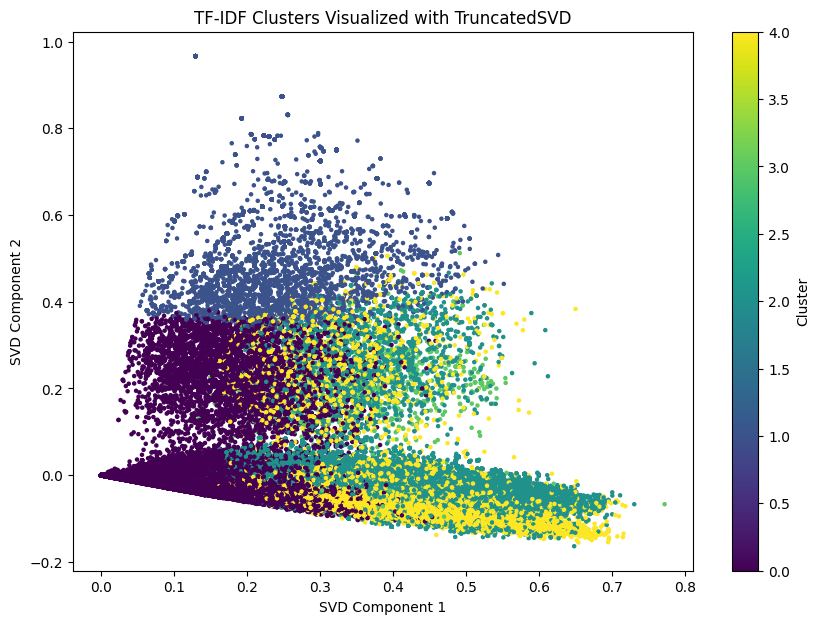

In [ ]:
from sklearn.cluster import KMeans
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt

# Step 1: Apply K-Means Clustering
num_clusters = 5  # Define the number of clusters (you can adjust this based on experimentation)
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(tfidf_matrix)

# Step 2: Analyze the clusters (show common terms in each cluster)
def get_top_terms_per_cluster(kmeans_model, tfidf_matrix, terms, num_terms=10):
    order_centroids = kmeans_model.cluster_centers_.argsort()[:, ::-1]
    for cluster in range(num_clusters):
        print(f"\nCluster {cluster + 1} top terms:")
        for i in order_centroids[cluster, :num_terms]:
            print(terms[i])

# Display top terms for each cluster
get_top_terms_per_cluster(kmeans, tfidf_matrix, terms)

# Step 3: Use TruncatedSVD for dimensionality reduction (similar to PCA but works with sparse matrices)
svd = TruncatedSVD(n_components=2, random_state=42)
tfidf_svd = svd.fit_transform(tfidf_matrix)

# Step 4: Visualize the clusters using the SVD projection
plt.figure(figsize=(10, 7))
plt.scatter(tfidf_svd[:, 0], tfidf_svd[:, 1], c=df['Cluster'], cmap='viridis', s=5)
plt.title("TF-IDF Clusters Visualized with TruncatedSVD")
plt.xlabel("SVD Component 1")
plt.ylabel("SVD Component 2")
plt.colorbar(label='Cluster')
plt.show()


In [ ]:
cluster_labels = {
    0: 'Existing Developments & Permissions',
    1: 'Dwelling House & Garage Construction',
    2: 'Domestic Development (Dwelling/Garage)',
    3: 'Floor Space & Proposed Works',
    4: 'Extensions & Single-Storey Construction'
}

# Assigning labels to each cluster
df['ClusterLabel'] = df['Cluster'].map(cluster_labels)

# Display the labeled clusters with DevelopmentDescription
print(df[['DevelopmentDescription', 'ClusterLabel']].head(10))


                              DevelopmentDescription  \
0  to construct a two storey split level dwelling...   
1  to construct an extension to its premises _x00...   
2  to construct a 111.14 sq.m single storey dwell...   
3  the conversion and internal alterations of exi...   
4  the construction of a proposed domestic garage...   
5  the refurbishment and extension of the existin...   
6  the retention and change of use of outbuilding...   
7  sunroom extension to front of dwelling house_x...   
8  existing 200m2 extension to 335m2 cattle shed ...   
9  the retention of 43sq.m garage constructed to ...   

                              ClusterLabel  
0   Domestic Development (Dwelling/Garage)  
1      Existing Developments & Permissions  
2   Domestic Development (Dwelling/Garage)  
3      Existing Developments & Permissions  
4      Existing Developments & Permissions  
5  Extensions & Single-Storey Construction  
6      Existing Developments & Permissions  
7      Existing Develop

In [ ]:
import pandas as pd
import time
import torch
import os
from transformers import pipeline
import psutil
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Ensure we are using the GPU
device = "cuda" if torch.cuda.is_available() else "cpu"

# Load the dataset (assuming df is your full dataset)
# df = pd.read_csv('your_dataset.csv')

# Use the full dataset
df_full = df  # Ensure df is loaded with your dataset

# Initialize the summarization model and ensure it uses the GPU if available
# Adjusted to use a smaller model ("t5-small") for better memory efficiency
summarizer = pipeline("summarization", model="t5-small", device=0 if torch.cuda.is_available() else -1)

# Define batch size
batch_size = 20  # Reduced batch size to prevent memory overload

# Total number of batches
total_batches = (len(df_full) + batch_size - 1) // batch_size  # Ensures we don't miss any remaining rows

# File to track checkpoint progress
checkpoint_file = '/content/drive/MyDrive/checkpoint.txt'  # Save checkpoint file to Google Drive

# Read checkpoint (if exists)
if os.path.exists(checkpoint_file):
    with open(checkpoint_file, 'r') as f:
        start_row = int(f.read().strip())
else:
    start_row = 0

# Function to summarize in batches with error handling and input length checks
def summarize_batch(df_batch):
    summaries = []
    for desc in df_batch['DevelopmentDescription']:
        try:
            # Skip empty or very short descriptions
            if not isinstance(desc, str) or len(desc.split()) < 3:
                summaries.append("Description too short")
                continue

            # Dynamically set max_length and min_length based on input length
            input_length = len(desc.split())
            max_length = min(50, input_length + 5)  # Limit max_length to 50 or input_length + 5
            min_length = min(25, max_length // 2)   # Ensure min_length is smaller than max_length

            # Summarize the text with appropriate length constraints
            summary = summarizer(
                desc,
                max_length=max_length,
                min_length=min_length,
                do_sample=False
            )[0]['summary_text']
            summaries.append(summary)
        except Exception as e:
            summaries.append(f"Error: {str(e)}")  # Handle the error and move on

    df_batch['Summary'] = summaries
    return df_batch

# Function to monitor RAM and GPU usage
def print_resource_usage():
    # RAM usage
    ram_usage = psutil.virtual_memory()
    print(f"RAM usage: {ram_usage.percent}%")

    # GPU memory usage
    if torch.cuda.is_available():
        gpu_memory = torch.cuda.memory_allocated(0) / (1024**3)  # Convert to GB
        gpu_total = torch.cuda.get_device_properties(0).total_memory / (1024**3)
        print(f"GPU memory usage: {gpu_memory:.2f} GB / {gpu_total:.2f} GB")
    else:
        print("No GPU available")

# Start timing the process
start_time = time.time()

# Process data in batches, resuming from the checkpoint
for i, batch_start in enumerate(range(start_row, len(df_full), batch_size)):
    # Select the batch
    df_batch = df_full.iloc[batch_start:batch_start + batch_size]

    # Filter out rows with missing or non-string descriptions
    df_batch = df_batch[df_batch['DevelopmentDescription'].notna()]

    # Summarize the batch
    summarized_batch = summarize_batch(df_batch)

    # Save the summarized batch to Google Drive (append mode)
    summarized_batch.to_csv(f'/content/drive/MyDrive/batch_summaries_{batch_start}.csv', index=False, mode='a')

    # Update checkpoint in Google Drive
    with open(checkpoint_file, 'w') as f:
        f.write(str(batch_start + batch_size))

    # Print resource usage
    print_resource_usage()

    # Calculate and print progress
    percentage_complete = (i + 1) / total_batches * 100
    print(f"Batch {i + 1}/{total_batches} processed. {percentage_complete:.2f}% complete.")

# End timing
end_time = time.time()
print(f"Time taken to process the entire dataset: {end_time - start_time} seconds")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/242M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/2.32k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset


RAM usage: 28.2%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 1/11800 processed. 0.01% complete.
RAM usage: 28.4%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 2/11800 processed. 0.02% complete.


Your max_length is set to 20, but your input_length is only 18. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)
Your max_length is set to 8, but your input_length is only 7. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=3)


RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 3/11800 processed. 0.03% complete.
RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 4/11800 processed. 0.03% complete.
RAM usage: 28.4%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 5/11800 processed. 0.04% complete.
RAM usage: 28.4%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 6/11800 processed. 0.05% complete.
RAM usage: 28.3%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 7/11800 processed. 0.06% complete.
RAM usage: 28.4%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 8/11800 processed. 0.07% complete.
RAM usage: 28.3%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 9/11800 processed. 0.08% complete.
RAM usage: 28.4%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 10/11800 processed. 0.08% complete.
RAM usage: 28.3%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 11/11800 processed. 0.09% complete.
RAM usage: 28.4%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 12/11800 processed. 0.10% complete.
RAM usage: 28.3%
GPU memory usage: 0.23 GB / 14

Your max_length is set to 22, but your input_length is only 21. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)


RAM usage: 28.2%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 15/11800 processed. 0.13% complete.
RAM usage: 28.2%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 16/11800 processed. 0.14% complete.
RAM usage: 28.3%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 17/11800 processed. 0.14% complete.
RAM usage: 28.3%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 18/11800 processed. 0.15% complete.
RAM usage: 28.3%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 19/11800 processed. 0.16% complete.
RAM usage: 28.4%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 20/11800 processed. 0.17% complete.


Your max_length is set to 17, but your input_length is only 16. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


RAM usage: 28.4%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 21/11800 processed. 0.18% complete.
RAM usage: 28.4%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 22/11800 processed. 0.19% complete.
RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 23/11800 processed. 0.19% complete.
RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 24/11800 processed. 0.20% complete.


Your max_length is set to 19, but your input_length is only 18. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)


RAM usage: 28.4%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 25/11800 processed. 0.21% complete.
RAM usage: 28.4%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 26/11800 processed. 0.22% complete.


Your max_length is set to 14, but your input_length is only 13. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)


RAM usage: 28.4%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 27/11800 processed. 0.23% complete.
RAM usage: 28.3%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 28/11800 processed. 0.24% complete.


Your max_length is set to 16, but your input_length is only 15. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


RAM usage: 28.4%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 29/11800 processed. 0.25% complete.


Your max_length is set to 23, but your input_length is only 21. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)


RAM usage: 28.4%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 30/11800 processed. 0.25% complete.


Your max_length is set to 29, but your input_length is only 28. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=14)
Your max_length is set to 26, but your input_length is only 25. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)
Your max_length is set to 25, but your input_length is only 24. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)


RAM usage: 28.4%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 31/11800 processed. 0.26% complete.


Your max_length is set to 37, but your input_length is only 36. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=18)


RAM usage: 28.4%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 32/11800 processed. 0.27% complete.
RAM usage: 28.4%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 33/11800 processed. 0.28% complete.
RAM usage: 28.3%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 34/11800 processed. 0.29% complete.


Your max_length is set to 24, but your input_length is only 23. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)


RAM usage: 28.4%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 35/11800 processed. 0.30% complete.


Your max_length is set to 18, but your input_length is only 16. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


RAM usage: 28.4%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 36/11800 processed. 0.31% complete.
RAM usage: 28.4%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 37/11800 processed. 0.31% complete.


Your max_length is set to 25, but your input_length is only 24. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)
Your max_length is set to 19, but your input_length is only 18. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)
Your max_length is set to 23, but your input_length is only 21. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)


RAM usage: 28.4%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 38/11800 processed. 0.32% complete.
RAM usage: 28.4%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 39/11800 processed. 0.33% complete.
RAM usage: 28.3%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 40/11800 processed. 0.34% complete.


Your max_length is set to 17, but your input_length is only 15. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


RAM usage: 28.3%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 41/11800 processed. 0.35% complete.
RAM usage: 28.4%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 42/11800 processed. 0.36% complete.


Your max_length is set to 16, but your input_length is only 15. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 43/11800 processed. 0.36% complete.


Your max_length is set to 25, but your input_length is only 24. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)
Your max_length is set to 20, but your input_length is only 18. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)
Your max_length is set to 12, but your input_length is only 10. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=5)


RAM usage: 28.4%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 44/11800 processed. 0.37% complete.


Your max_length is set to 25, but your input_length is only 24. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)


RAM usage: 28.3%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 45/11800 processed. 0.38% complete.
RAM usage: 28.3%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 46/11800 processed. 0.39% complete.


Your max_length is set to 12, but your input_length is only 10. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=5)


RAM usage: 28.4%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 47/11800 processed. 0.40% complete.
RAM usage: 28.4%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 48/11800 processed. 0.41% complete.


Your max_length is set to 18, but your input_length is only 16. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


RAM usage: 28.2%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 49/11800 processed. 0.42% complete.


Your max_length is set to 16, but your input_length is only 14. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


RAM usage: 28.2%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 50/11800 processed. 0.42% complete.
RAM usage: 28.4%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 51/11800 processed. 0.43% complete.


Your max_length is set to 14, but your input_length is only 12. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)


RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 52/11800 processed. 0.44% complete.
RAM usage: 28.4%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 53/11800 processed. 0.45% complete.


Your max_length is set to 18, but your input_length is only 16. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 54/11800 processed. 0.46% complete.


Your max_length is set to 25, but your input_length is only 24. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)
Your max_length is set to 15, but your input_length is only 14. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


RAM usage: 28.4%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 55/11800 processed. 0.47% complete.


Your max_length is set to 18, but your input_length is only 17. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


RAM usage: 28.4%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 56/11800 processed. 0.47% complete.


Your max_length is set to 22, but your input_length is only 21. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)


RAM usage: 28.4%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 57/11800 processed. 0.48% complete.


Your max_length is set to 21, but your input_length is only 20. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)
Your max_length is set to 21, but your input_length is only 20. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)


RAM usage: 28.4%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 58/11800 processed. 0.49% complete.
RAM usage: 28.4%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 59/11800 processed. 0.50% complete.


Your max_length is set to 25, but your input_length is only 24. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)
Your max_length is set to 19, but your input_length is only 18. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)


RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 60/11800 processed. 0.51% complete.
RAM usage: 28.4%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 61/11800 processed. 0.52% complete.
RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 62/11800 processed. 0.53% complete.


Your max_length is set to 16, but your input_length is only 14. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 63/11800 processed. 0.53% complete.


Token indices sequence length is longer than the specified maximum sequence length for this model (520 > 512). Running this sequence through the model will result in indexing errors


RAM usage: 28.4%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 64/11800 processed. 0.54% complete.
RAM usage: 28.4%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 65/11800 processed. 0.55% complete.


Your max_length is set to 16, but your input_length is only 14. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 66/11800 processed. 0.56% complete.


Your max_length is set to 23, but your input_length is only 21. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)
Your max_length is set to 21, but your input_length is only 19. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)
Your max_length is set to 25, but your input_length is only 24. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)
Your max_length is set to 25, but your input_length is only 24. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)


RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 67/11800 processed. 0.57% complete.


Your max_length is set to 26, but your input_length is only 25. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)
Your max_length is set to 22, but your input_length is only 21. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)


RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 68/11800 processed. 0.58% complete.


Your max_length is set to 34, but your input_length is only 32. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=16)


RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 69/11800 processed. 0.58% complete.
RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 70/11800 processed. 0.59% complete.
RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 71/11800 processed. 0.60% complete.


Your max_length is set to 21, but your input_length is only 20. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)


RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 72/11800 processed. 0.61% complete.


Your max_length is set to 15, but your input_length is only 13. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)


RAM usage: 28.4%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 73/11800 processed. 0.62% complete.
RAM usage: 28.3%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 74/11800 processed. 0.63% complete.
RAM usage: 28.3%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 75/11800 processed. 0.64% complete.


Your max_length is set to 16, but your input_length is only 14. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


RAM usage: 28.4%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 76/11800 processed. 0.64% complete.


Your max_length is set to 20, but your input_length is only 19. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)


RAM usage: 28.3%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 77/11800 processed. 0.65% complete.
RAM usage: 28.1%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 78/11800 processed. 0.66% complete.
RAM usage: 28.2%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 79/11800 processed. 0.67% complete.
RAM usage: 28.3%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 80/11800 processed. 0.68% complete.


Your max_length is set to 16, but your input_length is only 15. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


RAM usage: 28.2%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 81/11800 processed. 0.69% complete.
RAM usage: 28.2%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 82/11800 processed. 0.69% complete.
RAM usage: 28.3%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 83/11800 processed. 0.70% complete.
RAM usage: 28.3%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 84/11800 processed. 0.71% complete.


Your max_length is set to 33, but your input_length is only 32. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=16)


RAM usage: 28.4%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 85/11800 processed. 0.72% complete.


Your max_length is set to 28, but your input_length is only 27. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=13)


RAM usage: 28.4%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 86/11800 processed. 0.73% complete.


Your max_length is set to 23, but your input_length is only 22. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)


RAM usage: 28.4%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 87/11800 processed. 0.74% complete.
RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 88/11800 processed. 0.75% complete.
RAM usage: 28.4%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 89/11800 processed. 0.75% complete.
RAM usage: 28.4%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 90/11800 processed. 0.76% complete.


Your max_length is set to 27, but your input_length is only 25. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)


RAM usage: 28.4%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 91/11800 processed. 0.77% complete.


Your max_length is set to 16, but your input_length is only 15. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


RAM usage: 28.4%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 92/11800 processed. 0.78% complete.
RAM usage: 28.4%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 93/11800 processed. 0.79% complete.
RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 94/11800 processed. 0.80% complete.
RAM usage: 28.4%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 95/11800 processed. 0.81% complete.


Your max_length is set to 22, but your input_length is only 21. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)
Your max_length is set to 13, but your input_length is only 12. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)


RAM usage: 28.4%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 96/11800 processed. 0.81% complete.


Your max_length is set to 28, but your input_length is only 27. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=13)
Your max_length is set to 18, but your input_length is only 17. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 97/11800 processed. 0.82% complete.
RAM usage: 28.4%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 98/11800 processed. 0.83% complete.
RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 99/11800 processed. 0.84% complete.


Your max_length is set to 17, but your input_length is only 15. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)
Your max_length is set to 16, but your input_length is only 15. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)
Your max_length is set to 15, but your input_length is only 14. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 100/11800 processed. 0.85% complete.


Your max_length is set to 17, but your input_length is only 15. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


RAM usage: 28.4%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 101/11800 processed. 0.86% complete.


Your max_length is set to 17, but your input_length is only 16. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)
Your max_length is set to 13, but your input_length is only 12. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)
Your max_length is set to 13, but your input_length is only 11. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=5)
Your max_length is set to 21, but your input_length is only 20. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)


RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 102/11800 processed. 0.86% complete.


Your max_length is set to 21, but your input_length is only 20. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)
Your max_length is set to 16, but your input_length is only 14. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


RAM usage: 28.4%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 103/11800 processed. 0.87% complete.
RAM usage: 28.4%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 104/11800 processed. 0.88% complete.
RAM usage: 28.4%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 105/11800 processed. 0.89% complete.
RAM usage: 28.4%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 106/11800 processed. 0.90% complete.


Your max_length is set to 34, but your input_length is only 33. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=16)
Your max_length is set to 25, but your input_length is only 24. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)


RAM usage: 28.4%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 107/11800 processed. 0.91% complete.


Your max_length is set to 15, but your input_length is only 14. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)
Your max_length is set to 17, but your input_length is only 16. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)
Your max_length is set to 18, but your input_length is only 17. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


RAM usage: 28.4%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 108/11800 processed. 0.92% complete.


Your max_length is set to 27, but your input_length is only 26. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=13)


RAM usage: 28.4%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 109/11800 processed. 0.92% complete.


Your max_length is set to 22, but your input_length is only 21. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)
Your max_length is set to 18, but your input_length is only 17. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


RAM usage: 28.4%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 110/11800 processed. 0.93% complete.


Your max_length is set to 34, but your input_length is only 33. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=16)
Your max_length is set to 24, but your input_length is only 23. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)


RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 111/11800 processed. 0.94% complete.


Your max_length is set to 28, but your input_length is only 27. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=13)
Your max_length is set to 16, but your input_length is only 15. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)
Your max_length is set to 19, but your input_length is only 18. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)


RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 112/11800 processed. 0.95% complete.


Your max_length is set to 16, but your input_length is only 14. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)
Your max_length is set to 15, but your input_length is only 14. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 113/11800 processed. 0.96% complete.


Your max_length is set to 33, but your input_length is only 31. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=15)


RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 114/11800 processed. 0.97% complete.
RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 115/11800 processed. 0.97% complete.


Your max_length is set to 16, but your input_length is only 15. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)
Your max_length is set to 15, but your input_length is only 13. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)


RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 116/11800 processed. 0.98% complete.


Your max_length is set to 29, but your input_length is only 28. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=14)
Your max_length is set to 24, but your input_length is only 23. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)
Your max_length is set to 17, but your input_length is only 16. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 117/11800 processed. 0.99% complete.
RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 118/11800 processed. 1.00% complete.
RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 119/11800 processed. 1.01% complete.


Your max_length is set to 17, but your input_length is only 16. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 120/11800 processed. 1.02% complete.


Your max_length is set to 20, but your input_length is only 19. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)


RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 121/11800 processed. 1.03% complete.


Your max_length is set to 18, but your input_length is only 17. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 122/11800 processed. 1.03% complete.


Your max_length is set to 25, but your input_length is only 23. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)
Your max_length is set to 23, but your input_length is only 22. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)
Your max_length is set to 17, but your input_length is only 15. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 123/11800 processed. 1.04% complete.


Your max_length is set to 17, but your input_length is only 15. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 124/11800 processed. 1.05% complete.


Your max_length is set to 17, but your input_length is only 15. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 125/11800 processed. 1.06% complete.


Your max_length is set to 13, but your input_length is only 11. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=5)
Your max_length is set to 11, but your input_length is only 9. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=4)


RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 126/11800 processed. 1.07% complete.


Your max_length is set to 17, but your input_length is only 16. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 127/11800 processed. 1.08% complete.


Your max_length is set to 18, but your input_length is only 16. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 128/11800 processed. 1.08% complete.


Your max_length is set to 27, but your input_length is only 26. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=13)


RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 129/11800 processed. 1.09% complete.


Your max_length is set to 27, but your input_length is only 25. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)


RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 130/11800 processed. 1.10% complete.


Your max_length is set to 26, but your input_length is only 25. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)


RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 131/11800 processed. 1.11% complete.
RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 132/11800 processed. 1.12% complete.


Your max_length is set to 19, but your input_length is only 18. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)
Your max_length is set to 12, but your input_length is only 10. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=5)


RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 133/11800 processed. 1.13% complete.
RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 134/11800 processed. 1.14% complete.


Your max_length is set to 15, but your input_length is only 13. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)


RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 135/11800 processed. 1.14% complete.


Your max_length is set to 26, but your input_length is only 25. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)


RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 136/11800 processed. 1.15% complete.


Your max_length is set to 11, but your input_length is only 9. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=4)
Your max_length is set to 15, but your input_length is only 13. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)


RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 137/11800 processed. 1.16% complete.


Your max_length is set to 16, but your input_length is only 14. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 138/11800 processed. 1.17% complete.


Your max_length is set to 14, but your input_length is only 12. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)


RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 139/11800 processed. 1.18% complete.


Your max_length is set to 13, but your input_length is only 11. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=5)


RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 140/11800 processed. 1.19% complete.


Your max_length is set to 11, but your input_length is only 9. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=4)


RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 141/11800 processed. 1.19% complete.
RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 142/11800 processed. 1.20% complete.
RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 143/11800 processed. 1.21% complete.


Your max_length is set to 32, but your input_length is only 31. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=15)


RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 144/11800 processed. 1.22% complete.


Your max_length is set to 18, but your input_length is only 16. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)
Your max_length is set to 15, but your input_length is only 13. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)


RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 145/11800 processed. 1.23% complete.
RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 146/11800 processed. 1.24% complete.


Your max_length is set to 27, but your input_length is only 26. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=13)


RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 147/11800 processed. 1.25% complete.
RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 148/11800 processed. 1.25% complete.
RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 149/11800 processed. 1.26% complete.


Your max_length is set to 14, but your input_length is only 12. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)


RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 150/11800 processed. 1.27% complete.


Your max_length is set to 15, but your input_length is only 14. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)
Your max_length is set to 26, but your input_length is only 25. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)


RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 151/11800 processed. 1.28% complete.


Your max_length is set to 22, but your input_length is only 20. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)


RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 152/11800 processed. 1.29% complete.


Your max_length is set to 17, but your input_length is only 16. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)
Your max_length is set to 21, but your input_length is only 19. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)
Your max_length is set to 15, but your input_length is only 13. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)


RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 153/11800 processed. 1.30% complete.
RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 154/11800 processed. 1.31% complete.
RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 155/11800 processed. 1.31% complete.


Your max_length is set to 22, but your input_length is only 20. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)


RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 156/11800 processed. 1.32% complete.
RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 157/11800 processed. 1.33% complete.


Your max_length is set to 14, but your input_length is only 12. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)
Your max_length is set to 14, but your input_length is only 13. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)


RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 158/11800 processed. 1.34% complete.


Your max_length is set to 25, but your input_length is only 24. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)


RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 159/11800 processed. 1.35% complete.


Your max_length is set to 17, but your input_length is only 16. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 160/11800 processed. 1.36% complete.


Your max_length is set to 21, but your input_length is only 20. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)


RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 161/11800 processed. 1.36% complete.
RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 162/11800 processed. 1.37% complete.


Your max_length is set to 27, but your input_length is only 26. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=13)
Your max_length is set to 17, but your input_length is only 16. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 163/11800 processed. 1.38% complete.


Your max_length is set to 20, but your input_length is only 19. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)
Your max_length is set to 20, but your input_length is only 19. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)


RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 164/11800 processed. 1.39% complete.


Your max_length is set to 24, but your input_length is only 23. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)


RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 165/11800 processed. 1.40% complete.


Your max_length is set to 17, but your input_length is only 15. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)
Your max_length is set to 18, but your input_length is only 16. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 166/11800 processed. 1.41% complete.


Your max_length is set to 15, but your input_length is only 13. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)
Your max_length is set to 11, but your input_length is only 10. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=5)


RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 167/11800 processed. 1.42% complete.
RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 168/11800 processed. 1.42% complete.
RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 169/11800 processed. 1.43% complete.


Your max_length is set to 17, but your input_length is only 16. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 170/11800 processed. 1.44% complete.
RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 171/11800 processed. 1.45% complete.


Your max_length is set to 17, but your input_length is only 15. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 172/11800 processed. 1.46% complete.
RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 173/11800 processed. 1.47% complete.


Your max_length is set to 17, but your input_length is only 16. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 174/11800 processed. 1.47% complete.
RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 175/11800 processed. 1.48% complete.
RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 176/11800 processed. 1.49% complete.
RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 177/11800 processed. 1.50% complete.


Your max_length is set to 16, but your input_length is only 14. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 178/11800 processed. 1.51% complete.
RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 179/11800 processed. 1.52% complete.


Your max_length is set to 17, but your input_length is only 16. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)
Your max_length is set to 16, but your input_length is only 15. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 180/11800 processed. 1.53% complete.
RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 181/11800 processed. 1.53% complete.


Your max_length is set to 13, but your input_length is only 11. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=5)
Your max_length is set to 9, but your input_length is only 7. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=3)


RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 182/11800 processed. 1.54% complete.


Your max_length is set to 23, but your input_length is only 22. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)
Your max_length is set to 17, but your input_length is only 16. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)
Your max_length is set to 18, but your input_length is only 16. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 183/11800 processed. 1.55% complete.
RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 184/11800 processed. 1.56% complete.


Your max_length is set to 13, but your input_length is only 12. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)


RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 185/11800 processed. 1.57% complete.
RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 186/11800 processed. 1.58% complete.


Your max_length is set to 13, but your input_length is only 11. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=5)
Your max_length is set to 13, but your input_length is only 11. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=5)
Your max_length is set to 21, but your input_length is only 19. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)


RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 187/11800 processed. 1.58% complete.
RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 188/11800 processed. 1.59% complete.
RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 189/11800 processed. 1.60% complete.


Your max_length is set to 11, but your input_length is only 9. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=4)


RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 190/11800 processed. 1.61% complete.
RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 191/11800 processed. 1.62% complete.


Your max_length is set to 11, but your input_length is only 9. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=4)


RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 192/11800 processed. 1.63% complete.


Your max_length is set to 17, but your input_length is only 16. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)
Your max_length is set to 26, but your input_length is only 25. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)


RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 193/11800 processed. 1.64% complete.


Your max_length is set to 29, but your input_length is only 28. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=14)
Your max_length is set to 16, but your input_length is only 15. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 194/11800 processed. 1.64% complete.


Your max_length is set to 14, but your input_length is only 13. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)
Your max_length is set to 14, but your input_length is only 12. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)


RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 195/11800 processed. 1.65% complete.


Your max_length is set to 18, but your input_length is only 17. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 196/11800 processed. 1.66% complete.


Your max_length is set to 16, but your input_length is only 14. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 197/11800 processed. 1.67% complete.


Your max_length is set to 24, but your input_length is only 23. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)


RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 198/11800 processed. 1.68% complete.
RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 199/11800 processed. 1.69% complete.
RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 200/11800 processed. 1.69% complete.
RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 201/11800 processed. 1.70% complete.


Your max_length is set to 24, but your input_length is only 23. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)


RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 202/11800 processed. 1.71% complete.


Your max_length is set to 18, but your input_length is only 17. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 203/11800 processed. 1.72% complete.


Your max_length is set to 10, but your input_length is only 8. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=4)
Your max_length is set to 13, but your input_length is only 11. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=5)
Your max_length is set to 20, but your input_length is only 19. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)


RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 204/11800 processed. 1.73% complete.


Your max_length is set to 18, but your input_length is only 16. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 205/11800 processed. 1.74% complete.


Your max_length is set to 11, but your input_length is only 10. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=5)


RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 206/11800 processed. 1.75% complete.


Your max_length is set to 16, but your input_length is only 15. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 207/11800 processed. 1.75% complete.


Your max_length is set to 14, but your input_length is only 13. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)


RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 208/11800 processed. 1.76% complete.


Your max_length is set to 12, but your input_length is only 10. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=5)
Your max_length is set to 21, but your input_length is only 19. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)


RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 209/11800 processed. 1.77% complete.


Your max_length is set to 23, but your input_length is only 22. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)


RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 210/11800 processed. 1.78% complete.
RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 211/11800 processed. 1.79% complete.
RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 212/11800 processed. 1.80% complete.
RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 213/11800 processed. 1.81% complete.


Your max_length is set to 17, but your input_length is only 15. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 214/11800 processed. 1.81% complete.
RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 215/11800 processed. 1.82% complete.


Your max_length is set to 16, but your input_length is only 15. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 216/11800 processed. 1.83% complete.


Your max_length is set to 19, but your input_length is only 18. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)


RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 217/11800 processed. 1.84% complete.


Your max_length is set to 25, but your input_length is only 23. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)
Your max_length is set to 20, but your input_length is only 19. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)


RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 218/11800 processed. 1.85% complete.


Your max_length is set to 13, but your input_length is only 11. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=5)


RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 219/11800 processed. 1.86% complete.


Your max_length is set to 22, but your input_length is only 20. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)


RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 220/11800 processed. 1.86% complete.


Your max_length is set to 14, but your input_length is only 13. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)


RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 221/11800 processed. 1.87% complete.


Your max_length is set to 25, but your input_length is only 23. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)


RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 222/11800 processed. 1.88% complete.
RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 223/11800 processed. 1.89% complete.


Your max_length is set to 16, but your input_length is only 15. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)
Your max_length is set to 15, but your input_length is only 14. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 224/11800 processed. 1.90% complete.


Your max_length is set to 14, but your input_length is only 13. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)
Your max_length is set to 15, but your input_length is only 14. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 225/11800 processed. 1.91% complete.
RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 226/11800 processed. 1.92% complete.


Your max_length is set to 22, but your input_length is only 21. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)


RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 227/11800 processed. 1.92% complete.
RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 228/11800 processed. 1.93% complete.


Your max_length is set to 17, but your input_length is only 16. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 229/11800 processed. 1.94% complete.
RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 230/11800 processed. 1.95% complete.
RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 231/11800 processed. 1.96% complete.


Your max_length is set to 16, but your input_length is only 15. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 232/11800 processed. 1.97% complete.
RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 233/11800 processed. 1.97% complete.


Your max_length is set to 17, but your input_length is only 16. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 234/11800 processed. 1.98% complete.
RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 235/11800 processed. 1.99% complete.


Your max_length is set to 14, but your input_length is only 13. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)


RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 236/11800 processed. 2.00% complete.
RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 237/11800 processed. 2.01% complete.
RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 238/11800 processed. 2.02% complete.
RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 239/11800 processed. 2.03% complete.


Your max_length is set to 15, but your input_length is only 13. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)
Your max_length is set to 14, but your input_length is only 12. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)


RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 240/11800 processed. 2.03% complete.
RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 241/11800 processed. 2.04% complete.
RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 242/11800 processed. 2.05% complete.
RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 243/11800 processed. 2.06% complete.
RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 244/11800 processed. 2.07% complete.


Your max_length is set to 17, but your input_length is only 16. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 245/11800 processed. 2.08% complete.
RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 246/11800 processed. 2.08% complete.


Your max_length is set to 22, but your input_length is only 21. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)
Your max_length is set to 31, but your input_length is only 30. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=15)
Your max_length is set to 14, but your input_length is only 13. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)


RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 247/11800 processed. 2.09% complete.


Your max_length is set to 23, but your input_length is only 22. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)
Your max_length is set to 12, but your input_length is only 11. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=5)


RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 248/11800 processed. 2.10% complete.
RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 249/11800 processed. 2.11% complete.
RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 250/11800 processed. 2.12% complete.
RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 251/11800 processed. 2.13% complete.


Your max_length is set to 21, but your input_length is only 20. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)
Your max_length is set to 20, but your input_length is only 19. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)
Your max_length is set to 19, but your input_length is only 18. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)


RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 252/11800 processed. 2.14% complete.


Your max_length is set to 26, but your input_length is only 24. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)
Your max_length is set to 31, but your input_length is only 30. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=15)


RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 253/11800 processed. 2.14% complete.
RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 254/11800 processed. 2.15% complete.


Your max_length is set to 18, but your input_length is only 16. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 255/11800 processed. 2.16% complete.


Your max_length is set to 11, but your input_length is only 9. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=4)


RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 256/11800 processed. 2.17% complete.


Your max_length is set to 16, but your input_length is only 14. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)
Your max_length is set to 15, but your input_length is only 14. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)
Your max_length is set to 16, but your input_length is only 14. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 257/11800 processed. 2.18% complete.
RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 258/11800 processed. 2.19% complete.


Your max_length is set to 16, but your input_length is only 15. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 259/11800 processed. 2.19% complete.


Your max_length is set to 25, but your input_length is only 24. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)


RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 260/11800 processed. 2.20% complete.


Your max_length is set to 13, but your input_length is only 11. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=5)


RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 261/11800 processed. 2.21% complete.


Your max_length is set to 22, but your input_length is only 21. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)


RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 262/11800 processed. 2.22% complete.


Your max_length is set to 17, but your input_length is only 16. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 263/11800 processed. 2.23% complete.


Your max_length is set to 10, but your input_length is only 8. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=4)
Your max_length is set to 26, but your input_length is only 25. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)
Your max_length is set to 9, but your input_length is only 7. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=3)


RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 264/11800 processed. 2.24% complete.


Your max_length is set to 17, but your input_length is only 16. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)
Your max_length is set to 22, but your input_length is only 21. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)


RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 265/11800 processed. 2.25% complete.


Your max_length is set to 30, but your input_length is only 29. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=14)


RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 266/11800 processed. 2.25% complete.
RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 267/11800 processed. 2.26% complete.


Your max_length is set to 17, but your input_length is only 15. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 268/11800 processed. 2.27% complete.
RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 269/11800 processed. 2.28% complete.


Your max_length is set to 14, but your input_length is only 13. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)


RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 270/11800 processed. 2.29% complete.


Your max_length is set to 21, but your input_length is only 19. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)


RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 271/11800 processed. 2.30% complete.
RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 272/11800 processed. 2.31% complete.
RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 273/11800 processed. 2.31% complete.


Your max_length is set to 16, but your input_length is only 14. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)
Your max_length is set to 15, but your input_length is only 13. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)
Your max_length is set to 11, but your input_length is only 10. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=5)
Your max_length is set to 23, but your input_length is only 21. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)


RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 274/11800 processed. 2.32% complete.
RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 275/11800 processed. 2.33% complete.
RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 276/11800 processed. 2.34% complete.
RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 277/11800 processed. 2.35% complete.


Your max_length is set to 15, but your input_length is only 14. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 278/11800 processed. 2.36% complete.


Your max_length is set to 15, but your input_length is only 13. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)


RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 279/11800 processed. 2.36% complete.
RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 280/11800 processed. 2.37% complete.
RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 281/11800 processed. 2.38% complete.
RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 282/11800 processed. 2.39% complete.


Your max_length is set to 16, but your input_length is only 15. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 283/11800 processed. 2.40% complete.
RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 284/11800 processed. 2.41% complete.


Your max_length is set to 14, but your input_length is only 12. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)


RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 285/11800 processed. 2.42% complete.


Your max_length is set to 20, but your input_length is only 19. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)


RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 286/11800 processed. 2.42% complete.
RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 287/11800 processed. 2.43% complete.
RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 288/11800 processed. 2.44% complete.


Your max_length is set to 20, but your input_length is only 19. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)


RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 289/11800 processed. 2.45% complete.
RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 290/11800 processed. 2.46% complete.


Your max_length is set to 19, but your input_length is only 18. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)


RAM usage: 28.3%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 291/11800 processed. 2.47% complete.
RAM usage: 28.4%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 292/11800 processed. 2.47% complete.
RAM usage: 28.4%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 293/11800 processed. 2.48% complete.


Your max_length is set to 18, but your input_length is only 16. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)
Your max_length is set to 19, but your input_length is only 17. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)
Your max_length is set to 20, but your input_length is only 19. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)


RAM usage: 28.4%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 294/11800 processed. 2.49% complete.


Your max_length is set to 24, but your input_length is only 23. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)


RAM usage: 28.4%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 295/11800 processed. 2.50% complete.
RAM usage: 28.4%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 296/11800 processed. 2.51% complete.
RAM usage: 28.4%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 297/11800 processed. 2.52% complete.
RAM usage: 28.3%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 298/11800 processed. 2.53% complete.
RAM usage: 28.3%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 299/11800 processed. 2.53% complete.
RAM usage: 28.3%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 300/11800 processed. 2.54% complete.


Your max_length is set to 23, but your input_length is only 22. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)


RAM usage: 28.3%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 301/11800 processed. 2.55% complete.


Your max_length is set to 14, but your input_length is only 13. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)


RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 302/11800 processed. 2.56% complete.
RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 303/11800 processed. 2.57% complete.
RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 304/11800 processed. 2.58% complete.
RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 305/11800 processed. 2.58% complete.
RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 306/11800 processed. 2.59% complete.


Your max_length is set to 15, but your input_length is only 14. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 307/11800 processed. 2.60% complete.
RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 308/11800 processed. 2.61% complete.


Your max_length is set to 22, but your input_length is only 20. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)


RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 309/11800 processed. 2.62% complete.
RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 310/11800 processed. 2.63% complete.
RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 311/11800 processed. 2.64% complete.


Your max_length is set to 15, but your input_length is only 14. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 312/11800 processed. 2.64% complete.
RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 313/11800 processed. 2.65% complete.


Your max_length is set to 23, but your input_length is only 22. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)


RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 314/11800 processed. 2.66% complete.
RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 315/11800 processed. 2.67% complete.


Your max_length is set to 17, but your input_length is only 15. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)
Your max_length is set to 15, but your input_length is only 14. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 316/11800 processed. 2.68% complete.


Your max_length is set to 10, but your input_length is only 9. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=4)
Your max_length is set to 25, but your input_length is only 24. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)


RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 317/11800 processed. 2.69% complete.
RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 318/11800 processed. 2.69% complete.
RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 319/11800 processed. 2.70% complete.


Your max_length is set to 18, but your input_length is only 17. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 320/11800 processed. 2.71% complete.
RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 321/11800 processed. 2.72% complete.


Your max_length is set to 25, but your input_length is only 23. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)
Your max_length is set to 27, but your input_length is only 26. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=13)
Your max_length is set to 17, but your input_length is only 16. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 322/11800 processed. 2.73% complete.


Your max_length is set to 14, but your input_length is only 12. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)


RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 323/11800 processed. 2.74% complete.


Your max_length is set to 27, but your input_length is only 25. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)
Your max_length is set to 27, but your input_length is only 25. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)


RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 324/11800 processed. 2.75% complete.
RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 325/11800 processed. 2.75% complete.


Your max_length is set to 18, but your input_length is only 17. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)
Your max_length is set to 9, but your input_length is only 7. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=3)


RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 326/11800 processed. 2.76% complete.
RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 327/11800 processed. 2.77% complete.


Your max_length is set to 11, but your input_length is only 10. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=5)


RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 328/11800 processed. 2.78% complete.
RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 329/11800 processed. 2.79% complete.


Your max_length is set to 18, but your input_length is only 16. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 330/11800 processed. 2.80% complete.


Your max_length is set to 25, but your input_length is only 24. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)


RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 331/11800 processed. 2.81% complete.
RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 332/11800 processed. 2.81% complete.


Your max_length is set to 27, but your input_length is only 26. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=13)


RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 333/11800 processed. 2.82% complete.


Your max_length is set to 21, but your input_length is only 19. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)


RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 334/11800 processed. 2.83% complete.


Your max_length is set to 17, but your input_length is only 15. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 335/11800 processed. 2.84% complete.


Your max_length is set to 19, but your input_length is only 17. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 336/11800 processed. 2.85% complete.


Your max_length is set to 18, but your input_length is only 17. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 337/11800 processed. 2.86% complete.
RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 338/11800 processed. 2.86% complete.


Your max_length is set to 27, but your input_length is only 25. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)


RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 339/11800 processed. 2.87% complete.
RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 340/11800 processed. 2.88% complete.


Your max_length is set to 13, but your input_length is only 11. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=5)


RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 341/11800 processed. 2.89% complete.


Your max_length is set to 10, but your input_length is only 9. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=4)


RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 342/11800 processed. 2.90% complete.


Your max_length is set to 19, but your input_length is only 18. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)
Your max_length is set to 19, but your input_length is only 17. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)
Your max_length is set to 15, but your input_length is only 13. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)


RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 343/11800 processed. 2.91% complete.
RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 344/11800 processed. 2.92% complete.
RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 345/11800 processed. 2.92% complete.
RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 346/11800 processed. 2.93% complete.


Your max_length is set to 15, but your input_length is only 13. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)
Your max_length is set to 14, but your input_length is only 12. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)


RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 347/11800 processed. 2.94% complete.
RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 348/11800 processed. 2.95% complete.
RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 349/11800 processed. 2.96% complete.


Your max_length is set to 19, but your input_length is only 17. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 350/11800 processed. 2.97% complete.


Your max_length is set to 14, but your input_length is only 12. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)
Your max_length is set to 14, but your input_length is only 13. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)


RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 351/11800 processed. 2.97% complete.


Your max_length is set to 22, but your input_length is only 20. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)
Your max_length is set to 16, but your input_length is only 15. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 352/11800 processed. 2.98% complete.
RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 353/11800 processed. 2.99% complete.


Your max_length is set to 20, but your input_length is only 18. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)
Your max_length is set to 19, but your input_length is only 17. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 354/11800 processed. 3.00% complete.


Your max_length is set to 15, but your input_length is only 14. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 355/11800 processed. 3.01% complete.


Your max_length is set to 20, but your input_length is only 19. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)


RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 356/11800 processed. 3.02% complete.


Your max_length is set to 17, but your input_length is only 16. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 357/11800 processed. 3.03% complete.
RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 358/11800 processed. 3.03% complete.


Your max_length is set to 14, but your input_length is only 12. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)
Your max_length is set to 17, but your input_length is only 16. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)
Your max_length is set to 14, but your input_length is only 13. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)


RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 359/11800 processed. 3.04% complete.


Your max_length is set to 19, but your input_length is only 17. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)
Your max_length is set to 12, but your input_length is only 10. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=5)


RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 360/11800 processed. 3.05% complete.


Your max_length is set to 9, but your input_length is only 7. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=3)
Your max_length is set to 23, but your input_length is only 21. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)
Your max_length is set to 19, but your input_length is only 18. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)


RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 361/11800 processed. 3.06% complete.
RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 362/11800 processed. 3.07% complete.
RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 363/11800 processed. 3.08% complete.


Your max_length is set to 20, but your input_length is only 19. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)
Your max_length is set to 16, but your input_length is only 15. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)
Your max_length is set to 18, but your input_length is only 17. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)
Your max_length is set to 21, but your input_length is only 19. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)


RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 364/11800 processed. 3.08% complete.


Your max_length is set to 15, but your input_length is only 13. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)
Your max_length is set to 17, but your input_length is only 15. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 365/11800 processed. 3.09% complete.
RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 366/11800 processed. 3.10% complete.
RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 367/11800 processed. 3.11% complete.
RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 368/11800 processed. 3.12% complete.


Your max_length is set to 17, but your input_length is only 16. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 369/11800 processed. 3.13% complete.


Your max_length is set to 16, but your input_length is only 14. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)
Your max_length is set to 15, but your input_length is only 14. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 370/11800 processed. 3.14% complete.
RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 371/11800 processed. 3.14% complete.


Your max_length is set to 15, but your input_length is only 13. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)


RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 372/11800 processed. 3.15% complete.


Your max_length is set to 27, but your input_length is only 25. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)
Your max_length is set to 15, but your input_length is only 13. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)


RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 373/11800 processed. 3.16% complete.


Your max_length is set to 19, but your input_length is only 18. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)


RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 374/11800 processed. 3.17% complete.


Your max_length is set to 17, but your input_length is only 15. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 375/11800 processed. 3.18% complete.


Your max_length is set to 11, but your input_length is only 10. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=5)


RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 376/11800 processed. 3.19% complete.


Your max_length is set to 18, but your input_length is only 17. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)
Your max_length is set to 15, but your input_length is only 13. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)


RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 377/11800 processed. 3.19% complete.


Your max_length is set to 12, but your input_length is only 10. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=5)


RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 378/11800 processed. 3.20% complete.
RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 379/11800 processed. 3.21% complete.
RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 380/11800 processed. 3.22% complete.
RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 381/11800 processed. 3.23% complete.


Your max_length is set to 16, but your input_length is only 14. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)
Your max_length is set to 28, but your input_length is only 27. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=13)


RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 382/11800 processed. 3.24% complete.
RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 383/11800 processed. 3.25% complete.
RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 384/11800 processed. 3.25% complete.


Your max_length is set to 20, but your input_length is only 19. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)


RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 385/11800 processed. 3.26% complete.


Your max_length is set to 19, but your input_length is only 18. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)


RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 386/11800 processed. 3.27% complete.


Your max_length is set to 15, but your input_length is only 13. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)
Your max_length is set to 12, but your input_length is only 11. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=5)


RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 387/11800 processed. 3.28% complete.


Your max_length is set to 16, but your input_length is only 14. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 388/11800 processed. 3.29% complete.


Your max_length is set to 18, but your input_length is only 17. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)
Your max_length is set to 23, but your input_length is only 22. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)


RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 389/11800 processed. 3.30% complete.


Your max_length is set to 26, but your input_length is only 25. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)


RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 390/11800 processed. 3.31% complete.


Your max_length is set to 19, but your input_length is only 18. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)
Your max_length is set to 16, but your input_length is only 15. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)
Your max_length is set to 22, but your input_length is only 20. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)


RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 391/11800 processed. 3.31% complete.


Your max_length is set to 15, but your input_length is only 14. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 392/11800 processed. 3.32% complete.
RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 393/11800 processed. 3.33% complete.


Your max_length is set to 28, but your input_length is only 26. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=13)


RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 394/11800 processed. 3.34% complete.
RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 395/11800 processed. 3.35% complete.


Your max_length is set to 15, but your input_length is only 14. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 396/11800 processed. 3.36% complete.


Your max_length is set to 12, but your input_length is only 11. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=5)


RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 397/11800 processed. 3.36% complete.


Your max_length is set to 15, but your input_length is only 13. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)


RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 398/11800 processed. 3.37% complete.
RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 399/11800 processed. 3.38% complete.


Your max_length is set to 31, but your input_length is only 30. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=15)


RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 400/11800 processed. 3.39% complete.
RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 401/11800 processed. 3.40% complete.


Your max_length is set to 27, but your input_length is only 25. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)
Your max_length is set to 22, but your input_length is only 20. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)


RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 402/11800 processed. 3.41% complete.
RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 403/11800 processed. 3.42% complete.


Your max_length is set to 30, but your input_length is only 29. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=14)
Your max_length is set to 27, but your input_length is only 25. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)


RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 404/11800 processed. 3.42% complete.


Your max_length is set to 19, but your input_length is only 17. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)
Your max_length is set to 13, but your input_length is only 12. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)


RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 405/11800 processed. 3.43% complete.
RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 406/11800 processed. 3.44% complete.


Your max_length is set to 20, but your input_length is only 19. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)
Your max_length is set to 12, but your input_length is only 11. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=5)
Your max_length is set to 12, but your input_length is only 11. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=5)


RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 407/11800 processed. 3.45% complete.


Your max_length is set to 17, but your input_length is only 15. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 408/11800 processed. 3.46% complete.
RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 409/11800 processed. 3.47% complete.
RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 410/11800 processed. 3.47% complete.
RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 411/11800 processed. 3.48% complete.


Your max_length is set to 12, but your input_length is only 10. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=5)
Your max_length is set to 21, but your input_length is only 20. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)


RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 412/11800 processed. 3.49% complete.


Your max_length is set to 11, but your input_length is only 9. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=4)


RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 413/11800 processed. 3.50% complete.


Your max_length is set to 15, but your input_length is only 14. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)
Your max_length is set to 19, but your input_length is only 17. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)
Your max_length is set to 12, but your input_length is only 10. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=5)
Your max_length is set to 20, but your input_length is only 18. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)


RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 414/11800 processed. 3.51% complete.


Your max_length is set to 15, but your input_length is only 13. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)
Your max_length is set to 19, but your input_length is only 17. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)
Your max_length is set to 19, but your input_length is only 18. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)


RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 415/11800 processed. 3.52% complete.


Your max_length is set to 20, but your input_length is only 18. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)


RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 416/11800 processed. 3.53% complete.
RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 417/11800 processed. 3.53% complete.


Your max_length is set to 13, but your input_length is only 11. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=5)


RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 418/11800 processed. 3.54% complete.
RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 419/11800 processed. 3.55% complete.


Your max_length is set to 11, but your input_length is only 10. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=5)
Your max_length is set to 13, but your input_length is only 11. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=5)


RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 420/11800 processed. 3.56% complete.
RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 421/11800 processed. 3.57% complete.


Your max_length is set to 25, but your input_length is only 24. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)


RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 422/11800 processed. 3.58% complete.
RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 423/11800 processed. 3.58% complete.


Your max_length is set to 14, but your input_length is only 12. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)


RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 424/11800 processed. 3.59% complete.


Your max_length is set to 15, but your input_length is only 13. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)


RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 425/11800 processed. 3.60% complete.


Your max_length is set to 12, but your input_length is only 11. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=5)


RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 426/11800 processed. 3.61% complete.


Your max_length is set to 20, but your input_length is only 18. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)


RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 427/11800 processed. 3.62% complete.
RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 428/11800 processed. 3.63% complete.


Your max_length is set to 9, but your input_length is only 7. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=3)


RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 429/11800 processed. 3.64% complete.


Your max_length is set to 18, but your input_length is only 16. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 430/11800 processed. 3.64% complete.
RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 431/11800 processed. 3.65% complete.


Your max_length is set to 18, but your input_length is only 17. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 432/11800 processed. 3.66% complete.


Your max_length is set to 16, but your input_length is only 15. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 433/11800 processed. 3.67% complete.


Your max_length is set to 16, but your input_length is only 15. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)
Your max_length is set to 15, but your input_length is only 13. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)


RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 434/11800 processed. 3.68% complete.
RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 435/11800 processed. 3.69% complete.
RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 436/11800 processed. 3.69% complete.
RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 437/11800 processed. 3.70% complete.
RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 438/11800 processed. 3.71% complete.


Your max_length is set to 25, but your input_length is only 24. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)
Your max_length is set to 15, but your input_length is only 13. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)
Your max_length is set to 11, but your input_length is only 9. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=4)


RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 439/11800 processed. 3.72% complete.
RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 440/11800 processed. 3.73% complete.


Your max_length is set to 14, but your input_length is only 12. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)


RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 441/11800 processed. 3.74% complete.
RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 442/11800 processed. 3.75% complete.


Your max_length is set to 22, but your input_length is only 21. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)


RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 443/11800 processed. 3.75% complete.
RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 444/11800 processed. 3.76% complete.
RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 445/11800 processed. 3.77% complete.
RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 446/11800 processed. 3.78% complete.
RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 447/11800 processed. 3.79% complete.


Your max_length is set to 17, but your input_length is only 16. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 448/11800 processed. 3.80% complete.
RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 449/11800 processed. 3.81% complete.
RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 450/11800 processed. 3.81% complete.


Your max_length is set to 27, but your input_length is only 26. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=13)
Your max_length is set to 22, but your input_length is only 21. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)


RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 451/11800 processed. 3.82% complete.


Your max_length is set to 19, but your input_length is only 18. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)
Your max_length is set to 16, but your input_length is only 15. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 452/11800 processed. 3.83% complete.
RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 453/11800 processed. 3.84% complete.


Your max_length is set to 16, but your input_length is only 15. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 454/11800 processed. 3.85% complete.


Your max_length is set to 22, but your input_length is only 20. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)


RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 455/11800 processed. 3.86% complete.


Your max_length is set to 23, but your input_length is only 22. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)
Your max_length is set to 24, but your input_length is only 23. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)
Your max_length is set to 17, but your input_length is only 15. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 456/11800 processed. 3.86% complete.
RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 457/11800 processed. 3.87% complete.
RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 458/11800 processed. 3.88% complete.
RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 459/11800 processed. 3.89% complete.


Your max_length is set to 11, but your input_length is only 9. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=4)
Your max_length is set to 15, but your input_length is only 14. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 460/11800 processed. 3.90% complete.
RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 461/11800 processed. 3.91% complete.
RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 462/11800 processed. 3.92% complete.
RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 463/11800 processed. 3.92% complete.


Your max_length is set to 13, but your input_length is only 12. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)
Your max_length is set to 18, but your input_length is only 17. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 464/11800 processed. 3.93% complete.


Your max_length is set to 18, but your input_length is only 17. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 465/11800 processed. 3.94% complete.


Your max_length is set to 15, but your input_length is only 14. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)
Your max_length is set to 9, but your input_length is only 8. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=4)


RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 466/11800 processed. 3.95% complete.
RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 467/11800 processed. 3.96% complete.


Your max_length is set to 31, but your input_length is only 30. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=15)


RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 468/11800 processed. 3.97% complete.


Your max_length is set to 28, but your input_length is only 27. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=13)
Your max_length is set to 22, but your input_length is only 20. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)
Your max_length is set to 23, but your input_length is only 22. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)
Your max_length is set to 20, but your input_length is only 19. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)
Your max_

RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 469/11800 processed. 3.97% complete.


Your max_length is set to 16, but your input_length is only 14. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 470/11800 processed. 3.98% complete.


Your max_length is set to 13, but your input_length is only 12. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)
Your max_length is set to 18, but your input_length is only 16. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 471/11800 processed. 3.99% complete.
RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 472/11800 processed. 4.00% complete.
RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 473/11800 processed. 4.01% complete.
RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 474/11800 processed. 4.02% complete.
RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 475/11800 processed. 4.03% complete.


Your max_length is set to 10, but your input_length is only 8. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=4)
Your max_length is set to 29, but your input_length is only 28. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=14)
Your max_length is set to 16, but your input_length is only 15. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)
Your max_length is set to 10, but your input_length is only 8. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=4)


RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 476/11800 processed. 4.03% complete.


Your max_length is set to 36, but your input_length is only 35. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=17)


RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 477/11800 processed. 4.04% complete.


Your max_length is set to 14, but your input_length is only 12. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)


RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 478/11800 processed. 4.05% complete.
RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 479/11800 processed. 4.06% complete.


Your max_length is set to 26, but your input_length is only 25. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)


RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 480/11800 processed. 4.07% complete.
RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 481/11800 processed. 4.08% complete.
RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 482/11800 processed. 4.08% complete.
RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 483/11800 processed. 4.09% complete.


Your max_length is set to 19, but your input_length is only 18. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)


RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 484/11800 processed. 4.10% complete.


Your max_length is set to 23, but your input_length is only 21. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)
Your max_length is set to 27, but your input_length is only 26. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=13)


RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 485/11800 processed. 4.11% complete.
RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 486/11800 processed. 4.12% complete.
RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 487/11800 processed. 4.13% complete.


Your max_length is set to 18, but your input_length is only 16. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)
Your max_length is set to 25, but your input_length is only 24. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)


RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 488/11800 processed. 4.14% complete.
RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 489/11800 processed. 4.14% complete.


Your max_length is set to 28, but your input_length is only 27. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=13)


RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 490/11800 processed. 4.15% complete.


Your max_length is set to 17, but your input_length is only 15. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 491/11800 processed. 4.16% complete.


Your max_length is set to 16, but your input_length is only 15. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)
Your max_length is set to 13, but your input_length is only 11. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=5)
Your max_length is set to 28, but your input_length is only 26. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=13)


RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 492/11800 processed. 4.17% complete.


Your max_length is set to 13, but your input_length is only 11. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=5)
Your max_length is set to 18, but your input_length is only 17. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 493/11800 processed. 4.18% complete.
RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 494/11800 processed. 4.19% complete.


Your max_length is set to 16, but your input_length is only 14. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 495/11800 processed. 4.19% complete.
RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 496/11800 processed. 4.20% complete.
RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 497/11800 processed. 4.21% complete.
RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 498/11800 processed. 4.22% complete.


Your max_length is set to 21, but your input_length is only 20. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)
Your max_length is set to 13, but your input_length is only 11. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=5)


RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 499/11800 processed. 4.23% complete.
RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 500/11800 processed. 4.24% complete.


Your max_length is set to 19, but your input_length is only 18. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)


RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 501/11800 processed. 4.25% complete.


Your max_length is set to 15, but your input_length is only 14. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 502/11800 processed. 4.25% complete.
RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 503/11800 processed. 4.26% complete.


Your max_length is set to 16, but your input_length is only 15. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 504/11800 processed. 4.27% complete.
RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 505/11800 processed. 4.28% complete.


Your max_length is set to 17, but your input_length is only 15. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 506/11800 processed. 4.29% complete.
RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 507/11800 processed. 4.30% complete.


Your max_length is set to 18, but your input_length is only 17. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 508/11800 processed. 4.31% complete.


Your max_length is set to 18, but your input_length is only 17. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 509/11800 processed. 4.31% complete.


Your max_length is set to 23, but your input_length is only 22. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)


RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 510/11800 processed. 4.32% complete.
RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 511/11800 processed. 4.33% complete.


Your max_length is set to 22, but your input_length is only 21. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)


RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 512/11800 processed. 4.34% complete.
RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 513/11800 processed. 4.35% complete.


Your max_length is set to 21, but your input_length is only 19. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)


RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 514/11800 processed. 4.36% complete.


Your max_length is set to 15, but your input_length is only 14. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 515/11800 processed. 4.36% complete.


Your max_length is set to 18, but your input_length is only 17. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 516/11800 processed. 4.37% complete.


Your max_length is set to 12, but your input_length is only 11. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=5)


RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 517/11800 processed. 4.38% complete.
RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 518/11800 processed. 4.39% complete.


Your max_length is set to 32, but your input_length is only 31. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=15)


RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 519/11800 processed. 4.40% complete.
RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 520/11800 processed. 4.41% complete.


Your max_length is set to 19, but your input_length is only 17. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 521/11800 processed. 4.42% complete.


Your max_length is set to 13, but your input_length is only 12. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)


RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 522/11800 processed. 4.42% complete.


Your max_length is set to 20, but your input_length is only 19. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)


RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 523/11800 processed. 4.43% complete.
RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 524/11800 processed. 4.44% complete.


Your max_length is set to 32, but your input_length is only 30. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=15)


RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 525/11800 processed. 4.45% complete.
RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 526/11800 processed. 4.46% complete.
RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 527/11800 processed. 4.47% complete.


Your max_length is set to 16, but your input_length is only 15. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)
Your max_length is set to 21, but your input_length is only 20. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)


RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 528/11800 processed. 4.47% complete.


Your max_length is set to 23, but your input_length is only 22. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)


RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 529/11800 processed. 4.48% complete.
RAM usage: 28.7%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 530/11800 processed. 4.49% complete.
RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 531/11800 processed. 4.50% complete.


Your max_length is set to 21, but your input_length is only 19. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)


RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 532/11800 processed. 4.51% complete.
RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 533/11800 processed. 4.52% complete.


Your max_length is set to 9, but your input_length is only 7. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=3)
Your max_length is set to 15, but your input_length is only 13. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)


RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 534/11800 processed. 4.53% complete.


Your max_length is set to 12, but your input_length is only 10. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=5)


RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 535/11800 processed. 4.53% complete.
RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 536/11800 processed. 4.54% complete.
RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 537/11800 processed. 4.55% complete.


Your max_length is set to 27, but your input_length is only 26. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=13)


RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 538/11800 processed. 4.56% complete.
RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 539/11800 processed. 4.57% complete.
RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 540/11800 processed. 4.58% complete.
RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 541/11800 processed. 4.58% complete.


Your max_length is set to 15, but your input_length is only 14. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 542/11800 processed. 4.59% complete.
RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 543/11800 processed. 4.60% complete.
RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 544/11800 processed. 4.61% complete.


Your max_length is set to 15, but your input_length is only 13. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)


RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 545/11800 processed. 4.62% complete.


Your max_length is set to 17, but your input_length is only 15. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 546/11800 processed. 4.63% complete.


Your max_length is set to 19, but your input_length is only 17. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)
Your max_length is set to 31, but your input_length is only 30. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=15)
Your max_length is set to 18, but your input_length is only 16. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)
Your max_length is set to 16, but your input_length is only 15. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 547/11800 processed. 4.64% complete.


Your max_length is set to 23, but your input_length is only 22. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)


RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 548/11800 processed. 4.64% complete.


Your max_length is set to 21, but your input_length is only 20. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)


RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 549/11800 processed. 4.65% complete.


Your max_length is set to 18, but your input_length is only 16. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 550/11800 processed. 4.66% complete.


Your max_length is set to 23, but your input_length is only 21. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)
Your max_length is set to 18, but your input_length is only 17. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 551/11800 processed. 4.67% complete.


Your max_length is set to 24, but your input_length is only 23. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)
Your max_length is set to 11, but your input_length is only 9. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=4)


RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 552/11800 processed. 4.68% complete.
RAM usage: 28.5%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 553/11800 processed. 4.69% complete.


Your max_length is set to 21, but your input_length is only 20. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)
Your max_length is set to 8, but your input_length is only 6. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=3)
Your max_length is set to 20, but your input_length is only 19. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)
Your max_length is set to 14, but your input_length is only 13. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)


RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 554/11800 processed. 4.69% complete.
RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 555/11800 processed. 4.70% complete.


Your max_length is set to 24, but your input_length is only 23. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)
Your max_length is set to 23, but your input_length is only 21. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)
Your max_length is set to 18, but your input_length is only 16. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 556/11800 processed. 4.71% complete.


Your max_length is set to 23, but your input_length is only 22. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)


RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 557/11800 processed. 4.72% complete.
RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 558/11800 processed. 4.73% complete.


Your max_length is set to 19, but your input_length is only 18. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)
Your max_length is set to 21, but your input_length is only 20. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)


RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 559/11800 processed. 4.74% complete.


Your max_length is set to 10, but your input_length is only 9. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=4)


RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 560/11800 processed. 4.75% complete.


Your max_length is set to 28, but your input_length is only 27. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=13)


RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 561/11800 processed. 4.75% complete.
RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 562/11800 processed. 4.76% complete.


Your max_length is set to 19, but your input_length is only 18. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)


RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 563/11800 processed. 4.77% complete.


Your max_length is set to 19, but your input_length is only 17. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 564/11800 processed. 4.78% complete.


Your max_length is set to 22, but your input_length is only 21. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)
Your max_length is set to 15, but your input_length is only 14. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 565/11800 processed. 4.79% complete.


Your max_length is set to 17, but your input_length is only 15. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 566/11800 processed. 4.80% complete.


Your max_length is set to 21, but your input_length is only 19. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)
Your max_length is set to 16, but your input_length is only 15. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)
Your max_length is set to 14, but your input_length is only 13. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)


RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 567/11800 processed. 4.81% complete.
RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 568/11800 processed. 4.81% complete.


Your max_length is set to 16, but your input_length is only 15. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 569/11800 processed. 4.82% complete.
RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 570/11800 processed. 4.83% complete.


Your max_length is set to 17, but your input_length is only 15. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 571/11800 processed. 4.84% complete.


Your max_length is set to 15, but your input_length is only 14. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)
Your max_length is set to 20, but your input_length is only 19. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)


RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 572/11800 processed. 4.85% complete.


Your max_length is set to 13, but your input_length is only 11. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=5)


RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 573/11800 processed. 4.86% complete.


Your max_length is set to 18, but your input_length is only 17. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 574/11800 processed. 4.86% complete.


Your max_length is set to 13, but your input_length is only 11. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=5)
Your max_length is set to 33, but your input_length is only 32. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=16)
Your max_length is set to 25, but your input_length is only 24. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)


RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 575/11800 processed. 4.87% complete.
RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 576/11800 processed. 4.88% complete.


Your max_length is set to 17, but your input_length is only 16. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 577/11800 processed. 4.89% complete.


Your max_length is set to 22, but your input_length is only 21. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)
Your max_length is set to 20, but your input_length is only 18. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)


RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 578/11800 processed. 4.90% complete.
RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 579/11800 processed. 4.91% complete.
RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 580/11800 processed. 4.92% complete.


Your max_length is set to 28, but your input_length is only 27. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=13)


RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 581/11800 processed. 4.92% complete.
RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 582/11800 processed. 4.93% complete.


Your max_length is set to 16, but your input_length is only 15. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)
Your max_length is set to 15, but your input_length is only 14. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)
Your max_length is set to 24, but your input_length is only 23. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)


RAM usage: 28.7%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 583/11800 processed. 4.94% complete.


Your max_length is set to 23, but your input_length is only 22. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)
Your max_length is set to 13, but your input_length is only 11. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=5)


RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 584/11800 processed. 4.95% complete.


Your max_length is set to 14, but your input_length is only 12. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)
Your max_length is set to 11, but your input_length is only 9. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=4)


RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 585/11800 processed. 4.96% complete.


Your max_length is set to 19, but your input_length is only 17. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)
Your max_length is set to 9, but your input_length is only 7. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=3)


RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 586/11800 processed. 4.97% complete.


Your max_length is set to 20, but your input_length is only 18. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)
Your max_length is set to 12, but your input_length is only 10. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=5)


RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 587/11800 processed. 4.97% complete.


Your max_length is set to 15, but your input_length is only 13. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)


RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 588/11800 processed. 4.98% complete.


Your max_length is set to 14, but your input_length is only 13. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)
Your max_length is set to 9, but your input_length is only 8. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=4)
Your max_length is set to 13, but your input_length is only 12. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)


RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 589/11800 processed. 4.99% complete.
RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 590/11800 processed. 5.00% complete.


Your max_length is set to 23, but your input_length is only 22. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)


RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 591/11800 processed. 5.01% complete.
RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 592/11800 processed. 5.02% complete.
RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 593/11800 processed. 5.03% complete.


Your max_length is set to 15, but your input_length is only 13. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)


RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 594/11800 processed. 5.03% complete.


Your max_length is set to 16, but your input_length is only 14. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)
Your max_length is set to 23, but your input_length is only 21. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)


RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 595/11800 processed. 5.04% complete.


Your max_length is set to 17, but your input_length is only 15. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)
Your max_length is set to 20, but your input_length is only 19. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)
Your max_length is set to 18, but your input_length is only 16. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 596/11800 processed. 5.05% complete.


Your max_length is set to 10, but your input_length is only 9. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=4)
Your max_length is set to 35, but your input_length is only 34. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=17)


RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 597/11800 processed. 5.06% complete.
RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 598/11800 processed. 5.07% complete.
RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 599/11800 processed. 5.08% complete.


Your max_length is set to 14, but your input_length is only 13. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)


RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 600/11800 processed. 5.08% complete.


Your max_length is set to 24, but your input_length is only 23. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)


RAM usage: 28.7%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 601/11800 processed. 5.09% complete.
RAM usage: 28.7%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 602/11800 processed. 5.10% complete.


Your max_length is set to 15, but your input_length is only 13. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)


RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 603/11800 processed. 5.11% complete.


Your max_length is set to 21, but your input_length is only 19. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)
Your max_length is set to 19, but your input_length is only 17. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 604/11800 processed. 5.12% complete.
RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 605/11800 processed. 5.13% complete.
RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 606/11800 processed. 5.14% complete.


Your max_length is set to 20, but your input_length is only 18. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)


RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 607/11800 processed. 5.14% complete.
RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 608/11800 processed. 5.15% complete.


Your max_length is set to 25, but your input_length is only 23. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)


RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 609/11800 processed. 5.16% complete.


Your max_length is set to 24, but your input_length is only 23. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)
Your max_length is set to 42, but your input_length is only 41. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=20)


RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 610/11800 processed. 5.17% complete.


Your max_length is set to 21, but your input_length is only 20. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)


RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 611/11800 processed. 5.18% complete.
RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 612/11800 processed. 5.19% complete.


Your max_length is set to 17, but your input_length is only 16. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 613/11800 processed. 5.19% complete.
RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 614/11800 processed. 5.20% complete.
RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 615/11800 processed. 5.21% complete.
RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 616/11800 processed. 5.22% complete.
RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 617/11800 processed. 5.23% complete.
RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 618/11800 processed. 5.24% complete.


Your max_length is set to 14, but your input_length is only 13. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)


RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 619/11800 processed. 5.25% complete.


Your max_length is set to 13, but your input_length is only 12. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)
Your max_length is set to 12, but your input_length is only 10. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=5)


RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 620/11800 processed. 5.25% complete.
RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 621/11800 processed. 5.26% complete.


Your max_length is set to 18, but your input_length is only 17. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)
Your max_length is set to 16, but your input_length is only 15. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)
Your max_length is set to 8, but your input_length is only 6. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=3)


RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 622/11800 processed. 5.27% complete.


Your max_length is set to 15, but your input_length is only 14. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)
Your max_length is set to 32, but your input_length is only 31. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=15)
Your max_length is set to 22, but your input_length is only 20. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)
Your max_length is set to 14, but your input_length is only 13. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)


RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 623/11800 processed. 5.28% complete.


Your max_length is set to 37, but your input_length is only 36. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=18)


RAM usage: 28.7%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 624/11800 processed. 5.29% complete.
RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 625/11800 processed. 5.30% complete.
RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 626/11800 processed. 5.31% complete.
RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 627/11800 processed. 5.31% complete.


Your max_length is set to 20, but your input_length is only 18. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)


RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 628/11800 processed. 5.32% complete.


Your max_length is set to 33, but your input_length is only 32. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=16)


RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 629/11800 processed. 5.33% complete.


Your max_length is set to 16, but your input_length is only 15. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 630/11800 processed. 5.34% complete.


Your max_length is set to 19, but your input_length is only 17. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 631/11800 processed. 5.35% complete.
RAM usage: 28.7%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 632/11800 processed. 5.36% complete.


Your max_length is set to 19, but your input_length is only 17. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)
Your max_length is set to 19, but your input_length is only 18. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)


RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 633/11800 processed. 5.36% complete.
RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 634/11800 processed. 5.37% complete.


Your max_length is set to 25, but your input_length is only 23. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)
Your max_length is set to 21, but your input_length is only 19. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)


RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 635/11800 processed. 5.38% complete.


Your max_length is set to 17, but your input_length is only 16. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)
Your max_length is set to 21, but your input_length is only 20. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)


RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 636/11800 processed. 5.39% complete.


Your max_length is set to 18, but your input_length is only 16. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 637/11800 processed. 5.40% complete.


Your max_length is set to 25, but your input_length is only 24. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)


RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 638/11800 processed. 5.41% complete.
RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 639/11800 processed. 5.42% complete.
RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 640/11800 processed. 5.42% complete.


Your max_length is set to 17, but your input_length is only 16. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)
Your max_length is set to 18, but your input_length is only 17. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 641/11800 processed. 5.43% complete.


Your max_length is set to 13, but your input_length is only 12. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)


RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 642/11800 processed. 5.44% complete.


Your max_length is set to 13, but your input_length is only 12. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)
Your max_length is set to 13, but your input_length is only 11. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=5)


RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 643/11800 processed. 5.45% complete.


Your max_length is set to 20, but your input_length is only 19. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)


RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 644/11800 processed. 5.46% complete.


Your max_length is set to 21, but your input_length is only 19. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)


RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 645/11800 processed. 5.47% complete.


Your max_length is set to 15, but your input_length is only 14. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 646/11800 processed. 5.47% complete.


Your max_length is set to 21, but your input_length is only 20. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)
Your max_length is set to 26, but your input_length is only 25. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)


RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 647/11800 processed. 5.48% complete.


Your max_length is set to 18, but your input_length is only 16. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 648/11800 processed. 5.49% complete.


Your max_length is set to 19, but your input_length is only 17. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 649/11800 processed. 5.50% complete.


Your max_length is set to 13, but your input_length is only 11. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=5)
Your max_length is set to 31, but your input_length is only 30. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=15)


RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 650/11800 processed. 5.51% complete.


Your max_length is set to 27, but your input_length is only 26. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=13)
Your max_length is set to 11, but your input_length is only 9. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=4)


RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 651/11800 processed. 5.52% complete.


Your max_length is set to 16, but your input_length is only 14. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 652/11800 processed. 5.53% complete.


Your max_length is set to 22, but your input_length is only 21. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)


RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 653/11800 processed. 5.53% complete.


Your max_length is set to 20, but your input_length is only 18. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)


RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 654/11800 processed. 5.54% complete.


Your max_length is set to 21, but your input_length is only 19. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)
Your max_length is set to 22, but your input_length is only 21. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)


RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 655/11800 processed. 5.55% complete.


Your max_length is set to 22, but your input_length is only 20. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)
Your max_length is set to 18, but your input_length is only 17. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)
Your max_length is set to 20, but your input_length is only 19. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)


RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 656/11800 processed. 5.56% complete.
RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 657/11800 processed. 5.57% complete.


Your max_length is set to 22, but your input_length is only 21. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)
Your max_length is set to 26, but your input_length is only 25. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)
Your max_length is set to 8, but your input_length is only 6. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=3)
Your max_length is set to 19, but your input_length is only 17. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 658/11800 processed. 5.58% complete.


Your max_length is set to 22, but your input_length is only 21. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)
Your max_length is set to 21, but your input_length is only 20. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)


RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 659/11800 processed. 5.58% complete.


Your max_length is set to 15, but your input_length is only 13. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)


RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 660/11800 processed. 5.59% complete.


Your max_length is set to 22, but your input_length is only 21. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)


RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 661/11800 processed. 5.60% complete.


Your max_length is set to 18, but your input_length is only 17. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)
Your max_length is set to 17, but your input_length is only 16. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 662/11800 processed. 5.61% complete.
RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 663/11800 processed. 5.62% complete.
RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 664/11800 processed. 5.63% complete.
RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 665/11800 processed. 5.64% complete.


Your max_length is set to 17, but your input_length is only 16. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 666/11800 processed. 5.64% complete.
RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 667/11800 processed. 5.65% complete.


Your max_length is set to 16, but your input_length is only 15. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 668/11800 processed. 5.66% complete.
RAM usage: 28.7%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 669/11800 processed. 5.67% complete.
RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 670/11800 processed. 5.68% complete.


Your max_length is set to 24, but your input_length is only 23. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)
Your max_length is set to 17, but your input_length is only 16. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)
Your max_length is set to 10, but your input_length is only 8. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=4)
Your max_length is set to 13, but your input_length is only 12. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)


RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 671/11800 processed. 5.69% complete.


Your max_length is set to 16, but your input_length is only 15. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 672/11800 processed. 5.69% complete.
RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 673/11800 processed. 5.70% complete.
RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 674/11800 processed. 5.71% complete.


Your max_length is set to 20, but your input_length is only 19. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)


RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 675/11800 processed. 5.72% complete.
RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 676/11800 processed. 5.73% complete.


Your max_length is set to 19, but your input_length is only 18. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)
Your max_length is set to 31, but your input_length is only 29. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=14)
Your max_length is set to 8, but your input_length is only 6. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=3)


RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 677/11800 processed. 5.74% complete.


Your max_length is set to 16, but your input_length is only 15. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 678/11800 processed. 5.75% complete.
RAM usage: 28.7%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 679/11800 processed. 5.75% complete.


Your max_length is set to 18, but your input_length is only 17. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)
Your max_length is set to 21, but your input_length is only 20. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)


RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 680/11800 processed. 5.76% complete.
RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 681/11800 processed. 5.77% complete.
RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 682/11800 processed. 5.78% complete.
RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 683/11800 processed. 5.79% complete.
RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 684/11800 processed. 5.80% complete.


Your max_length is set to 28, but your input_length is only 27. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=13)
Your max_length is set to 21, but your input_length is only 20. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)
Your max_length is set to 18, but your input_length is only 16. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 685/11800 processed. 5.81% complete.
RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 686/11800 processed. 5.81% complete.
RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 687/11800 processed. 5.82% complete.
RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 688/11800 processed. 5.83% complete.
RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 689/11800 processed. 5.84% complete.
RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 690/11800 processed. 5.85% complete.
RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 691/11800 processed. 5.86% complete.
RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 692/11800 processed. 5.86% complete.
RAM usage: 28.6%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 693/11800 processed. 5.87% complete.
RAM usage: 28.7%
GPU memory usage: 0.23 GB / 14.75 GB
Batch 694/11800 processed. 5.88% complete.
RAM usage: 28.6%
GPU memory us

In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install openpyxl


In [ ]:
import pandas as pd

# Load the Excel file into a pandas DataFrame
df_full = pd.read_excel('/content/drive/MyDrive/Planning Application Database/Tableau_Ready_Planning_Applications_With_Street_Town_Cleaned.xlsx', engine='openpyxl')

# Display the first few rows to ensure it's loaded correctly
df_full.head()


,OBJECTID,PlanningAuthority,ApplicationNumber,DevelopmentDescription,DevelopmentAddress,ApplicationStatus,ApplicationType,Decision,LandUseCode,AreaofSite,...,ETL_DATE,geometry,County,ClosestCity,Longitude,Latitude,Eircode,CleanedAddress,Town,StreetAddress
0,399,Carlow County Council,161,to construct a two storey split level dwelling...,"Linkardstown , Tinryland , Co. Carlow",APPLICATION FINALISED,PERMISSION,CONDITIONAL,,0.523,...,2023-04-27 15:13:44+00:00,POINT (-6.891640069999937 52.78697196000007),Carlow,Dublin,-6.891640,52.786972,Unknown,"Linkardstown, Tinryland, Co. Carlow",NaN,Linkardstown
1,403,Carlow County Council,16102,to construct an extension to its premises _x00...,"Pollerton Industrial Estate , Hacketstown Road...",APPLICATION FINALISED,PERMISSION,CONDITIONAL,,0.523,...,2023-04-27 15:13:44+00:00,POINT (-6.89802113099995 52.839592476000064),Unknown,Dublin,-6.898021,52.839592,Unknown,"Pollerton Industrial Estate, Hacketstown Road,...",Unknown,Unknown
2,404,Carlow County Council,16103,to construct a 111.14 sq.m single storey dwell...,"Clonogan , Clonegal , Co. Carlow",APPLICATION FINALISED,PERMISSION,CONDITIONAL,,0.523,...,2023-04-27 15:13:44+00:00,POINT (-6.649713141999939 52.69979170700003),Carlow,Dublin,-6.649713,52.699792,Unknown,"Clonogan, Clonegal, Co. Carlow",NaN,Clonogan
3,405,Carlow County Council,16104,the conversion and internal alterations of exi...,"No. 7 Eastwood , Bagenalstown , Co. Carlow",APPLICATION FINALISED,PERMISSION,CONDITIONAL,,0.523,...,2023-04-27 15:13:45+00:00,POINT (-6.965165944999967 52.70092800400005),Carlow,Dublin,-6.965166,52.700928,Unknown,"No. 7 Eastwood, Bagenalstown, Co. Carlow",NaN,No. 7 Eastwood
4,406,Carlow County Council,16105,the construction of a proposed domestic garage...,"Kildreenagh , Bagenalstown , Co. Carlow",APPLICATION FINALISED,PERMISSION,CONDITIONAL,,0.523,...,2023-04-27 15:13:45+00:00,POINT (-6.901603492999925 52.71649152200007),Carlow,Dublin,-6.901603,52.716492,Unknown,"Kildreenagh, Bagenalstown, Co. Carlow",NaN,Kildreenagh


In [ ]:
import pandas as pd
import time
import torch
import os
from transformers import pipeline
import psutil
from google.colab import drive

# Step 1: Mount Google Drive
drive.mount('/content/drive')

# Step 2: Ensure we are using the GPU
device = "cuda" if torch.cuda.is_available() else "cpu"

# Step 3: Load the original dataset from Google Drive (Excel file)
df_full = pd.read_excel('/content/drive/MyDrive/Planning Application Database/Tableau_Ready_Planning_Applications_With_Street_Town_Cleaned.xlsx', engine='openpyxl')

# Step 4: Initialize the summarization model and ensure it uses the GPU if available
summarizer = pipeline("summarization", model="t5-small", device=0 if torch.cuda.is_available() else -1)

# Define batch size
batch_size = 20  # Adjust this if needed to prevent memory overload

# Total number of batches
total_batches = (len(df_full) + batch_size - 1) // batch_size  # Ensures we don't miss any remaining rows

# Step 5: File to track checkpoint progress
# Ensure the correct path to your uploaded checkpoint.txt file
checkpoint_file = '/content/drive/MyDrive/checkpoint.txt'  # Replace this path with the correct one if needed

# Step 6: Read checkpoint (resume from where you left off)
if os.path.exists(checkpoint_file):
    with open(checkpoint_file, 'r') as f:
        start_row = int(f.read().strip())
else:
    start_row = 0

# Step 7: Function to summarize in batches with error handling and input length checks
def summarize_batch(df_batch):
    summaries = []
    for desc in df_batch['DevelopmentDescription']:
        try:
            # Skip empty or very short descriptions
            if not isinstance(desc, str) or len(desc.split()) < 3:
                summaries.append("Description too short")
                continue

            # Dynamically set max_length and min_length based on input length
            input_length = len(desc.split())
            max_length = min(50, input_length + 5)  # Limit max_length to 50 or input_length + 5
            min_length = min(25, max_length // 2)   # Ensure min_length is smaller than max_length

            # Summarize the text with appropriate length constraints
            summary = summarizer(
                desc,
                max_length=max_length,
                min_length=min_length,
                do_sample=False
            )[0]['summary_text']
            summaries.append(summary)
        except Exception as e:
            summaries.append(f"Error: {str(e)}")  # Handle the error and move on

    df_batch['Summary'] = summaries
    return df_batch

# Step 8: Function to monitor RAM and GPU usage
def print_resource_usage():
    # RAM usage
    ram_usage = psutil.virtual_memory()
    print(f"RAM usage: {ram_usage.percent}%")

    # GPU memory usage
    if torch.cuda.is_available():
        gpu_memory = torch.cuda.memory_allocated(0) / (1024**3)  # Convert to GB
        gpu_total = torch.cuda.get_device_properties(0).total_memory / (1024**3)
        print(f"GPU memory usage: {gpu_memory:.2f} GB / {gpu_total:.2f} GB")
    else:
        print("No GPU available")

# Start timing the process
start_time = time.time()

# Step 9: Process data in batches, resuming from the checkpoint
for i, batch_start in enumerate(range(start_row, len(df_full), batch_size)):
    # Select the batch
    df_batch = df_full.iloc[batch_start:batch_start + batch_size]

    # Filter out rows with missing or non-string descriptions
    df_batch = df_batch[df_batch['DevelopmentDescription'].notna()]

    # Summarize the batch
    summarized_batch = summarize_batch(df_batch)

    # Save the summarized batch to Google Drive (append mode)
    summarized_batch.to_csv(f'/content/drive/MyDrive/batch_summaries_{batch_start}.csv', index=False, mode='a')

    # Update checkpoint in Google Drive
    with open(checkpoint_file, 'w') as f:
        f.write(str(batch_start + batch_size))

    # Print resource usage
    print_resource_usage()

    # Calculate and print progress
    percentage_complete = (i + 1) / total_batches * 100
    print(f"Batch {i + 1}/{total_batches} processed. {percentage_complete:.2f}% complete.")

# End timing
end_time = time.time()
print(f"Time taken to process the entire dataset: {end_time - start_time} seconds")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
RAM usage: 5.8%
GPU memory usage: 0.47 GB / 39.56 GB
Batch 1/11800 processed. 0.01% complete.
RAM usage: 5.8%
GPU memory usage: 0.47 GB / 39.56 GB
Batch 2/11800 processed. 0.02% complete.
RAM usage: 5.7%
GPU memory usage: 0.47 GB / 39.56 GB
Batch 3/11800 processed. 0.03% complete.
RAM usage: 5.7%
GPU memory usage: 0.47 GB / 39.56 GB
Batch 4/11800 processed. 0.03% complete.
RAM usage: 5.8%
GPU memory usage: 0.47 GB / 39.56 GB
Batch 5/11800 processed. 0.04% complete.
RAM usage: 5.8%
GPU memory usage: 0.47 GB / 39.56 GB
Batch 6/11800 processed. 0.05% complete.
RAM usage: 5.7%
GPU memory usage: 0.47 GB / 39.56 GB
Batch 7/11800 processed. 0.06% complete.


Token indices sequence length is longer than the specified maximum sequence length for this model (542 > 512). Running this sequence through the model will result in indexing errors


RAM usage: 5.7%
GPU memory usage: 0.47 GB / 39.56 GB
Batch 8/11800 processed. 0.07% complete.
RAM usage: 5.7%
GPU memory usage: 0.47 GB / 39.56 GB
Batch 9/11800 processed. 0.08% complete.
RAM usage: 5.7%
GPU memory usage: 0.47 GB / 39.56 GB
Batch 10/11800 processed. 0.08% complete.
RAM usage: 5.7%
GPU memory usage: 0.47 GB / 39.56 GB
Batch 11/11800 processed. 0.09% complete.
RAM usage: 5.7%
GPU memory usage: 0.47 GB / 39.56 GB
Batch 12/11800 processed. 0.10% complete.


KeyboardInterrupt: 

In [ ]:
checkpoint_file = '/content/drive/MyDrive/checkpoint.txt'  # Ensure this path is correct


In [ ]:
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


In [ ]:
import pandas as pd
import time
import torch
import os
from transformers import pipeline
import psutil
from google.colab import drive

# Step 1: Mount Google Drive (force remount to ensure synchronization)
drive.mount('/content/drive', force_remount=True)

# Step 2: Ensure we are using the GPU
device = "cuda" if torch.cuda.is_available() else "cpu"

# Step 3: Load the original dataset from Google Drive (Excel file)
df_full = pd.read_excel('/content/drive/MyDrive/Planning Application Database/Tableau_Ready_Planning_Applications_With_Street_Town_Cleaned.xlsx', engine='openpyxl')

# Step 4: Initialize the summarization model and ensure it uses the GPU if available
summarizer = pipeline("summarization", model="t5-small", device=0 if torch.cuda.is_available() else -1)

# Define batch size
batch_size = 20  # Adjust this if needed to prevent memory overload

# Total number of batches
total_batches = (len(df_full) + batch_size - 1) // batch_size  # Ensures we don't miss any remaining rows

# Step 5: File to track checkpoint progress
checkpoint_file = '/content/drive/MyDrive/checkpoint.txt'  # Ensure this path is correct

# Step 6: Read checkpoint (resume from where you left off)
if os.path.exists(checkpoint_file):
    with open(checkpoint_file, 'r') as f:
        start_row = int(f.read().strip())
        print(f"Resuming from row: {start_row}")  # Add this line to verify checkpoint is being read correctly
else:
    start_row = 0
    print("No checkpoint found, starting from the beginning")

# Step 7: Function to summarize in batches with error handling and input length checks
def summarize_batch(df_batch):
    summaries = []
    for desc in df_batch['DevelopmentDescription']:
        try:
            # Skip empty or very short descriptions
            if not isinstance(desc, str) or len(desc.split()) < 3:
                summaries.append("Description too short")
                continue

            # Dynamically set max_length and min_length based on input length
            input_length = len(desc.split())
            max_length = min(50, input_length + 5)  # Limit max_length to 50 or input_length + 5
            min_length = min(25, max_length // 2)   # Ensure min_length is smaller than max_length

            # Summarize the text with appropriate length constraints
            summary = summarizer(
                desc,
                max_length=max_length,
                min_length=min_length,
                do_sample=False
            )[0]['summary_text']
            summaries.append(summary)
        except Exception as e:
            summaries.append(f"Error: {str(e)}")  # Handle the error and move on

    df_batch['Summary'] = summaries
    return df_batch

# Step 8: Function to monitor RAM and GPU usage
def print_resource_usage():
    # RAM usage
    ram_usage = psutil.virtual_memory()
    print(f"RAM usage: {ram_usage.percent}%")

    # GPU memory usage
    if torch.cuda.is_available():
        gpu_memory = torch.cuda.memory_allocated(0) / (1024**3)  # Convert to GB
        gpu_total = torch.cuda.get_device_properties(0).total_memory / (1024**3)
        print(f"GPU memory usage: {gpu_memory:.2f} GB / {gpu_total:.2f} GB")
    else:
        print("No GPU available")

# Start timing the process
start_time = time.time()

# Step 9
for i, batch_start in enumerate(range(start_row, len(df_full), batch_size)):
    # Select the batch
    df_batch = df_full.iloc[batch_start:batch_start + batch_size]

    # Filter out rows with missing or non-string descriptions
    df_batch = df_batch[df_batch['DevelopmentDescription'].notna()]

    # Summarize the batch
    summarized_batch = summarize_batch(df_batch)

    # Save the summarized batch to Google Drive (append mode)
    summarized_batch.to_csv(f'/content/drive/MyDrive/batch_summaries_{batch_start}.csv', index=False, mode='a')

    # Update checkpoint in Google Drive
    with open(checkpoint_file, 'w') as f:
        f.write(str(batch_start + batch_size))

    # Print resource usage
    print_resource_usage()

    # Calculate and print progress
    percentage_complete = (i + 1) / total_batches * 100
    print(f"Batch {i + 1}/{total_batches} processed. {percentage_complete:.2f}% complete.")

# End timing
end_time = time.time()
print(f"Time taken to process the entire dataset: {end_time - start_time} seconds")

Mounted at /content/drive
Resuming from row: 25860
RAM usage: 5.9%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1/11800 processed. 0.01% complete.


Token indices sequence length is longer than the specified maximum sequence length for this model (713 > 512). Running this sequence through the model will result in indexing errors


RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 2/11800 processed. 0.02% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 3/11800 processed. 0.03% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 4/11800 processed. 0.03% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 5/11800 processed. 0.04% complete.
RAM usage: 5.9%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 6/11800 processed. 0.05% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 7/11800 processed. 0.06% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 8/11800 processed. 0.07% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 9/11800 processed. 0.08% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 10/11800 processed. 0.08% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 11/11800 processed. 0.09% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch

Your max_length is set to 16, but your input_length is only 15. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 123/11800 processed. 1.04% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 124/11800 processed. 1.05% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 125/11800 processed. 1.06% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 126/11800 processed. 1.07% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 127/11800 processed. 1.08% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 128/11800 processed. 1.08% complete.


Your max_length is set to 10, but your input_length is only 9. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=4)
Your max_length is set to 19, but your input_length is only 18. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)


RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 129/11800 processed. 1.09% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 130/11800 processed. 1.10% complete.


Your max_length is set to 12, but your input_length is only 11. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=5)


RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 131/11800 processed. 1.11% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 132/11800 processed. 1.12% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 133/11800 processed. 1.13% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 134/11800 processed. 1.14% complete.


Your max_length is set to 10, but your input_length is only 9. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=4)


RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 135/11800 processed. 1.14% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 136/11800 processed. 1.15% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 137/11800 processed. 1.16% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 138/11800 processed. 1.17% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 139/11800 processed. 1.18% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 140/11800 processed. 1.19% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 141/11800 processed. 1.19% complete.


Your max_length is set to 10, but your input_length is only 9. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=4)


RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 142/11800 processed. 1.20% complete.


Your max_length is set to 10, but your input_length is only 9. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=4)


RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 143/11800 processed. 1.21% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 144/11800 processed. 1.22% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 145/11800 processed. 1.23% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 146/11800 processed. 1.24% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 147/11800 processed. 1.25% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 148/11800 processed. 1.25% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 149/11800 processed. 1.26% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 150/11800 processed. 1.27% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 151/11800 processed. 1.28% complete.


Your max_length is set to 10, but your input_length is only 9. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=4)


RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 152/11800 processed. 1.29% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 153/11800 processed. 1.30% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 154/11800 processed. 1.31% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 155/11800 processed. 1.31% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 156/11800 processed. 1.32% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 157/11800 processed. 1.33% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 158/11800 processed. 1.34% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 159/11800 processed. 1.35% complete.


Your max_length is set to 8, but your input_length is only 7. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=3)


RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 160/11800 processed. 1.36% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 161/11800 processed. 1.36% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 162/11800 processed. 1.37% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 163/11800 processed. 1.38% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 164/11800 processed. 1.39% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 165/11800 processed. 1.40% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 166/11800 processed. 1.41% complete.


Your max_length is set to 16, but your input_length is only 14. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 167/11800 processed. 1.42% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 168/11800 processed. 1.42% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 169/11800 processed. 1.43% complete.


Your max_length is set to 10, but your input_length is only 9. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=4)


RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 170/11800 processed. 1.44% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 171/11800 processed. 1.45% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 172/11800 processed. 1.46% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 173/11800 processed. 1.47% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 174/11800 processed. 1.47% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 175/11800 processed. 1.48% complete.


Your max_length is set to 17, but your input_length is only 16. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 176/11800 processed. 1.49% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 177/11800 processed. 1.50% complete.


Your max_length is set to 10, but your input_length is only 9. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=4)


RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 178/11800 processed. 1.51% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 179/11800 processed. 1.52% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 180/11800 processed. 1.53% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 181/11800 processed. 1.53% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 182/11800 processed. 1.54% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 183/11800 processed. 1.55% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 184/11800 processed. 1.56% complete.


Your max_length is set to 12, but your input_length is only 11. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=5)


RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 185/11800 processed. 1.57% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 186/11800 processed. 1.58% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 187/11800 processed. 1.58% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 188/11800 processed. 1.59% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 189/11800 processed. 1.60% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 190/11800 processed. 1.61% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 191/11800 processed. 1.62% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 192/11800 processed. 1.63% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 193/11800 processed. 1.64% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 194/11800 processed. 1.64% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 G

Your max_length is set to 11, but your input_length is only 9. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=4)


RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 200/11800 processed. 1.69% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 201/11800 processed. 1.70% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 202/11800 processed. 1.71% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 203/11800 processed. 1.72% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 204/11800 processed. 1.73% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 205/11800 processed. 1.74% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 206/11800 processed. 1.75% complete.


Your max_length is set to 16, but your input_length is only 14. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 207/11800 processed. 1.75% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 208/11800 processed. 1.76% complete.


Your max_length is set to 12, but your input_length is only 11. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=5)


RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 209/11800 processed. 1.77% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 210/11800 processed. 1.78% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 211/11800 processed. 1.79% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 212/11800 processed. 1.80% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 213/11800 processed. 1.81% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 214/11800 processed. 1.81% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 215/11800 processed. 1.82% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 216/11800 processed. 1.83% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 217/11800 processed. 1.84% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 218/11800 processed. 1.85% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 G

Your max_length is set to 12, but your input_length is only 11. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=5)


RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 226/11800 processed. 1.92% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 227/11800 processed. 1.92% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 228/11800 processed. 1.93% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 229/11800 processed. 1.94% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 230/11800 processed. 1.95% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 231/11800 processed. 1.96% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 232/11800 processed. 1.97% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 233/11800 processed. 1.97% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 234/11800 processed. 1.98% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 235/11800 processed. 1.99% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 G

Your max_length is set to 10, but your input_length is only 9. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=4)


RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 246/11800 processed. 2.08% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 247/11800 processed. 2.09% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 248/11800 processed. 2.10% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 249/11800 processed. 2.11% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 250/11800 processed. 2.12% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 251/11800 processed. 2.13% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 252/11800 processed. 2.14% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 253/11800 processed. 2.14% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 254/11800 processed. 2.15% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 255/11800 processed. 2.16% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 G

Your max_length is set to 31, but your input_length is only 30. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=15)


RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 264/11800 processed. 2.24% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 265/11800 processed. 2.25% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 266/11800 processed. 2.25% complete.


Your max_length is set to 12, but your input_length is only 11. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=5)


RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 267/11800 processed. 2.26% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 268/11800 processed. 2.27% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 269/11800 processed. 2.28% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 270/11800 processed. 2.29% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 271/11800 processed. 2.30% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 272/11800 processed. 2.31% complete.


Your max_length is set to 24, but your input_length is only 23. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)


RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 273/11800 processed. 2.31% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 274/11800 processed. 2.32% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 275/11800 processed. 2.33% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 276/11800 processed. 2.34% complete.


Your max_length is set to 12, but your input_length is only 11. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=5)


RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 277/11800 processed. 2.35% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 278/11800 processed. 2.36% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 279/11800 processed. 2.36% complete.


Your max_length is set to 13, but your input_length is only 12. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)


RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 280/11800 processed. 2.37% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 281/11800 processed. 2.38% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 282/11800 processed. 2.39% complete.


Your max_length is set to 16, but your input_length is only 15. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 283/11800 processed. 2.40% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 284/11800 processed. 2.41% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 285/11800 processed. 2.42% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 286/11800 processed. 2.42% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 287/11800 processed. 2.43% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 288/11800 processed. 2.44% complete.


Your max_length is set to 16, but your input_length is only 15. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 289/11800 processed. 2.45% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 290/11800 processed. 2.46% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 291/11800 processed. 2.47% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 292/11800 processed. 2.47% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 293/11800 processed. 2.48% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 294/11800 processed. 2.49% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 295/11800 processed. 2.50% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 296/11800 processed. 2.51% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 297/11800 processed. 2.52% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 298/11800 processed. 2.53% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 G

Your max_length is set to 8, but your input_length is only 7. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=3)


RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 303/11800 processed. 2.57% complete.


Your max_length is set to 21, but your input_length is only 20. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)


RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 304/11800 processed. 2.58% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 305/11800 processed. 2.58% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 306/11800 processed. 2.59% complete.


Your max_length is set to 10, but your input_length is only 9. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=4)


RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 307/11800 processed. 2.60% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 308/11800 processed. 2.61% complete.


Your max_length is set to 12, but your input_length is only 11. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=5)


RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 309/11800 processed. 2.62% complete.


Your max_length is set to 11, but your input_length is only 10. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=5)


RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 310/11800 processed. 2.63% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 311/11800 processed. 2.64% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 312/11800 processed. 2.64% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 313/11800 processed. 2.65% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 314/11800 processed. 2.66% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 315/11800 processed. 2.67% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 316/11800 processed. 2.68% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 317/11800 processed. 2.69% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 318/11800 processed. 2.69% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 319/11800 processed. 2.70% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 G

Your max_length is set to 10, but your input_length is only 9. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=4)


RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 335/11800 processed. 2.84% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 336/11800 processed. 2.85% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 337/11800 processed. 2.86% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 338/11800 processed. 2.86% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 339/11800 processed. 2.87% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 340/11800 processed. 2.88% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 341/11800 processed. 2.89% complete.


Your max_length is set to 10, but your input_length is only 9. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=4)


RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 342/11800 processed. 2.90% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 343/11800 processed. 2.91% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 344/11800 processed. 2.92% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 345/11800 processed. 2.92% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 346/11800 processed. 2.93% complete.


Your max_length is set to 11, but your input_length is only 9. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=4)


RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 347/11800 processed. 2.94% complete.


Your max_length is set to 13, but your input_length is only 12. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)


RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 348/11800 processed. 2.95% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 349/11800 processed. 2.96% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 350/11800 processed. 2.97% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 351/11800 processed. 2.97% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 352/11800 processed. 2.98% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 353/11800 processed. 2.99% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 354/11800 processed. 3.00% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 355/11800 processed. 3.01% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 356/11800 processed. 3.02% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 357/11800 processed. 3.03% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 G

Your max_length is set to 25, but your input_length is only 24. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)


RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 362/11800 processed. 3.07% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 363/11800 processed. 3.08% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 364/11800 processed. 3.08% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 365/11800 processed. 3.09% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 366/11800 processed. 3.10% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 367/11800 processed. 3.11% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 368/11800 processed. 3.12% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 369/11800 processed. 3.13% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 370/11800 processed. 3.14% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 371/11800 processed. 3.14% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 G

Your max_length is set to 12, but your input_length is only 11. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=5)


RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 374/11800 processed. 3.17% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 375/11800 processed. 3.18% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 376/11800 processed. 3.19% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 377/11800 processed. 3.19% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 378/11800 processed. 3.20% complete.


Your max_length is set to 18, but your input_length is only 16. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 379/11800 processed. 3.21% complete.


Your max_length is set to 10, but your input_length is only 9. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=4)


RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 380/11800 processed. 3.22% complete.


Your max_length is set to 12, but your input_length is only 11. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=5)


RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 381/11800 processed. 3.23% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 382/11800 processed. 3.24% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 383/11800 processed. 3.25% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 384/11800 processed. 3.25% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 385/11800 processed. 3.26% complete.


Your max_length is set to 13, but your input_length is only 12. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)


RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 386/11800 processed. 3.27% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 387/11800 processed. 3.28% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 388/11800 processed. 3.29% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 389/11800 processed. 3.30% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 390/11800 processed. 3.31% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 391/11800 processed. 3.31% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 392/11800 processed. 3.32% complete.


Your max_length is set to 12, but your input_length is only 11. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=5)
Your max_length is set to 12, but your input_length is only 11. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=5)


RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 393/11800 processed. 3.33% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 394/11800 processed. 3.34% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 395/11800 processed. 3.35% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 396/11800 processed. 3.36% complete.


Your max_length is set to 22, but your input_length is only 21. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)


RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 397/11800 processed. 3.36% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 398/11800 processed. 3.37% complete.


Your max_length is set to 21, but your input_length is only 20. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)


RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 399/11800 processed. 3.38% complete.


Your max_length is set to 10, but your input_length is only 9. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=4)


RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 400/11800 processed. 3.39% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 401/11800 processed. 3.40% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 402/11800 processed. 3.41% complete.


Your max_length is set to 14, but your input_length is only 13. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)


RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 403/11800 processed. 3.42% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 404/11800 processed. 3.42% complete.


Your max_length is set to 12, but your input_length is only 11. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=5)


RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 405/11800 processed. 3.43% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 406/11800 processed. 3.44% complete.


Your max_length is set to 15, but your input_length is only 14. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 407/11800 processed. 3.45% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 408/11800 processed. 3.46% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 409/11800 processed. 3.47% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 410/11800 processed. 3.47% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 411/11800 processed. 3.48% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 412/11800 processed. 3.49% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 413/11800 processed. 3.50% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 414/11800 processed. 3.51% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 415/11800 processed. 3.52% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 416/11800 processed. 3.53% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 G

Your max_length is set to 26, but your input_length is only 25. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)


RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 418/11800 processed. 3.54% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 419/11800 processed. 3.55% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 420/11800 processed. 3.56% complete.


Your max_length is set to 17, but your input_length is only 16. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 421/11800 processed. 3.57% complete.


Your max_length is set to 11, but your input_length is only 9. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=4)


RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 422/11800 processed. 3.58% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 423/11800 processed. 3.58% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 424/11800 processed. 3.59% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 425/11800 processed. 3.60% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 426/11800 processed. 3.61% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 427/11800 processed. 3.62% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 428/11800 processed. 3.63% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 429/11800 processed. 3.64% complete.


Your max_length is set to 8, but your input_length is only 6. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=3)


RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 430/11800 processed. 3.64% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 431/11800 processed. 3.65% complete.


Your max_length is set to 13, but your input_length is only 12. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)


RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 432/11800 processed. 3.66% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 433/11800 processed. 3.67% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 434/11800 processed. 3.68% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 435/11800 processed. 3.69% complete.


Your max_length is set to 12, but your input_length is only 11. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=5)


RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 436/11800 processed. 3.69% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 437/11800 processed. 3.70% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 438/11800 processed. 3.71% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 439/11800 processed. 3.72% complete.


Your max_length is set to 16, but your input_length is only 14. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 440/11800 processed. 3.73% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 441/11800 processed. 3.74% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 442/11800 processed. 3.75% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 443/11800 processed. 3.75% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 444/11800 processed. 3.76% complete.


Your max_length is set to 11, but your input_length is only 10. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=5)
Your max_length is set to 12, but your input_length is only 11. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=5)


RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 445/11800 processed. 3.77% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 446/11800 processed. 3.78% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 447/11800 processed. 3.79% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 448/11800 processed. 3.80% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 449/11800 processed. 3.81% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 450/11800 processed. 3.81% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 451/11800 processed. 3.82% complete.


Your max_length is set to 21, but your input_length is only 20. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)


RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 452/11800 processed. 3.83% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 453/11800 processed. 3.84% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 454/11800 processed. 3.85% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 455/11800 processed. 3.86% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 456/11800 processed. 3.86% complete.


Your max_length is set to 12, but your input_length is only 11. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=5)


RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 457/11800 processed. 3.87% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 458/11800 processed. 3.88% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 459/11800 processed. 3.89% complete.


Your max_length is set to 10, but your input_length is only 9. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=4)


RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 460/11800 processed. 3.90% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 461/11800 processed. 3.91% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 462/11800 processed. 3.92% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 463/11800 processed. 3.92% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 464/11800 processed. 3.93% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 465/11800 processed. 3.94% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 466/11800 processed. 3.95% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 467/11800 processed. 3.96% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 468/11800 processed. 3.97% complete.


Your max_length is set to 10, but your input_length is only 9. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=4)


RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 469/11800 processed. 3.97% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 470/11800 processed. 3.98% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 471/11800 processed. 3.99% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 472/11800 processed. 4.00% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 473/11800 processed. 4.01% complete.


Your max_length is set to 25, but your input_length is only 24. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)


RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 474/11800 processed. 4.02% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 475/11800 processed. 4.03% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 476/11800 processed. 4.03% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 477/11800 processed. 4.04% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 478/11800 processed. 4.05% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 479/11800 processed. 4.06% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 480/11800 processed. 4.07% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 481/11800 processed. 4.08% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 482/11800 processed. 4.08% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 483/11800 processed. 4.09% complete.


Your max_length is set to 20, but your input_length is only 19. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)


RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 484/11800 processed. 4.10% complete.


Your max_length is set to 17, but your input_length is only 15. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 485/11800 processed. 4.11% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 486/11800 processed. 4.12% complete.


Your max_length is set to 10, but your input_length is only 9. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=4)


RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 487/11800 processed. 4.13% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 488/11800 processed. 4.14% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 489/11800 processed. 4.14% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 490/11800 processed. 4.15% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 491/11800 processed. 4.16% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 492/11800 processed. 4.17% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 493/11800 processed. 4.18% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 494/11800 processed. 4.19% complete.


Your max_length is set to 12, but your input_length is only 11. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=5)


RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 495/11800 processed. 4.19% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 496/11800 processed. 4.20% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 497/11800 processed. 4.21% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 498/11800 processed. 4.22% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 499/11800 processed. 4.23% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 500/11800 processed. 4.24% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 501/11800 processed. 4.25% complete.


Your max_length is set to 17, but your input_length is only 15. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 502/11800 processed. 4.25% complete.


Your max_length is set to 16, but your input_length is only 15. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 503/11800 processed. 4.26% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 504/11800 processed. 4.27% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 505/11800 processed. 4.28% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 506/11800 processed. 4.29% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 507/11800 processed. 4.30% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 508/11800 processed. 4.31% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 509/11800 processed. 4.31% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 510/11800 processed. 4.32% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 511/11800 processed. 4.33% complete.


Your max_length is set to 12, but your input_length is only 11. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=5)


RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 512/11800 processed. 4.34% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 513/11800 processed. 4.35% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 514/11800 processed. 4.36% complete.


Your max_length is set to 12, but your input_length is only 11. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=5)
Your max_length is set to 24, but your input_length is only 23. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)


RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 515/11800 processed. 4.36% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 516/11800 processed. 4.37% complete.


Your max_length is set to 17, but your input_length is only 16. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 517/11800 processed. 4.38% complete.


Your max_length is set to 10, but your input_length is only 8. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=4)


RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 518/11800 processed. 4.39% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 519/11800 processed. 4.40% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 520/11800 processed. 4.41% complete.


Your max_length is set to 17, but your input_length is only 16. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 521/11800 processed. 4.42% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 522/11800 processed. 4.42% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 523/11800 processed. 4.43% complete.


Your max_length is set to 12, but your input_length is only 11. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=5)


RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 524/11800 processed. 4.44% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 525/11800 processed. 4.45% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 526/11800 processed. 4.46% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 527/11800 processed. 4.47% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 528/11800 processed. 4.47% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 529/11800 processed. 4.48% complete.


Your max_length is set to 12, but your input_length is only 11. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=5)


RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 530/11800 processed. 4.49% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 531/11800 processed. 4.50% complete.


Your max_length is set to 19, but your input_length is only 17. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 532/11800 processed. 4.51% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 533/11800 processed. 4.52% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 534/11800 processed. 4.53% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 535/11800 processed. 4.53% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 536/11800 processed. 4.54% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 537/11800 processed. 4.55% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 538/11800 processed. 4.56% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 539/11800 processed. 4.57% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 540/11800 processed. 4.58% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 541/11800 processed. 4.58% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 G

Your max_length is set to 18, but your input_length is only 17. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 555/11800 processed. 4.70% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 556/11800 processed. 4.71% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 557/11800 processed. 4.72% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 558/11800 processed. 4.73% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 559/11800 processed. 4.74% complete.


Your max_length is set to 19, but your input_length is only 18. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)


RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 560/11800 processed. 4.75% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 561/11800 processed. 4.75% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 562/11800 processed. 4.76% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 563/11800 processed. 4.77% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 564/11800 processed. 4.78% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 565/11800 processed. 4.79% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 566/11800 processed. 4.80% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 567/11800 processed. 4.81% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 568/11800 processed. 4.81% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 569/11800 processed. 4.82% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 G

Your max_length is set to 14, but your input_length is only 13. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)
Your max_length is set to 19, but your input_length is only 18. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)


RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 579/11800 processed. 4.91% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 580/11800 processed. 4.92% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 581/11800 processed. 4.92% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 582/11800 processed. 4.93% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 583/11800 processed. 4.94% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 584/11800 processed. 4.95% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 585/11800 processed. 4.96% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 586/11800 processed. 4.97% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 587/11800 processed. 4.97% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 588/11800 processed. 4.98% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 G

Your max_length is set to 17, but your input_length is only 15. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 604/11800 processed. 5.12% complete.


Your max_length is set to 13, but your input_length is only 11. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=5)
Your max_length is set to 16, but your input_length is only 15. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 605/11800 processed. 5.13% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 606/11800 processed. 5.14% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 607/11800 processed. 5.14% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 608/11800 processed. 5.15% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 609/11800 processed. 5.16% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 610/11800 processed. 5.17% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 611/11800 processed. 5.18% complete.


Your max_length is set to 27, but your input_length is only 26. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=13)


RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 612/11800 processed. 5.19% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 613/11800 processed. 5.19% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 614/11800 processed. 5.20% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 615/11800 processed. 5.21% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 616/11800 processed. 5.22% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 617/11800 processed. 5.23% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 618/11800 processed. 5.24% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 619/11800 processed. 5.25% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 620/11800 processed. 5.25% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 621/11800 processed. 5.26% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 G

Your max_length is set to 16, but your input_length is only 15. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 626/11800 processed. 5.31% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 627/11800 processed. 5.31% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 628/11800 processed. 5.32% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 629/11800 processed. 5.33% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 630/11800 processed. 5.34% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 631/11800 processed. 5.35% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 632/11800 processed. 5.36% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 633/11800 processed. 5.36% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 634/11800 processed. 5.37% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 635/11800 processed. 5.38% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 G

Your max_length is set to 11, but your input_length is only 10. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=5)


RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 655/11800 processed. 5.55% complete.


Your max_length is set to 9, but your input_length is only 8. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=4)


RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 656/11800 processed. 5.56% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 657/11800 processed. 5.57% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 658/11800 processed. 5.58% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 659/11800 processed. 5.58% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 660/11800 processed. 5.59% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 661/11800 processed. 5.60% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 662/11800 processed. 5.61% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 663/11800 processed. 5.62% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 664/11800 processed. 5.63% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 665/11800 processed. 5.64% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 G

Your max_length is set to 25, but your input_length is only 24. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)


RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 674/11800 processed. 5.71% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 675/11800 processed. 5.72% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 676/11800 processed. 5.73% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 677/11800 processed. 5.74% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 678/11800 processed. 5.75% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 679/11800 processed. 5.75% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 680/11800 processed. 5.76% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 681/11800 processed. 5.77% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 682/11800 processed. 5.78% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 683/11800 processed. 5.79% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 G

Your max_length is set to 13, but your input_length is only 12. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)


RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 694/11800 processed. 5.88% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 695/11800 processed. 5.89% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 696/11800 processed. 5.90% complete.


Your max_length is set to 18, but your input_length is only 17. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 697/11800 processed. 5.91% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 698/11800 processed. 5.92% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 699/11800 processed. 5.92% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 700/11800 processed. 5.93% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 701/11800 processed. 5.94% complete.


Your max_length is set to 9, but your input_length is only 8. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=4)


RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 702/11800 processed. 5.95% complete.


Your max_length is set to 17, but your input_length is only 16. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 703/11800 processed. 5.96% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 704/11800 processed. 5.97% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 705/11800 processed. 5.97% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 706/11800 processed. 5.98% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 707/11800 processed. 5.99% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 708/11800 processed. 6.00% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 709/11800 processed. 6.01% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 710/11800 processed. 6.02% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 711/11800 processed. 6.03% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 712/11800 processed. 6.03% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 G

Your max_length is set to 21, but your input_length is only 20. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)


RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 719/11800 processed. 6.09% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 720/11800 processed. 6.10% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 721/11800 processed. 6.11% complete.


Your max_length is set to 17, but your input_length is only 16. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 722/11800 processed. 6.12% complete.


Your max_length is set to 23, but your input_length is only 22. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)


RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 723/11800 processed. 6.13% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 724/11800 processed. 6.14% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 725/11800 processed. 6.14% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 726/11800 processed. 6.15% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 727/11800 processed. 6.16% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 728/11800 processed. 6.17% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 729/11800 processed. 6.18% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 730/11800 processed. 6.19% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 731/11800 processed. 6.19% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 732/11800 processed. 6.20% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 G

Your max_length is set to 20, but your input_length is only 19. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)


RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 747/11800 processed. 6.33% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 748/11800 processed. 6.34% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 749/11800 processed. 6.35% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 750/11800 processed. 6.36% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 751/11800 processed. 6.36% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 752/11800 processed. 6.37% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 753/11800 processed. 6.38% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 754/11800 processed. 6.39% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 755/11800 processed. 6.40% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 756/11800 processed. 6.41% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 G

Your max_length is set to 12, but your input_length is only 11. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=5)


RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 769/11800 processed. 6.52% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 770/11800 processed. 6.53% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 771/11800 processed. 6.53% complete.


Your max_length is set to 22, but your input_length is only 21. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)


RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 772/11800 processed. 6.54% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 773/11800 processed. 6.55% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 774/11800 processed. 6.56% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 775/11800 processed. 6.57% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 776/11800 processed. 6.58% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 777/11800 processed. 6.58% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 778/11800 processed. 6.59% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 779/11800 processed. 6.60% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 780/11800 processed. 6.61% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 781/11800 processed. 6.62% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 G

Your max_length is set to 15, but your input_length is only 14. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 808/11800 processed. 6.85% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 809/11800 processed. 6.86% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 810/11800 processed. 6.86% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 811/11800 processed. 6.87% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 812/11800 processed. 6.88% complete.


Your max_length is set to 21, but your input_length is only 20. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)


RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 813/11800 processed. 6.89% complete.


Your max_length is set to 20, but your input_length is only 18. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)


RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 814/11800 processed. 6.90% complete.


Your max_length is set to 11, but your input_length is only 10. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=5)


RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 815/11800 processed. 6.91% complete.


Your max_length is set to 28, but your input_length is only 27. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=13)
Your max_length is set to 16, but your input_length is only 15. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 816/11800 processed. 6.92% complete.


Your max_length is set to 12, but your input_length is only 10. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=5)


RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 817/11800 processed. 6.92% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 818/11800 processed. 6.93% complete.


Your max_length is set to 16, but your input_length is only 15. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 819/11800 processed. 6.94% complete.


Your max_length is set to 19, but your input_length is only 17. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 820/11800 processed. 6.95% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 821/11800 processed. 6.96% complete.


Your max_length is set to 18, but your input_length is only 17. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 822/11800 processed. 6.97% complete.


Your max_length is set to 17, but your input_length is only 15. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 823/11800 processed. 6.97% complete.


Your max_length is set to 19, but your input_length is only 18. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)


RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 824/11800 processed. 6.98% complete.


Your max_length is set to 15, but your input_length is only 13. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)


RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 825/11800 processed. 6.99% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 826/11800 processed. 7.00% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 827/11800 processed. 7.01% complete.


Your max_length is set to 18, but your input_length is only 17. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)
Your max_length is set to 19, but your input_length is only 18. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)


RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 828/11800 processed. 7.02% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 829/11800 processed. 7.03% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 830/11800 processed. 7.03% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 831/11800 processed. 7.04% complete.


Your max_length is set to 15, but your input_length is only 14. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)
Your max_length is set to 12, but your input_length is only 11. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=5)


RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 832/11800 processed. 7.05% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 833/11800 processed. 7.06% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 834/11800 processed. 7.07% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 835/11800 processed. 7.08% complete.


Your max_length is set to 19, but your input_length is only 18. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)


RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 836/11800 processed. 7.08% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 837/11800 processed. 7.09% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 838/11800 processed. 7.10% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 839/11800 processed. 7.11% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 840/11800 processed. 7.12% complete.


Your max_length is set to 16, but your input_length is only 15. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)
Your max_length is set to 14, but your input_length is only 12. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)


RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 841/11800 processed. 7.13% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 842/11800 processed. 7.14% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 843/11800 processed. 7.14% complete.


Your max_length is set to 23, but your input_length is only 21. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)


RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 844/11800 processed. 7.15% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 845/11800 processed. 7.16% complete.


Your max_length is set to 21, but your input_length is only 20. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)


RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 846/11800 processed. 7.17% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 847/11800 processed. 7.18% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 848/11800 processed. 7.19% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 849/11800 processed. 7.19% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 850/11800 processed. 7.20% complete.


Your max_length is set to 9, but your input_length is only 8. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=4)


RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 851/11800 processed. 7.21% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 852/11800 processed. 7.22% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 853/11800 processed. 7.23% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 854/11800 processed. 7.24% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 855/11800 processed. 7.25% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 856/11800 processed. 7.25% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 857/11800 processed. 7.26% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 858/11800 processed. 7.27% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 859/11800 processed. 7.28% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 860/11800 processed. 7.29% complete.


Your max_length is set to 17, but your input_length is only 16. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 861/11800 processed. 7.30% complete.
RAM usage: 5.8%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 862/11800 processed. 7.31% complete.
RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 863/11800 processed. 7.31% complete.
RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 864/11800 processed. 7.32% complete.
RAM usage: 4.5%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 865/11800 processed. 7.33% complete.
RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 866/11800 processed. 7.34% complete.
RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 867/11800 processed. 7.35% complete.
RAM usage: 4.5%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 868/11800 processed. 7.36% complete.
RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 869/11800 processed. 7.36% complete.
RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 870/11800 processed. 7.37% complete.


Your max_length is set to 15, but your input_length is only 14. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 871/11800 processed. 7.38% complete.
RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 872/11800 processed. 7.39% complete.


Your max_length is set to 18, but your input_length is only 16. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 873/11800 processed. 7.40% complete.
RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 874/11800 processed. 7.41% complete.
RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 875/11800 processed. 7.42% complete.
RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 876/11800 processed. 7.42% complete.
RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 877/11800 processed. 7.43% complete.
RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 878/11800 processed. 7.44% complete.


Your max_length is set to 23, but your input_length is only 22. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)
Your max_length is set to 24, but your input_length is only 23. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)


RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 879/11800 processed. 7.45% complete.
RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 880/11800 processed. 7.46% complete.
RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 881/11800 processed. 7.47% complete.
RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 882/11800 processed. 7.47% complete.


Your max_length is set to 10, but your input_length is only 9. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=4)


RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 883/11800 processed. 7.48% complete.
RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 884/11800 processed. 7.49% complete.
RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 885/11800 processed. 7.50% complete.
RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 886/11800 processed. 7.51% complete.
RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 887/11800 processed. 7.52% complete.
RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 888/11800 processed. 7.53% complete.
RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 889/11800 processed. 7.53% complete.


Your max_length is set to 8, but your input_length is only 6. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=3)


RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 890/11800 processed. 7.54% complete.
RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 891/11800 processed. 7.55% complete.
RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 892/11800 processed. 7.56% complete.
RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 893/11800 processed. 7.57% complete.
RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 894/11800 processed. 7.58% complete.
RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 895/11800 processed. 7.58% complete.
RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 896/11800 processed. 7.59% complete.
RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 897/11800 processed. 7.60% complete.
RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 898/11800 processed. 7.61% complete.
RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 899/11800 processed. 7.62% complete.
RAM usage: 4.6%
GPU memory usage: 0.23 G

Your max_length is set to 10, but your input_length is only 9. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=4)


RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1384/11800 processed. 11.73% complete.
RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1385/11800 processed. 11.74% complete.
RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1386/11800 processed. 11.75% complete.
RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1387/11800 processed. 11.75% complete.
RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1388/11800 processed. 11.76% complete.
RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1389/11800 processed. 11.77% complete.
RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1390/11800 processed. 11.78% complete.


Your max_length is set to 33, but your input_length is only 32. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=16)


RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1391/11800 processed. 11.79% complete.
RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1392/11800 processed. 11.80% complete.
RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1393/11800 processed. 11.81% complete.
RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1394/11800 processed. 11.81% complete.


Your max_length is set to 11, but your input_length is only 10. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=5)


RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1395/11800 processed. 11.82% complete.
RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1396/11800 processed. 11.83% complete.


Your max_length is set to 15, but your input_length is only 14. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1397/11800 processed. 11.84% complete.
RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1398/11800 processed. 11.85% complete.


Your max_length is set to 29, but your input_length is only 28. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=14)


RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1399/11800 processed. 11.86% complete.
RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1400/11800 processed. 11.86% complete.


Your max_length is set to 19, but your input_length is only 18. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)


RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1401/11800 processed. 11.87% complete.
RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1402/11800 processed. 11.88% complete.
RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1403/11800 processed. 11.89% complete.
RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1404/11800 processed. 11.90% complete.


Your max_length is set to 29, but your input_length is only 28. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=14)


RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1405/11800 processed. 11.91% complete.


Your max_length is set to 17, but your input_length is only 15. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1406/11800 processed. 11.92% complete.
RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1407/11800 processed. 11.92% complete.


Your max_length is set to 12, but your input_length is only 10. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=5)


RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1408/11800 processed. 11.93% complete.
RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1409/11800 processed. 11.94% complete.
RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1410/11800 processed. 11.95% complete.


Your max_length is set to 31, but your input_length is only 30. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=15)


RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1411/11800 processed. 11.96% complete.


Your max_length is set to 20, but your input_length is only 19. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)
Your max_length is set to 12, but your input_length is only 11. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=5)


RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1412/11800 processed. 11.97% complete.


Your max_length is set to 15, but your input_length is only 14. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1413/11800 processed. 11.97% complete.
RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1414/11800 processed. 11.98% complete.
RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1415/11800 processed. 11.99% complete.


Your max_length is set to 21, but your input_length is only 20. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)


RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1416/11800 processed. 12.00% complete.
RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1417/11800 processed. 12.01% complete.
RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1418/11800 processed. 12.02% complete.


Your max_length is set to 13, but your input_length is only 12. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)


RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1419/11800 processed. 12.03% complete.
RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1420/11800 processed. 12.03% complete.
RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1421/11800 processed. 12.04% complete.


Your max_length is set to 14, but your input_length is only 13. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)


RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1422/11800 processed. 12.05% complete.
RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1423/11800 processed. 12.06% complete.
RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1424/11800 processed. 12.07% complete.
RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1425/11800 processed. 12.08% complete.
RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1426/11800 processed. 12.08% complete.
RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1427/11800 processed. 12.09% complete.
RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1428/11800 processed. 12.10% complete.


Your max_length is set to 14, but your input_length is only 13. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)


RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1429/11800 processed. 12.11% complete.
RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1430/11800 processed. 12.12% complete.
RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1431/11800 processed. 12.13% complete.
RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1432/11800 processed. 12.14% complete.
RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1433/11800 processed. 12.14% complete.


Your max_length is set to 28, but your input_length is only 27. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=13)


RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1434/11800 processed. 12.15% complete.


Your max_length is set to 16, but your input_length is only 14. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1435/11800 processed. 12.16% complete.
RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1436/11800 processed. 12.17% complete.


Your max_length is set to 17, but your input_length is only 16. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1437/11800 processed. 12.18% complete.


Your max_length is set to 14, but your input_length is only 13. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)


RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1438/11800 processed. 12.19% complete.
RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1439/11800 processed. 12.19% complete.
RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1440/11800 processed. 12.20% complete.
RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1441/11800 processed. 12.21% complete.


Your max_length is set to 21, but your input_length is only 20. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)


RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1442/11800 processed. 12.22% complete.


Your max_length is set to 20, but your input_length is only 18. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)
Your max_length is set to 15, but your input_length is only 13. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)
Your max_length is set to 35, but your input_length is only 34. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=17)


RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1443/11800 processed. 12.23% complete.


Your max_length is set to 17, but your input_length is only 15. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1444/11800 processed. 12.24% complete.


Your max_length is set to 18, but your input_length is only 17. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1445/11800 processed. 12.25% complete.


Your max_length is set to 24, but your input_length is only 23. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)
Your max_length is set to 19, but your input_length is only 17. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1446/11800 processed. 12.25% complete.


Your max_length is set to 11, but your input_length is only 10. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=5)


RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1447/11800 processed. 12.26% complete.


Your max_length is set to 19, but your input_length is only 17. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1448/11800 processed. 12.27% complete.


Your max_length is set to 19, but your input_length is only 17. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)
Your max_length is set to 19, but your input_length is only 17. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1449/11800 processed. 12.28% complete.
RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1450/11800 processed. 12.29% complete.
RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1451/11800 processed. 12.30% complete.


Your max_length is set to 15, but your input_length is only 13. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)


RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1452/11800 processed. 12.31% complete.


Your max_length is set to 22, but your input_length is only 21. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)


RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1453/11800 processed. 12.31% complete.
RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1454/11800 processed. 12.32% complete.


Your max_length is set to 14, but your input_length is only 13. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)
Your max_length is set to 21, but your input_length is only 20. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)


RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1455/11800 processed. 12.33% complete.
RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1456/11800 processed. 12.34% complete.
RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1457/11800 processed. 12.35% complete.
RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1458/11800 processed. 12.36% complete.
RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1459/11800 processed. 12.36% complete.
RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1460/11800 processed. 12.37% complete.


Your max_length is set to 14, but your input_length is only 12. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)


RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1461/11800 processed. 12.38% complete.


Your max_length is set to 9, but your input_length is only 8. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=4)


RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1462/11800 processed. 12.39% complete.


Your max_length is set to 17, but your input_length is only 15. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)
Your max_length is set to 24, but your input_length is only 22. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)


RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1463/11800 processed. 12.40% complete.
RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1464/11800 processed. 12.41% complete.


Your max_length is set to 22, but your input_length is only 20. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)
Your max_length is set to 22, but your input_length is only 20. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)


RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1465/11800 processed. 12.42% complete.
RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1466/11800 processed. 12.42% complete.


Your max_length is set to 20, but your input_length is only 18. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)
Your max_length is set to 21, but your input_length is only 20. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)


RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1467/11800 processed. 12.43% complete.


Your max_length is set to 21, but your input_length is only 19. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)


RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1468/11800 processed. 12.44% complete.
RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1469/11800 processed. 12.45% complete.


Your max_length is set to 16, but your input_length is only 15. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1470/11800 processed. 12.46% complete.
RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1471/11800 processed. 12.47% complete.


Your max_length is set to 24, but your input_length is only 23. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)


RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1472/11800 processed. 12.47% complete.


Your max_length is set to 22, but your input_length is only 21. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)


RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1473/11800 processed. 12.48% complete.


Your max_length is set to 18, but your input_length is only 17. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)
Your max_length is set to 20, but your input_length is only 19. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)


RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1474/11800 processed. 12.49% complete.
RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1475/11800 processed. 12.50% complete.


Your max_length is set to 16, but your input_length is only 15. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)
Your max_length is set to 16, but your input_length is only 15. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1476/11800 processed. 12.51% complete.
RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1477/11800 processed. 12.52% complete.
RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1478/11800 processed. 12.53% complete.


Your max_length is set to 12, but your input_length is only 10. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=5)


RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1479/11800 processed. 12.53% complete.
RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1480/11800 processed. 12.54% complete.
RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1481/11800 processed. 12.55% complete.


Your max_length is set to 15, but your input_length is only 14. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1482/11800 processed. 12.56% complete.


Your max_length is set to 49, but your input_length is only 48. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=24)


RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1483/11800 processed. 12.57% complete.


Your max_length is set to 16, but your input_length is only 15. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)
Your max_length is set to 14, but your input_length is only 12. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)


RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1484/11800 processed. 12.58% complete.
RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1485/11800 processed. 12.58% complete.
RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1486/11800 processed. 12.59% complete.


Your max_length is set to 12, but your input_length is only 11. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=5)


RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1487/11800 processed. 12.60% complete.


Your max_length is set to 20, but your input_length is only 19. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)


RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1488/11800 processed. 12.61% complete.


Your max_length is set to 13, but your input_length is only 11. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=5)


RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1489/11800 processed. 12.62% complete.


Your max_length is set to 19, but your input_length is only 18. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)
Your max_length is set to 14, but your input_length is only 12. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)
Your max_length is set to 12, but your input_length is only 11. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=5)
Your max_length is set to 17, but your input_length is only 15. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1490/11800 processed. 12.63% complete.


Your max_length is set to 13, but your input_length is only 11. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=5)
Your max_length is set to 15, but your input_length is only 14. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)
Your max_length is set to 19, but your input_length is only 18. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)
Your max_length is set to 29, but your input_length is only 28. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=14)


RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1491/11800 processed. 12.64% complete.


Your max_length is set to 23, but your input_length is only 21. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)


RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1492/11800 processed. 12.64% complete.


Your max_length is set to 16, but your input_length is only 14. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)
Your max_length is set to 20, but your input_length is only 18. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)


RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1493/11800 processed. 12.65% complete.


Your max_length is set to 17, but your input_length is only 15. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)
Your max_length is set to 19, but your input_length is only 18. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)
Your max_length is set to 23, but your input_length is only 22. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)
Your max_length is set to 14, but your input_length is only 13. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)


RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1494/11800 processed. 12.66% complete.


Your max_length is set to 14, but your input_length is only 12. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)


RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1495/11800 processed. 12.67% complete.


Your max_length is set to 20, but your input_length is only 18. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)


RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1496/11800 processed. 12.68% complete.
RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1497/11800 processed. 12.69% complete.


Your max_length is set to 18, but your input_length is only 16. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1498/11800 processed. 12.69% complete.


Your max_length is set to 25, but your input_length is only 24. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)


RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1499/11800 processed. 12.70% complete.


Your max_length is set to 27, but your input_length is only 26. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=13)


RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1500/11800 processed. 12.71% complete.


Your max_length is set to 14, but your input_length is only 12. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)
Your max_length is set to 21, but your input_length is only 19. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)
Your max_length is set to 12, but your input_length is only 10. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=5)


RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1501/11800 processed. 12.72% complete.


Your max_length is set to 12, but your input_length is only 11. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=5)
Your max_length is set to 21, but your input_length is only 20. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)
Your max_length is set to 15, but your input_length is only 14. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1502/11800 processed. 12.73% complete.
RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1503/11800 processed. 12.74% complete.


Your max_length is set to 19, but your input_length is only 18. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)
Your max_length is set to 18, but your input_length is only 17. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)
Your max_length is set to 13, but your input_length is only 11. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=5)


RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1504/11800 processed. 12.75% complete.


Your max_length is set to 21, but your input_length is only 20. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)


RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1505/11800 processed. 12.75% complete.
RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1506/11800 processed. 12.76% complete.
RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1507/11800 processed. 12.77% complete.


Your max_length is set to 13, but your input_length is only 12. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)


RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1508/11800 processed. 12.78% complete.
RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1509/11800 processed. 12.79% complete.
RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1510/11800 processed. 12.80% complete.
RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1511/11800 processed. 12.81% complete.
RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1512/11800 processed. 12.81% complete.


Your max_length is set to 29, but your input_length is only 28. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=14)
Your max_length is set to 21, but your input_length is only 20. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)
Your max_length is set to 20, but your input_length is only 19. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)


RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1513/11800 processed. 12.82% complete.
RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1514/11800 processed. 12.83% complete.


Your max_length is set to 18, but your input_length is only 17. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)
Your max_length is set to 21, but your input_length is only 19. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)


RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1515/11800 processed. 12.84% complete.


Your max_length is set to 10, but your input_length is only 8. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=4)


RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1516/11800 processed. 12.85% complete.


Your max_length is set to 19, but your input_length is only 17. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1517/11800 processed. 12.86% complete.


Your max_length is set to 17, but your input_length is only 16. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)
Your max_length is set to 16, but your input_length is only 14. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)
Your max_length is set to 15, but your input_length is only 14. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1518/11800 processed. 12.86% complete.


Your max_length is set to 15, but your input_length is only 14. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)
Your max_length is set to 17, but your input_length is only 16. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1519/11800 processed. 12.87% complete.


Your max_length is set to 18, but your input_length is only 17. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1520/11800 processed. 12.88% complete.


Your max_length is set to 17, but your input_length is only 15. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1521/11800 processed. 12.89% complete.


Your max_length is set to 10, but your input_length is only 9. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=4)


RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1522/11800 processed. 12.90% complete.
RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1523/11800 processed. 12.91% complete.


Your max_length is set to 15, but your input_length is only 13. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)


RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1524/11800 processed. 12.92% complete.


Your max_length is set to 19, but your input_length is only 18. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)


RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1525/11800 processed. 12.92% complete.


Your max_length is set to 13, but your input_length is only 11. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=5)


RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1526/11800 processed. 12.93% complete.


Your max_length is set to 24, but your input_length is only 22. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)
Your max_length is set to 14, but your input_length is only 13. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)
Your max_length is set to 15, but your input_length is only 13. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)


RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1527/11800 processed. 12.94% complete.


Your max_length is set to 15, but your input_length is only 14. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)
Your max_length is set to 18, but your input_length is only 16. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1528/11800 processed. 12.95% complete.
RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1529/11800 processed. 12.96% complete.


Your max_length is set to 18, but your input_length is only 16. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)
Your max_length is set to 35, but your input_length is only 33. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=16)


RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1530/11800 processed. 12.97% complete.


Your max_length is set to 20, but your input_length is only 19. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)
Your max_length is set to 30, but your input_length is only 28. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=14)


RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1531/11800 processed. 12.97% complete.


Your max_length is set to 23, but your input_length is only 22. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)
Your max_length is set to 34, but your input_length is only 33. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=16)


RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1532/11800 processed. 12.98% complete.


Your max_length is set to 18, but your input_length is only 16. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)
Your max_length is set to 25, but your input_length is only 24. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)
Your max_length is set to 18, but your input_length is only 17. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1533/11800 processed. 12.99% complete.


Your max_length is set to 21, but your input_length is only 20. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)


RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1534/11800 processed. 13.00% complete.


Your max_length is set to 17, but your input_length is only 16. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)
Your max_length is set to 22, but your input_length is only 20. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)


RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1535/11800 processed. 13.01% complete.


Your max_length is set to 17, but your input_length is only 16. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1536/11800 processed. 13.02% complete.
RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1537/11800 processed. 13.03% complete.


Your max_length is set to 19, but your input_length is only 18. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)
Your max_length is set to 14, but your input_length is only 13. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)
Your max_length is set to 26, but your input_length is only 25. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)


RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1538/11800 processed. 13.03% complete.


Your max_length is set to 13, but your input_length is only 12. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)
Your max_length is set to 28, but your input_length is only 26. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=13)
Your max_length is set to 14, but your input_length is only 13. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)


RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1539/11800 processed. 13.04% complete.
RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1540/11800 processed. 13.05% complete.
RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1541/11800 processed. 13.06% complete.
RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1542/11800 processed. 13.07% complete.


Your max_length is set to 39, but your input_length is only 38. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=19)


RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1543/11800 processed. 13.08% complete.


Your max_length is set to 15, but your input_length is only 13. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)


RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1544/11800 processed. 13.08% complete.


Your max_length is set to 14, but your input_length is only 13. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)
Your max_length is set to 18, but your input_length is only 16. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)
Your max_length is set to 18, but your input_length is only 17. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1545/11800 processed. 13.09% complete.


Your max_length is set to 26, but your input_length is only 25. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)


RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1546/11800 processed. 13.10% complete.
RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1547/11800 processed. 13.11% complete.


Your max_length is set to 25, but your input_length is only 24. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)


RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1548/11800 processed. 13.12% complete.


Your max_length is set to 14, but your input_length is only 13. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)
Your max_length is set to 14, but your input_length is only 12. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)


RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1549/11800 processed. 13.13% complete.


Your max_length is set to 23, but your input_length is only 21. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)


RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1550/11800 processed. 13.14% complete.


Your max_length is set to 19, but your input_length is only 18. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)


RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1551/11800 processed. 13.14% complete.
RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1552/11800 processed. 13.15% complete.


Your max_length is set to 18, but your input_length is only 16. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)
Your max_length is set to 20, but your input_length is only 19. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)


RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1553/11800 processed. 13.16% complete.
RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1554/11800 processed. 13.17% complete.


Your max_length is set to 14, but your input_length is only 12. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)
Your max_length is set to 20, but your input_length is only 19. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)
Your max_length is set to 33, but your input_length is only 32. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=16)


RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1555/11800 processed. 13.18% complete.
RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1556/11800 processed. 13.19% complete.


Your max_length is set to 14, but your input_length is only 12. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)


RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1557/11800 processed. 13.19% complete.
RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1558/11800 processed. 13.20% complete.


Your max_length is set to 33, but your input_length is only 32. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=16)
Your max_length is set to 15, but your input_length is only 14. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1559/11800 processed. 13.21% complete.


Your max_length is set to 19, but your input_length is only 18. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)
Your max_length is set to 22, but your input_length is only 20. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)
Your max_length is set to 21, but your input_length is only 20. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)


RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1560/11800 processed. 13.22% complete.
RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1561/11800 processed. 13.23% complete.


Your max_length is set to 25, but your input_length is only 23. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)


RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1562/11800 processed. 13.24% complete.


Your max_length is set to 15, but your input_length is only 14. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1563/11800 processed. 13.25% complete.
RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1564/11800 processed. 13.25% complete.


Your max_length is set to 25, but your input_length is only 24. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)
Your max_length is set to 18, but your input_length is only 16. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1565/11800 processed. 13.26% complete.


Your max_length is set to 19, but your input_length is only 18. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)


RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1566/11800 processed. 13.27% complete.


Your max_length is set to 19, but your input_length is only 17. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1567/11800 processed. 13.28% complete.
RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1568/11800 processed. 13.29% complete.


Your max_length is set to 14, but your input_length is only 13. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)


RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1569/11800 processed. 13.30% complete.


Your max_length is set to 18, but your input_length is only 17. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)
Your max_length is set to 19, but your input_length is only 17. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1570/11800 processed. 13.31% complete.


Your max_length is set to 22, but your input_length is only 21. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)


RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1571/11800 processed. 13.31% complete.
RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1572/11800 processed. 13.32% complete.
RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1573/11800 processed. 13.33% complete.
RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1574/11800 processed. 13.34% complete.


Your max_length is set to 17, but your input_length is only 16. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)
Your max_length is set to 16, but your input_length is only 14. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1575/11800 processed. 13.35% complete.


Your max_length is set to 30, but your input_length is only 29. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=14)
Your max_length is set to 24, but your input_length is only 22. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)


RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1576/11800 processed. 13.36% complete.


Your max_length is set to 24, but your input_length is only 23. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)
Your max_length is set to 14, but your input_length is only 12. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)
Your max_length is set to 18, but your input_length is only 16. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)
Your max_length is set to 13, but your input_length is only 12. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)


RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1577/11800 processed. 13.36% complete.


Your max_length is set to 29, but your input_length is only 28. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=14)


RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1578/11800 processed. 13.37% complete.


Your max_length is set to 13, but your input_length is only 12. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)
Your max_length is set to 14, but your input_length is only 13. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)


RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1579/11800 processed. 13.38% complete.


Your max_length is set to 15, but your input_length is only 13. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)
Your max_length is set to 18, but your input_length is only 17. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1580/11800 processed. 13.39% complete.


Your max_length is set to 19, but your input_length is only 18. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)


RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1581/11800 processed. 13.40% complete.
RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1582/11800 processed. 13.41% complete.
RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1583/11800 processed. 13.42% complete.
RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1584/11800 processed. 13.42% complete.


Your max_length is set to 15, but your input_length is only 13. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)
Your max_length is set to 18, but your input_length is only 16. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)
Your max_length is set to 16, but your input_length is only 14. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1585/11800 processed. 13.43% complete.
RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1586/11800 processed. 13.44% complete.


Your max_length is set to 14, but your input_length is only 12. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)


RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1587/11800 processed. 13.45% complete.
RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1588/11800 processed. 13.46% complete.


Your max_length is set to 15, but your input_length is only 13. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)


RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1589/11800 processed. 13.47% complete.
RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1590/11800 processed. 13.47% complete.


Your max_length is set to 20, but your input_length is only 19. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)
Your max_length is set to 19, but your input_length is only 18. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)


RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1591/11800 processed. 13.48% complete.
RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1592/11800 processed. 13.49% complete.


Your max_length is set to 12, but your input_length is only 11. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=5)


RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1593/11800 processed. 13.50% complete.


Your max_length is set to 18, but your input_length is only 17. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)
Your max_length is set to 20, but your input_length is only 19. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)


RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1594/11800 processed. 13.51% complete.
RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1595/11800 processed. 13.52% complete.
RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1596/11800 processed. 13.53% complete.
RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1597/11800 processed. 13.53% complete.


Your max_length is set to 16, but your input_length is only 14. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1598/11800 processed. 13.54% complete.


Your max_length is set to 12, but your input_length is only 11. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=5)


RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1599/11800 processed. 13.55% complete.
RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1600/11800 processed. 13.56% complete.


Your max_length is set to 10, but your input_length is only 9. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=4)
Your max_length is set to 18, but your input_length is only 16. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1601/11800 processed. 13.57% complete.


Your max_length is set to 11, but your input_length is only 9. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=4)
Your max_length is set to 18, but your input_length is only 16. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)
Your max_length is set to 16, but your input_length is only 15. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1602/11800 processed. 13.58% complete.


Your max_length is set to 15, but your input_length is only 14. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1603/11800 processed. 13.58% complete.


Your max_length is set to 18, but your input_length is only 16. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)
Your max_length is set to 19, but your input_length is only 17. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1604/11800 processed. 13.59% complete.


Your max_length is set to 15, but your input_length is only 13. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)


RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1605/11800 processed. 13.60% complete.


Your max_length is set to 25, but your input_length is only 24. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)


RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1606/11800 processed. 13.61% complete.


Your max_length is set to 20, but your input_length is only 19. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)
Your max_length is set to 15, but your input_length is only 14. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)
Your max_length is set to 26, but your input_length is only 24. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)


RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1607/11800 processed. 13.62% complete.


Your max_length is set to 31, but your input_length is only 30. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=15)
Your max_length is set to 16, but your input_length is only 15. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)
Your max_length is set to 13, but your input_length is only 12. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)


RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1608/11800 processed. 13.63% complete.
RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1609/11800 processed. 13.64% complete.


Your max_length is set to 21, but your input_length is only 20. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)
Your max_length is set to 22, but your input_length is only 20. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)
Your max_length is set to 15, but your input_length is only 13. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)
Your max_length is set to 17, but your input_length is only 15. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1610/11800 processed. 13.64% complete.


Your max_length is set to 19, but your input_length is only 17. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)
Your max_length is set to 20, but your input_length is only 18. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)


RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1611/11800 processed. 13.65% complete.


Your max_length is set to 21, but your input_length is only 19. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)
Your max_length is set to 20, but your input_length is only 19. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)


RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1612/11800 processed. 13.66% complete.


Your max_length is set to 23, but your input_length is only 22. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)


RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1613/11800 processed. 13.67% complete.


Your max_length is set to 19, but your input_length is only 17. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)
Your max_length is set to 22, but your input_length is only 20. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)


RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1614/11800 processed. 13.68% complete.
RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1615/11800 processed. 13.69% complete.


Your max_length is set to 17, but your input_length is only 15. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


RAM usage: 4.7%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1616/11800 processed. 13.69% complete.
RAM usage: 4.7%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1617/11800 processed. 13.70% complete.
RAM usage: 4.7%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1618/11800 processed. 13.71% complete.
RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1619/11800 processed. 13.72% complete.


Your max_length is set to 19, but your input_length is only 18. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)
Your max_length is set to 24, but your input_length is only 23. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)
Your max_length is set to 9, but your input_length is only 8. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=4)


RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1620/11800 processed. 13.73% complete.
RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1621/11800 processed. 13.74% complete.
RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1622/11800 processed. 13.75% complete.


Your max_length is set to 17, but your input_length is only 16. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)
Your max_length is set to 25, but your input_length is only 23. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)


RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1623/11800 processed. 13.75% complete.
RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1624/11800 processed. 13.76% complete.


Your max_length is set to 21, but your input_length is only 20. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)


RAM usage: 4.7%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1625/11800 processed. 13.77% complete.


Your max_length is set to 15, but your input_length is only 14. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1626/11800 processed. 13.78% complete.
RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1627/11800 processed. 13.79% complete.
RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1628/11800 processed. 13.80% complete.


Your max_length is set to 11, but your input_length is only 10. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=5)


RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1629/11800 processed. 13.81% complete.
RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1630/11800 processed. 13.81% complete.


Your max_length is set to 16, but your input_length is only 14. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)
Your max_length is set to 15, but your input_length is only 13. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)
Your max_length is set to 16, but your input_length is only 15. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


RAM usage: 4.7%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1631/11800 processed. 13.82% complete.


Your max_length is set to 17, but your input_length is only 15. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)
Your max_length is set to 18, but your input_length is only 17. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)
Your max_length is set to 18, but your input_length is only 17. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


RAM usage: 4.7%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1632/11800 processed. 13.83% complete.


Your max_length is set to 11, but your input_length is only 10. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=5)
Your max_length is set to 29, but your input_length is only 28. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=14)
Your max_length is set to 10, but your input_length is only 9. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=4)


RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1633/11800 processed. 13.84% complete.
RAM usage: 4.7%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1634/11800 processed. 13.85% complete.


Your max_length is set to 19, but your input_length is only 18. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)
Your max_length is set to 16, but your input_length is only 15. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1635/11800 processed. 13.86% complete.
RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1636/11800 processed. 13.86% complete.
RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1637/11800 processed. 13.87% complete.
RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1638/11800 processed. 13.88% complete.
RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1639/11800 processed. 13.89% complete.


Your max_length is set to 20, but your input_length is only 19. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)
Your max_length is set to 12, but your input_length is only 11. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=5)


RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1640/11800 processed. 13.90% complete.


Your max_length is set to 17, but your input_length is only 15. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1641/11800 processed. 13.91% complete.
RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1642/11800 processed. 13.92% complete.


Your max_length is set to 21, but your input_length is only 20. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)


RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1643/11800 processed. 13.92% complete.
RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1644/11800 processed. 13.93% complete.


Your max_length is set to 23, but your input_length is only 22. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)
Your max_length is set to 21, but your input_length is only 20. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)


RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1645/11800 processed. 13.94% complete.


Your max_length is set to 19, but your input_length is only 17. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)
Your max_length is set to 16, but your input_length is only 15. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)
Your max_length is set to 17, but your input_length is only 15. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1646/11800 processed. 13.95% complete.
RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1647/11800 processed. 13.96% complete.


Your max_length is set to 23, but your input_length is only 22. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)


RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1648/11800 processed. 13.97% complete.
RAM usage: 4.7%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1649/11800 processed. 13.97% complete.
RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1650/11800 processed. 13.98% complete.
RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1651/11800 processed. 13.99% complete.
RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1652/11800 processed. 14.00% complete.


Your max_length is set to 18, but your input_length is only 16. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)
Your max_length is set to 19, but your input_length is only 18. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)


RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1653/11800 processed. 14.01% complete.


Your max_length is set to 18, but your input_length is only 17. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)
Your max_length is set to 20, but your input_length is only 19. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)


RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1654/11800 processed. 14.02% complete.


Your max_length is set to 16, but your input_length is only 15. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1655/11800 processed. 14.03% complete.


Your max_length is set to 23, but your input_length is only 22. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)


RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1656/11800 processed. 14.03% complete.


Your max_length is set to 21, but your input_length is only 20. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)
Your max_length is set to 16, but your input_length is only 15. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1657/11800 processed. 14.04% complete.


Your max_length is set to 18, but your input_length is only 16. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1658/11800 processed. 14.05% complete.


Your max_length is set to 14, but your input_length is only 12. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)


RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1659/11800 processed. 14.06% complete.


Your max_length is set to 18, but your input_length is only 17. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)
Your max_length is set to 14, but your input_length is only 13. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)


RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1660/11800 processed. 14.07% complete.


Your max_length is set to 9, but your input_length is only 8. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=4)


RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1661/11800 processed. 14.08% complete.


Your max_length is set to 11, but your input_length is only 10. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=5)


RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1662/11800 processed. 14.08% complete.


Your max_length is set to 18, but your input_length is only 17. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1663/11800 processed. 14.09% complete.


Your max_length is set to 17, but your input_length is only 15. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1664/11800 processed. 14.10% complete.


Your max_length is set to 12, but your input_length is only 10. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=5)


RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1665/11800 processed. 14.11% complete.
RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1666/11800 processed. 14.12% complete.


Your max_length is set to 17, but your input_length is only 15. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1667/11800 processed. 14.13% complete.


Your max_length is set to 15, but your input_length is only 13. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)


RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1668/11800 processed. 14.14% complete.


Your max_length is set to 15, but your input_length is only 14. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)
Your max_length is set to 14, but your input_length is only 12. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)
Your max_length is set to 17, but your input_length is only 16. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1669/11800 processed. 14.14% complete.


Your max_length is set to 30, but your input_length is only 29. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=14)


RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1670/11800 processed. 14.15% complete.


Your max_length is set to 22, but your input_length is only 21. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)


RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1671/11800 processed. 14.16% complete.


Your max_length is set to 15, but your input_length is only 13. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)
Your max_length is set to 22, but your input_length is only 21. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)
Your max_length is set to 10, but your input_length is only 8. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=4)


RAM usage: 4.7%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1672/11800 processed. 14.17% complete.
RAM usage: 4.7%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1673/11800 processed. 14.18% complete.
RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1674/11800 processed. 14.19% complete.


Your max_length is set to 18, but your input_length is only 17. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1675/11800 processed. 14.19% complete.


Your max_length is set to 37, but your input_length is only 36. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=18)


RAM usage: 4.7%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1676/11800 processed. 14.20% complete.
RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1677/11800 processed. 14.21% complete.


Your max_length is set to 15, but your input_length is only 13. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)
Your max_length is set to 16, but your input_length is only 15. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


RAM usage: 4.7%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1678/11800 processed. 14.22% complete.


Your max_length is set to 32, but your input_length is only 30. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=15)


RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1679/11800 processed. 14.23% complete.


Your max_length is set to 16, but your input_length is only 14. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)
Your max_length is set to 15, but your input_length is only 14. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


RAM usage: 4.7%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1680/11800 processed. 14.24% complete.


Your max_length is set to 15, but your input_length is only 13. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)


RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1681/11800 processed. 14.25% complete.
RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1682/11800 processed. 14.25% complete.


Your max_length is set to 19, but your input_length is only 18. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)
Your max_length is set to 17, but your input_length is only 16. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1683/11800 processed. 14.26% complete.


Your max_length is set to 16, but your input_length is only 15. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)
Your max_length is set to 32, but your input_length is only 31. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=15)
Your max_length is set to 24, but your input_length is only 23. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)


RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1684/11800 processed. 14.27% complete.


Your max_length is set to 14, but your input_length is only 13. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)


RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1685/11800 processed. 14.28% complete.


Your max_length is set to 18, but your input_length is only 17. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


RAM usage: 4.7%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1686/11800 processed. 14.29% complete.


Your max_length is set to 29, but your input_length is only 27. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=13)
Your max_length is set to 9, but your input_length is only 7. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=3)


RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1687/11800 processed. 14.30% complete.
RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1688/11800 processed. 14.31% complete.


Your max_length is set to 40, but your input_length is only 39. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=19)


RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1689/11800 processed. 14.31% complete.


Your max_length is set to 15, but your input_length is only 14. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)
Your max_length is set to 15, but your input_length is only 14. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


RAM usage: 4.7%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1690/11800 processed. 14.32% complete.
RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1691/11800 processed. 14.33% complete.
RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1692/11800 processed. 14.34% complete.
RAM usage: 4.7%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1693/11800 processed. 14.35% complete.


Your max_length is set to 28, but your input_length is only 26. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=13)


RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1694/11800 processed. 14.36% complete.


Your max_length is set to 21, but your input_length is only 20. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)


RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1695/11800 processed. 14.36% complete.
RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1696/11800 processed. 14.37% complete.


Your max_length is set to 17, but your input_length is only 16. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)
Your max_length is set to 32, but your input_length is only 30. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=15)


RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1697/11800 processed. 14.38% complete.


Your max_length is set to 22, but your input_length is only 21. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)
Your max_length is set to 34, but your input_length is only 33. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=16)


RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1698/11800 processed. 14.39% complete.


Your max_length is set to 20, but your input_length is only 19. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)


RAM usage: 4.7%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1699/11800 processed. 14.40% complete.
RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1700/11800 processed. 14.41% complete.


Your max_length is set to 19, but your input_length is only 18. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)
Your max_length is set to 23, but your input_length is only 22. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)
Your max_length is set to 14, but your input_length is only 13. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)
Your max_length is set to 13, but your input_length is only 12. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)


RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1701/11800 processed. 14.42% complete.


Your max_length is set to 15, but your input_length is only 14. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)
Your max_length is set to 14, but your input_length is only 13. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)


RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1702/11800 processed. 14.42% complete.


Your max_length is set to 18, but your input_length is only 17. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1703/11800 processed. 14.43% complete.
RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1704/11800 processed. 14.44% complete.
RAM usage: 4.7%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1705/11800 processed. 14.45% complete.


Your max_length is set to 11, but your input_length is only 9. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=4)
Your max_length is set to 43, but your input_length is only 41. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=20)
Your max_length is set to 18, but your input_length is only 16. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


RAM usage: 4.7%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1706/11800 processed. 14.46% complete.
RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1707/11800 processed. 14.47% complete.


Your max_length is set to 22, but your input_length is only 20. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)
Your max_length is set to 23, but your input_length is only 21. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)


RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1708/11800 processed. 14.47% complete.


Your max_length is set to 19, but your input_length is only 17. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


RAM usage: 4.7%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1709/11800 processed. 14.48% complete.


Your max_length is set to 18, but your input_length is only 16. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)
Your max_length is set to 19, but your input_length is only 18. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)


RAM usage: 4.7%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1710/11800 processed. 14.49% complete.


Your max_length is set to 17, but your input_length is only 16. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1711/11800 processed. 14.50% complete.


Your max_length is set to 19, but your input_length is only 18. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)
Your max_length is set to 25, but your input_length is only 24. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)


RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1712/11800 processed. 14.51% complete.
RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1713/11800 processed. 14.52% complete.


Your max_length is set to 17, but your input_length is only 16. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1714/11800 processed. 14.53% complete.


Your max_length is set to 18, but your input_length is only 16. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


RAM usage: 4.7%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1715/11800 processed. 14.53% complete.


Your max_length is set to 28, but your input_length is only 26. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=13)
Your max_length is set to 25, but your input_length is only 24. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)
Your max_length is set to 18, but your input_length is only 16. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1716/11800 processed. 14.54% complete.


Your max_length is set to 17, but your input_length is only 15. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)
Your max_length is set to 19, but your input_length is only 18. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)


RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1717/11800 processed. 14.55% complete.


Your max_length is set to 25, but your input_length is only 24. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)
Your max_length is set to 25, but your input_length is only 24. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)


RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1718/11800 processed. 14.56% complete.


Your max_length is set to 19, but your input_length is only 18. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)
Your max_length is set to 22, but your input_length is only 21. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)


RAM usage: 4.7%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1719/11800 processed. 14.57% complete.
RAM usage: 4.7%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1720/11800 processed. 14.58% complete.


Your max_length is set to 18, but your input_length is only 17. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1721/11800 processed. 14.58% complete.
RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1722/11800 processed. 14.59% complete.
RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1723/11800 processed. 14.60% complete.


Your max_length is set to 17, but your input_length is only 15. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1724/11800 processed. 14.61% complete.


Your max_length is set to 16, but your input_length is only 14. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)
Your max_length is set to 11, but your input_length is only 10. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=5)


RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1725/11800 processed. 14.62% complete.


Your max_length is set to 16, but your input_length is only 15. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)
Your max_length is set to 18, but your input_length is only 17. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1726/11800 processed. 14.63% complete.
RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1727/11800 processed. 14.64% complete.
RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1728/11800 processed. 14.64% complete.
RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1729/11800 processed. 14.65% complete.


Your max_length is set to 17, but your input_length is only 16. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)
Your max_length is set to 28, but your input_length is only 26. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=13)


RAM usage: 4.7%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1730/11800 processed. 14.66% complete.


Your max_length is set to 13, but your input_length is only 12. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)
Your max_length is set to 26, but your input_length is only 25. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)
Your max_length is set to 28, but your input_length is only 27. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=13)
Your max_length is set to 11, but your input_length is only 9. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=4)


RAM usage: 4.7%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1731/11800 processed. 14.67% complete.


Your max_length is set to 14, but your input_length is only 12. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)
Your max_length is set to 24, but your input_length is only 23. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)


RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1732/11800 processed. 14.68% complete.


Your max_length is set to 19, but your input_length is only 18. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)


RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1733/11800 processed. 14.69% complete.
RAM usage: 4.7%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1734/11800 processed. 14.69% complete.
RAM usage: 4.7%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1735/11800 processed. 14.70% complete.


Your max_length is set to 30, but your input_length is only 29. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=14)


RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1736/11800 processed. 14.71% complete.


Your max_length is set to 24, but your input_length is only 23. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)


RAM usage: 4.7%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1737/11800 processed. 14.72% complete.


Your max_length is set to 17, but your input_length is only 15. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


RAM usage: 4.7%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1738/11800 processed. 14.73% complete.
RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1739/11800 processed. 14.74% complete.
RAM usage: 4.7%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1740/11800 processed. 14.75% complete.


Your max_length is set to 27, but your input_length is only 26. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=13)
Your max_length is set to 23, but your input_length is only 22. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)


RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1741/11800 processed. 14.75% complete.


Your max_length is set to 25, but your input_length is only 24. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)


RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1742/11800 processed. 14.76% complete.


Your max_length is set to 14, but your input_length is only 13. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)
Your max_length is set to 29, but your input_length is only 27. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=13)
Your max_length is set to 25, but your input_length is only 23. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)
Your max_length is set to 16, but your input_length is only 15. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1743/11800 processed. 14.77% complete.
RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1744/11800 processed. 14.78% complete.


Your max_length is set to 23, but your input_length is only 22. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)


RAM usage: 4.7%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1745/11800 processed. 14.79% complete.


Your max_length is set to 16, but your input_length is only 15. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1746/11800 processed. 14.80% complete.


Your max_length is set to 27, but your input_length is only 26. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=13)


RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1747/11800 processed. 14.81% complete.


Your max_length is set to 22, but your input_length is only 21. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)


RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1748/11800 processed. 14.81% complete.


Your max_length is set to 17, but your input_length is only 15. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1749/11800 processed. 14.82% complete.


Your max_length is set to 15, but your input_length is only 13. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)


RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1750/11800 processed. 14.83% complete.


Your max_length is set to 26, but your input_length is only 25. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)
Your max_length is set to 21, but your input_length is only 19. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)


RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1751/11800 processed. 14.84% complete.


Your max_length is set to 20, but your input_length is only 18. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)
Your max_length is set to 17, but your input_length is only 16. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)
Your max_length is set to 21, but your input_length is only 19. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)


RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1752/11800 processed. 14.85% complete.


Your max_length is set to 15, but your input_length is only 14. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1753/11800 processed. 14.86% complete.
RAM usage: 4.7%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1754/11800 processed. 14.86% complete.


Your max_length is set to 31, but your input_length is only 29. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=14)


RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1755/11800 processed. 14.87% complete.


Your max_length is set to 13, but your input_length is only 12. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)


RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1756/11800 processed. 14.88% complete.
RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1757/11800 processed. 14.89% complete.


Your max_length is set to 20, but your input_length is only 19. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)


RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1758/11800 processed. 14.90% complete.


Your max_length is set to 20, but your input_length is only 18. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)


RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1759/11800 processed. 14.91% complete.


Your max_length is set to 15, but your input_length is only 13. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)


RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1760/11800 processed. 14.92% complete.


Your max_length is set to 22, but your input_length is only 20. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)


RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1761/11800 processed. 14.92% complete.


Your max_length is set to 14, but your input_length is only 13. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)
Your max_length is set to 14, but your input_length is only 12. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)
Your max_length is set to 26, but your input_length is only 25. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)


RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1762/11800 processed. 14.93% complete.


Your max_length is set to 17, but your input_length is only 16. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)
Your max_length is set to 18, but your input_length is only 17. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1763/11800 processed. 14.94% complete.


Your max_length is set to 19, but your input_length is only 18. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)


RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1764/11800 processed. 14.95% complete.


Your max_length is set to 20, but your input_length is only 19. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)


RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1765/11800 processed. 14.96% complete.
RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1766/11800 processed. 14.97% complete.


Your max_length is set to 15, but your input_length is only 14. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1767/11800 processed. 14.97% complete.
RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1768/11800 processed. 14.98% complete.
RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1769/11800 processed. 14.99% complete.


Your max_length is set to 37, but your input_length is only 36. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=18)
Your max_length is set to 23, but your input_length is only 22. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)


RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1770/11800 processed. 15.00% complete.
RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1771/11800 processed. 15.01% complete.


Your max_length is set to 14, but your input_length is only 12. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)


RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1772/11800 processed. 15.02% complete.


Your max_length is set to 22, but your input_length is only 20. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)
Your max_length is set to 17, but your input_length is only 15. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1773/11800 processed. 15.03% complete.


Your max_length is set to 14, but your input_length is only 13. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)
Your max_length is set to 30, but your input_length is only 28. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=14)
Your max_length is set to 22, but your input_length is only 20. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)


RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1774/11800 processed. 15.03% complete.
RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1775/11800 processed. 15.04% complete.


Your max_length is set to 30, but your input_length is only 29. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=14)
Your max_length is set to 21, but your input_length is only 20. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)


RAM usage: 4.6%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1776/11800 processed. 15.05% complete.


In [ ]:
import pandas as pd
import time
import torch
import os
from transformers import pipeline
import psutil
from google.colab import drive

# Step 1: Mount Google Drive (force remount to ensure synchronization)
drive.mount('/content/drive', force_remount=True)

# Step 2: Ensure we are using the GPU
device = "cuda" if torch.cuda.is_available() else "cpu"

# Step 3: Load the original dataset from Google Drive (Excel file)
df_full = pd.read_excel('/content/drive/MyDrive/Planning Application Database/Tableau_Ready_Planning_Applications_With_Street_Town_Cleaned.xlsx', engine='openpyxl')

# Step 4: Initialize the summarization model and ensure it uses the GPU if available
summarizer = pipeline("summarization", model="t5-small", device=0 if torch.cuda.is_available() else -1)

# Define batch size
batch_size = 4000  # Set the batch size

# Set start_row based on batch 1630
start_row = 1630 * batch_size  # Start from batch 1630, i.e., row 6,520,000
print(f"Resuming from row: {start_row}")

# Step 5: Start timing the process
start_time = time.time()  # Initialize the start time

# Continue with the same loop and process
for i, batch_start in enumerate(range(start_row, len(df_full), batch_size)):
    # Select the batch
    df_batch = df_full.iloc[batch_start:batch_start + batch_size]

    # Filter out rows with missing or non-string descriptions
    df_batch = df_batch[df_batch['DevelopmentDescription'].notna()]

    # Summarize the batch
    summarized_batch = summarize_batch(df_batch)

    # Save the summarized batch to Google Drive (append mode)
    summarized_batch.to_csv(f'/content/drive/MyDrive/batch_summaries_{batch_start}.csv', index=False, mode='a')

    # Update checkpoint in Google Drive
    with open(checkpoint_file, 'w') as f:
        f.write(str(batch_start + batch_size))

    # Print resource usage
    print_resource_usage()

    # Calculate and print progress
    percentage_complete = (i + 1) / total_batches * 100
    print(f"Batch {i + 1}/{total_batches} processed. {percentage_complete:.2f}% complete.")

# End timing
end_time = time.time()
print(f"Time taken to process the entire dataset: {end_time - start_time} seconds")


Mounted at /content/drive
Resuming from row: 6520000
Time taken to process the entire dataset: 0.0002894401550292969 seconds


In [ ]:
# Total number of batches
total_batches = (len(df_full) + batch_size - 1) // batch_size  # Ensures we don't miss any remaining rows

# Step 5: File to track checkpoint progress
checkpoint_file = '/content/drive/MyDrive/checkpoint.txt'  # Ensure this path is correct

# Step 6: Read checkpoint (resume from where you left off)
if os.path.exists(checkpoint_file):
    with open(checkpoint_file, 'r') as f:
        start_row = int(f.read().strip())
        print(f"Resuming from row: {start_row}")  # Add this line to verify checkpoint is being read correctly
else:
    start_row = 0
    print("No checkpoint found, starting from the beginning")

# Step 7: Function to summarize in batches with error handling and input length checks
def summarize_batch(df_batch):
    summaries = []
    for desc in df_batch['DevelopmentDescription']:
        try:
            # Skip empty or very short descriptions
            if not isinstance(desc, str) or len(desc.split()) < 3:
                summaries.append("Description too short")
                continue

            # Dynamically set max_length and min_length based on input length
            input_length = len(desc.split())
            max_length = min(50, input_length + 5)  # Limit max_length to 50 or input_length + 5
            min_length = min(25, max_length // 2)   # Ensure min_length is smaller than max_length

            # Summarize the text with appropriate length constraints
            summary = summarizer(
                desc,
                max_length=max_length,
                min_length=min_length,
                do_sample=False
            )[0]['summary_text']
            summaries.append(summary)
        except Exception as e:
            summaries.append(f"Error: {str(e)}")  # Handle the error and move on

    df_batch['Summary'] = summaries
    return df_batch

# Step 8: Function to monitor RAM and GPU usage
def print_resource_usage():
    # RAM usage
    ram_usage = psutil.virtual_memory()
    print(f"RAM usage: {ram_usage.percent}%")

    # GPU memory usage
    if torch.cuda.is_available():
        gpu_memory = torch.cuda.memory_allocated(0) / (1024**3)  # Convert to GB
        gpu_total = torch.cuda.get_device_properties(0).total_memory / (1024**3)
        print(f"GPU memory usage: {gpu_memory:.2f} GB / {gpu_total:.2f} GB")
    else:
        print("No GPU available")

# Start timing the process
start_time = time.time()

# Step 9
for i, batch_start in enumerate(range(start_row, len(df_full), batch_size)):
    # Select the batch
    df_batch = df_full.iloc[batch_start:batch_start + batch_size]

    # Filter out rows with missing or non-string descriptions
    df_batch = df_batch[df_batch['DevelopmentDescription'].notna()]

    # Summarize the batch
    summarized_batch = summarize_batch(df_batch)

    # Save the summarized batch to Google Drive (append mode)
    summarized_batch.to_csv(f'/content/drive/MyDrive/batch_summaries_{batch_start}.csv', index=False, mode='a')

    # Update checkpoint in Google Drive
    with open(checkpoint_file, 'w') as f:
        f.write(str(batch_start + batch_size))

    # Print resource usage
    print_resource_usage()

    # Calculate and print progress
    percentage_complete = (i + 1) / total_batches * 100
    print(f"Batch {i + 1}/{total_batches} processed. {percentage_complete:.2f}% complete.")

# End timing
end_time = time.time()
print(f"Time taken to process the entire dataset: {end_time - start_time} seconds")

Resuming from row: 61400


Token indices sequence length is longer than the specified maximum sequence length for this model (669 > 512). Running this sequence through the model will result in indexing errors
You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
Your max_length is set to 16, but your input_length is only 15. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)
Your max_length is set to 22, but your input_length is only 21. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)
Your max_length is set to 17, but your input_length is only 16. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g.

RAM usage: 5.4%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 1/59 processed. 1.69% complete.


Your max_length is set to 13, but your input_length is only 11. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=5)
Your max_length is set to 12, but your input_length is only 10. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=5)
Your max_length is set to 17, but your input_length is only 16. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)
Your max_length is set to 14, but your input_length is only 13. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)
Your max_len

RAM usage: 5.4%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 2/59 processed. 3.39% complete.


Your max_length is set to 16, but your input_length is only 15. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)
Your max_length is set to 24, but your input_length is only 23. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)
Your max_length is set to 17, but your input_length is only 16. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)
Your max_length is set to 12, but your input_length is only 10. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=5)
Your max_le

RAM usage: 5.4%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 3/59 processed. 5.08% complete.


Your max_length is set to 22, but your input_length is only 21. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)
Your max_length is set to 27, but your input_length is only 26. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=13)
Your max_length is set to 28, but your input_length is only 27. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=13)
Your max_length is set to 22, but your input_length is only 21. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)
Your max

RAM usage: 5.5%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 4/59 processed. 6.78% complete.


Your max_length is set to 12, but your input_length is only 11. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=5)
Your max_length is set to 25, but your input_length is only 23. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)
Your max_length is set to 12, but your input_length is only 11. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=5)
Your max_length is set to 14, but your input_length is only 12. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)
Your max_le

RAM usage: 5.5%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 5/59 processed. 8.47% complete.


Your max_length is set to 28, but your input_length is only 27. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=13)
Your max_length is set to 30, but your input_length is only 29. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=14)
Your max_length is set to 27, but your input_length is only 26. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=13)
Your max_length is set to 13, but your input_length is only 12. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)
Your max_

RAM usage: 5.5%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 6/59 processed. 10.17% complete.


Your max_length is set to 20, but your input_length is only 19. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)
Your max_length is set to 15, but your input_length is only 13. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)
Your max_length is set to 32, but your input_length is only 31. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=15)
Your max_length is set to 23, but your input_length is only 21. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)
Your max_l

RAM usage: 5.5%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 7/59 processed. 11.86% complete.


Your max_length is set to 18, but your input_length is only 17. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)
Your max_length is set to 34, but your input_length is only 33. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=16)
Your max_length is set to 23, but your input_length is only 21. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)
Your max_length is set to 15, but your input_length is only 13. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)
Your max_l

RAM usage: 5.5%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 8/59 processed. 13.56% complete.


Your max_length is set to 11, but your input_length is only 9. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=4)
Your max_length is set to 22, but your input_length is only 20. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)
Your max_length is set to 18, but your input_length is only 17. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)
Your max_length is set to 20, but your input_length is only 19. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)
Your max_len

RAM usage: 5.5%
GPU memory usage: 0.23 GB / 39.56 GB
Batch 9/59 processed. 15.25% complete.


Your max_length is set to 24, but your input_length is only 23. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)
Your max_length is set to 32, but your input_length is only 31. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=15)
Your max_length is set to 11, but your input_length is only 10. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=5)
Your max_length is set to 14, but your input_length is only 13. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)
Your max_l

In [ ]:
import pandas as pd
import time
import torch
import os
from transformers import pipeline
import psutil
from google.colab import drive

# Step 1: Mount Google Drive (force remount to ensure synchronization)
drive.mount('/content/drive', force_remount=True)

# Step 2: Ensure we are using the GPU
device = "cuda" if torch.cuda.is_available() else "cpu"

# Step 3: Load the original dataset from Google Drive (Excel file)
df_full = pd.read_excel('/content/drive/MyDrive/Planning Application Database/Tableau_Ready_Planning_Applications_With_Street_Town_Cleaned.xlsx', engine='openpyxl')

# Step 4: Filter the dataset based on the given conditions

# Convert ReceivedDate to datetime and remove planning applications submitted before 2017
df_full['ReceivedDate'] = pd.to_datetime(df_full['ReceivedDate'], errors='coerce')  # Ensure the date column is in datetime format
df_filtered = df_full[df_full['ReceivedDate'] >= '2017-01-01']

# Filter by counties in the County column
counties = ['Clare', 'Cork', 'Galway', 'Kerry', 'Limerick', 'Tipperary', 'Waterford']

# Filter rows where County contains one of the county names
df_filtered = df_filtered[df_filtered['County'].str.contains('|'.join(counties), case=False, na=False)]

# Check the size of the filtered dataset
print(f"Number of records after filtering: {len(df_filtered)}")

# Step 5: Initialize the summarization model and ensure it uses the GPU if available
summarizer = pipeline("summarization", model="t5-small", device=0 if torch.cuda.is_available() else -1)

# Define batch size
batch_size = 500  # Adjust if needed

# Step 6: Check for an existing checkpoint
checkpoint_file = '/content/drive/MyDrive/checkpoint.txt'
if os.path.exists(checkpoint_file):
    with open(checkpoint_file, 'r') as f:
        start_row = int(f.read().strip())
else:
    start_row = 0  # Start from the beginning if no checkpoint exists

print(f"Resuming from row: {start_row}")

# Step 7: Start timing the process
start_time = time.time()

# Calculate the total number of batches
total_batches = (len(df_filtered) + batch_size - 1) // batch_size

# Continue with the same loop and process
for i, batch_start in enumerate(range(start_row, len(df_filtered), batch_size)):
    # Select the batch
    df_batch = df_filtered.iloc[batch_start:batch_start + batch_size]

    # Filter out rows with missing or non-string descriptions
    df_batch = df_batch[df_batch['DevelopmentDescription'].notna()]

    # Summarize the batch
    summarized_batch = summarize_batch(df_batch)

    # Save the summarized batch to Google Drive (append mode)
    summarized_batch.to_csv(f'/content/drive/MyDrive/batch_summaries_{batch_start}.csv', index=False, mode='a')

    # Update checkpoint in Google Drive
    with open(checkpoint_file, 'w') as f:
        f.write(str(batch_start + batch_size))

    # Print resource usage
    print_resource_usage()

    # Calculate and print progress
    percentage_complete = (i + 1) / total_batches * 100
    print(f"Batch {i + 1}/{total_batches} processed. {percentage_complete:.2f}% complete.")

# End timing
end_time = time.time()
print(f"Time taken to process the entire dataset: {end_time - start_time} seconds")


Mounted at /content/drive
Number of records after filtering: 13757


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/242M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/2.32k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

Resuming from row: 97400
Time taken to process the entire dataset: 0.0005970001220703125 seconds


In [ ]:
import pandas as pd
import time
import torch
import os
from transformers import pipeline
import psutil
from google.colab import drive

# Step 1: Mount Google Drive (force remount to ensure synchronization)
drive.mount('/content/drive', force_remount=True)

# Step 2: Ensure we are using the GPU
device = "cuda" if torch.cuda.is_available() else "cpu"

# Step 3: Load the original dataset from Google Drive (Excel file)
df_full = pd.read_excel('/content/drive/MyDrive/Planning Application Database/Tableau_Ready_Planning_Applications_With_Street_Town_Cleaned.xlsx', engine='openpyxl')

# Step 4: Filter the dataset based on the given conditions

# Convert ReceivedDate to datetime and remove planning applications submitted before 2017
df_full['ReceivedDate'] = pd.to_datetime(df_full['ReceivedDate'], errors='coerce')  # Ensure the date column is in datetime format
df_filtered = df_full[df_full['ReceivedDate'] >= '2017-01-01']

# Filter by counties in the County column
counties = ['Clare', 'Cork', 'Galway', 'Kerry', 'Limerick', 'Tipperary', 'Waterford']

# Filter rows where County contains one of the county names
df_filtered = df_filtered[df_filtered['County'].str.contains('|'.join(counties), case=False, na=False)]

# Check the size of the filtered dataset
print(f"Number of records after filtering: {len(df_filtered)}")

# Step 5: Initialize the summarization model and ensure it uses the GPU if available
summarizer = pipeline("summarization", model="t5-small", device=0 if torch.cuda.is_available() else -1)

# Define batch size
batch_size = 500  # Adjust if needed

# Step 6: Check for an existing checkpoint
checkpoint_file = '/content/drive/MyDrive/checkpoint.txt'
if os.path.exists(checkpoint_file):
    with open(checkpoint_file, 'r') as f:
        start_row = int(f.read().strip())
else:
    start_row = 0  # Start from the beginning if no checkpoint exists

print(f"Resuming from row: {start_row}")

# Step 7: Function to summarize in batches with error handling and input length checks
def summarize_batch(df_batch):
    summaries = []
    for idx, desc in enumerate(df_batch['DevelopmentDescription']):
        try:
            # Skip empty or very short descriptions
            if not isinstance(desc, str) or len(desc.split()) < 3:
                summaries.append("Description too short")
                continue

            # Dynamically set max_length and min_length based on input length
            input_length = len(desc.split())
            max_length = min(50, input_length + 5)  # Limit max_length to 50 or input_length + 5
            min_length = min(25, max_length // 2)   # Ensure min_length is smaller than max_length

            # Summarize the text with appropriate length constraints
            summary = summarizer(
                desc,
                max_length=max_length,
                min_length=min_length,
                do_sample=False
            )[0]['summary_text']
            summaries.append(summary)

            # Print the input and summary for debugging
            print(f"Original Text [{idx}]: {desc[:100]}...")  # Print first 100 characters
            print(f"Summary [{idx}]: {summary}\n")

        except Exception as e:
            summaries.append(f"Error: {str(e)}")  # Handle the error and move on

    df_batch['Summary'] = summaries
    return df_batch


# Step 8: Function to monitor RAM and GPU usage
def print_resource_usage():
    # RAM usage
    ram_usage = psutil.virtual_memory()
    print(f"RAM usage: {ram_usage.percent}%")

    # GPU memory usage
    if torch.cuda.is_available():
        gpu_memory = torch.cuda.memory_allocated(0) / (1024**3)  # Convert to GB
        gpu_total = torch.cuda.get_device_properties(0).total_memory / (1024**3)
        print(f"GPU memory usage: {gpu_memory:.2f} GB / {gpu_total:.2f} GB")
    else:
        print("No GPU available")

# Start timing the process
start_time = time.time()

# Step 9: Batch processing with checkpointing and summarization
total_batches = (len(df_filtered) + batch_size - 1) // batch_size

for i, batch_start in enumerate(range(start_row, len(df_filtered), batch_size)):
    # Select the batch
    df_batch = df_filtered.iloc[batch_start:batch_start + batch_size]

    # Filter out rows with missing or non-string descriptions
    df_batch = df_batch[df_batch['DevelopmentDescription'].notna()]

    # Summarize the batch
    summarized_batch = summarize_batch(df_batch)

    # Save the summarized batch to Google Drive (append mode)
    summarized_batch.to_csv(f'/content/drive/MyDrive/batch_summaries_{batch_start}.csv', index=False, mode='a')

    # Update checkpoint in Google Drive
    with open(checkpoint_file, 'w') as f:
        f.write(str(batch_start + batch_size))

    # Print resource usage
    print_resource_usage()

    # Calculate and print progress
    percentage_complete = (i + 1) / total_batches * 100
    print(f"Batch {i + 1}/{total_batches} processed. {percentage_complete:.2f}% complete.")

# End timing
end_time = time.time()
print(f"Time taken to process the entire dataset: {end_time - start_time} seconds")


Mounted at /content/drive
Number of records after filtering: 13757
Resuming from row: 97400
Time taken to process the entire dataset: 0.00023245811462402344 seconds


In [ ]:
# Step 5: Initialize the summarization model and ensure it uses the GPU if available
summarizer = pipeline("summarization", model="t5-small", device=0 if torch.cuda.is_available() else -1)

# Define batch size
batch_size = 500  # Adjust if needed

# Step 6: Check for an existing checkpoint
checkpoint_file = '/content/drive/MyDrive/checkpoint.txt'
if os.path.exists(checkpoint_file):
    with open(checkpoint_file, 'r') as f:
        start_row = int(f.read().strip())
else:
    start_row = 0  # Start from the beginning if no checkpoint exists

print(f"Resuming from row: {start_row}")

# Step 7: Start timing the process
start_time = time.time()

# Calculate the total number of batches
total_batches = (len(df_filtered) + batch_size - 1) // batch_size

# Continue with the same loop and process
for i, batch_start in enumerate(range(start_row, len(df_filtered), batch_size)):
    # Select the batch
    df_batch = df_filtered.iloc[batch_start:batch_start + batch_size]

    # Filter out rows with missing or non-string descriptions
    df_batch = df_batch[df_batch['DevelopmentDescription'].notna()]

    # Summarize the batch
    summarized_batch = summarize_batch(df_batch)

    # Save the summarized batch to Google Drive (append mode)
    summarized_batch.to_csv(f'/content/drive/MyDrive/batch_summaries_{batch_start}.csv', index=False, mode='a')

    # Update checkpoint in Google Drive
    with open(checkpoint_file, 'w') as f:
        f.write(str(batch_start + batch_size))

    # Print resource usage
    print_resource_usage()

    # Calculate and print progress
    percentage_complete = (i + 1) / total_batches * 100
    print(f"Batch {i + 1}/{total_batches} processed. {percentage_complete:.2f}% complete.")

# End timing
end_time = time.time()
print(f"Time taken to process the entire dataset: {end_time - start_time} seconds")

Resuming from row: 97400
Time taken to process the entire dataset: 0.0005099773406982422 seconds


In [ ]:
total_rows = len(df_filtered)
print(f"Total rows in the filtered dataset: {total_rows}")


Total rows in the filtered dataset: 13757


In [ ]:
import os
import pandas as pd

# Path to the directory where your summarized CSV files are stored
directory = '/content/drive/MyDrive/'

# Initialize a counter for summarized rows
summarized_rows = 0

# Loop through all CSV files in the directory that match the batch summaries pattern
for filename in os.listdir(directory):
    if filename.startswith("batch_summaries_") and filename.endswith(".csv"):
        file_path = os.path.join(directory, filename)
        try:
            # Read the CSV file
            df_summary = pd.read_csv(file_path)
            # Count the number of rows in the file and add to the total
            summarized_rows += len(df_summary)
        except pd.errors.EmptyDataError:
            # Handle the case where the file is empty
            print(f"Warning: {filename} is empty and will be skipped.")
        except Exception as e:
            # Catch other potential errors
            print(f"Error processing {filename}: {e}")

print(f"Total summarized rows: {summarized_rows}")

# Compare summarized rows with total rows
if summarized_rows == total_rows:
    print("Summarization complete: All rows have been processed.")
else:
    print(f"Summarization incomplete: {total_rows - summarized_rows} rows still need to be processed.")


Total summarized rows: 97340
Summarization incomplete: -83583 rows still need to be processed.


In [ ]:
import pandas as pd
import os

# Path to the directory where your summarized CSV files are stored
directory = '/content/drive/MyDrive/'

# Initialize an empty DataFrame to hold all summarized rows
all_summaries = pd.DataFrame()

# Loop through all CSV files in the directory that match the batch summaries pattern
for filename in os.listdir(directory):
    if filename.startswith("batch_summaries_") and filename.endswith(".csv"):
        file_path = os.path.join(directory, filename)
        try:
            # Read the CSV file
            df_summary = pd.read_csv(file_path)
            # Append to the master DataFrame
            all_summaries = pd.concat([all_summaries, df_summary], ignore_index=True)
        except pd.errors.EmptyDataError:
            print(f"Warning: {filename} is empty and will be skipped.")
        except Exception as e:
            print(f"Error processing {filename}: {e}")

# Check the total number of rows
print(f"Total rows across all summarized files: {len(all_summaries)}")

# Check for duplicates based on ApplicationNumber or other unique columns
if 'ApplicationNumber' in all_summaries.columns:
    duplicates = all_summaries.duplicated(subset=['ApplicationNumber'])
    num_duplicates = duplicates.sum()
    print(f"Number of duplicate rows: {num_duplicates}")

    # Remove duplicates if necessary
    all_summaries = all_summaries.drop_duplicates(subset=['ApplicationNumber'])
    print(f"Total rows after removing duplicates: {len(all_summaries)}")

# Final comparison with total_rows
if len(all_summaries) == total_rows:
    print("Summarization complete: All rows have been processed.")
else:
    print(f"Summarization incomplete: {total_rows - len(all_summaries)} rows still need to be processed.")


Total rows across all summarized files: 97340
Number of duplicate rows: 49903
Total rows after removing duplicates: 47437
Summarization incomplete: -33680 rows still need to be processed.


In [ ]:
# Load the filtered dataset
df_filtered = pd.read_excel('/content/drive/MyDrive/Planning Application Database/Tableau_Ready_Planning_Applications_With_Street_Town_Cleaned.xlsx', engine='openpyxl')

# Filter the dataset based on your previous conditions (received after 2017 and by specific counties)
df_filtered['ReceivedDate'] = pd.to_datetime(df_filtered['ReceivedDate'], errors='coerce')
df_filtered = df_filtered[df_filtered['ReceivedDate'] >= '2017-01-01']
counties = ['Clare', 'Cork', 'Galway', 'Kerry', 'Limerick', 'Tipperary', 'Waterford']
df_filtered = df_filtered[df_filtered['County'].str.contains('|'.join(counties), case=False, na=False)]

# Ensure unique identifiers in the original filtered dataset
print(f"Unique rows in the filtered dataset: {df_filtered['ApplicationNumber'].nunique()}")

# Compare the summarized files with the filtered dataset
common_rows = all_summaries['ApplicationNumber'].isin(df_filtered['ApplicationNumber'])
print(f"Number of common rows between summaries and filtered dataset: {common_rows.sum()}")

# Check for rows that are missing from the summarized files
missing_rows = df_filtered[~df_filtered['ApplicationNumber'].isin(all_summaries['ApplicationNumber'])]
print(f"Number of rows missing from summarized files: {len(missing_rows)}")


Unique rows in the filtered dataset: 10129
Number of common rows between summaries and filtered dataset: 8678
Number of rows missing from summarized files: 1466


In [ ]:
# Extract the missing rows from df_filtered that were not summarized
missing_rows_df = df_filtered[~df_filtered['ApplicationNumber'].isin(all_summaries['ApplicationNumber'])]

# Check the number of missing rows
print(f"Number of rows to be summarized: {len(missing_rows_df)}")


Number of rows to be summarized: 1466


In [ ]:
# Summarize the missing rows
missing_rows_df = summarize_batch(missing_rows_df)

# Save the missing summaries to a new CSV file
missing_rows_df.to_csv('/content/drive/MyDrive/missing_summaries.csv', index=False)

print(f"Missing rows summarized and saved to 'missing_summaries.csv'.")


Original Text [0]: on the grant of outline permission ref 16600042 to construct a dormer dwelling, garage, entrance, wa...
Summary [0]: outline permission ref 16600042 to construct a dormer dwelling, garage, entrance, waste treatment system with percolation area, connection to mains water supply, soakpit

Original Text [1]: development comprising (1) removal of later extensions (2) new extensions to the existing dwelling h...
Summary [1]: the Fethard Rectory (The Glebe) is a protected structure (RPS Ref S110) and on the NIAH (National Inventory of architectural Heritage) Schedule, ref no 22110001.

Original Text [2]: the development will consist of (a) construction of a free-standing single-storey extension comprisi...
Summary [2]: the development will consist of (a) construction of a free-standing single-storey extension comprising a mainstream classroom with ancillary facilities and covered walkway to the rear (south) of the existing building .

Original Text [3]: partly constructed 

Your max_length is set to 22, but your input_length is only 21. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)


Original Text [4]: the proposed erection of 1 no. illuminated projecting green cross on the East (Front) Elevation...
Summary [4]: proposed erection of 1 no. illuminated projecting green cross on the east (

Original Text [5]: construction of a commercial extension and partially reconstruct the existing building including all...
Summary [5]: construction of a commercial extension and partially reconstruct the existing building including all associated site development works . all

Original Text [6]: existing waste water treatment plant and planning permission to construct a new intermittent soil po...
Summary [6]: existing waste water treatment plant and planning permission to construct a new intermittent soil polishing filter system and all associated site works .

Original Text [7]: construction of a storey and a half extension to and refurbishment of existing single storey un-used...
Summary [7]: construction of a storey and a half extension to and refurbishment of existing single s

You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset


Original Text [8]: the part demolition of the existing single storey semi-detached house and the construction of a part...
Summary [8]: the part demolition of the existing single storey semi-detached house and the construction of a part single, part two storey extension with dormer windows, suDs drainage, reconfiguration of the front entrance driveway to

Original Text [9]: construction of 4 no. polytunnels and associated site works ...
Summary [9]: construction of 4 no. polytunnels and associated site

Original Text [10]: (i) existing on site lighting and associated site works and also Planning Permission for (ii) Reconf...
Summary [10]: existing on site lighting and associated site works and also planning permission for (ii) Reconfiguration of existing grounds so as to have two pitches and a new all weather pitch . a vehicular & pedestrian entrance from the existing

Original Text [11]: to construct a single storey extension to existing playschool facility to incorporate, 2 no classr

Your max_length is set to 18, but your input_length is only 17. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


Original Text [19]: development consisting of the following: lounge, extension to bedroom, porch and a garage...
Summary [19]: the development consisting of the following: lounge, extension to bedroom, porch and 

Original Text [20]: filling existing quarry and reinstate to levels including all associated site development works ...
Summary [20]: filling existing quarry and reinstate to levels including all associated site development works . all



Your max_length is set to 13, but your input_length is only 12. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)


Original Text [21]: the development of a calf house which will include a change of use from manure storage to calf house...
Summary [21]: the development will include a change of use from manure storage to calf house and all associated works . the house will

Original Text [22]: attic space for domestic use including living accommodation...
Summary [22]: attic space for domestic use including living accommodation . at

Original Text [23]: the development of a new milk evaporation and drying facility at the site of their existing milk pro...
Summary [23]: the development works relate to an activity for which a revised Integrated Pollution and Prevention Control Licence is required . the site at Tipperary Co-operative Creamery Ltd. is occupied by a Protected Structure

Original Text [24]: to retain indefinitely single storey extension constructed to the rear of dwelling and associated si...
Summary [24]: to retain indefinitely single storey extension constructed to the rear of dwelling a

Your max_length is set to 12, but your input_length is only 11. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=5)


Original Text [37]: the construction of an agricultural livestock unit and retention and completion of an associated sla...
Summary [37]: the construction of an agricultural livestock unit and retention and completion of an associated slatted underground slurry storage tank . all

Original Text [38]: conservatory as constructed to my bungalow residence...
Summary [38]: conservatory as constructed to my bungalow residence . conservator

Original Text [39]: of Grant of Outline Permission ref number 16600655 for part two storey dwelling including (1) waste ...
Summary [39]: of grant of Outline Permission ref number 16600655 for part two storey dwelling including (1) waste water treatment system and percolation area (2) proposed new entrance gate, wing walls and driveway (3) all associated

Original Text [40]: the indefinite retention of (a) as-constructed alterations to new roofed structure over existing far...
Summary [40]: indefinite retention of as-constructed alterations to new roofed

Your max_length is set to 15, but your input_length is only 14. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)
Your max_length is set to 10, but your input_length is only 9. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=4)


Original Text [66]: share existing entrance on adjoining property (planning ref 15/600813) and for permission to constru...
Summary [66]: share existing entrance on adjoining property (planning ref 15/600813) and for permission to construct dwelling house, domestic garage, septic tank

Original Text [67]: to construct a Poly Tunnel with all associated site works...
Summary [67]: to construct a poly tunnel with all associated site works . to

Original Text [68]: to renovate and extend dwelling...
Summary [68]: to renovate and extend dwelling . to

Original Text [69]: renovation, partial demolition and extension of existing cottage, consisting of: demolition of exist...
Summary [69]: demolition, partial demolition and extension of existing cottage consisting of: demolition of existing shed to side, roof to front and rear, removal of all windows and alterations to existing structure . new first floor extending into single storey flat roof

Original Text [70]: the erection of a domestic ga

Your max_length is set to 35, but your input_length is only 34. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=17)


Original Text [71]: 4 no. house bases forming part of granted planning ref. 02/51/0339 and for permission for the comple...
Summary [71]: 4 no. house bases forming part of granted planning ref. 02/51/0339 and for permission for the completion of the four no. two storey houses (4 houses in total

Original Text [72]: a dwelling, entrance, waste water treatment system and all associated site development work...
Summary [72]: a dwelling, entrance, waste water treatment system and all associated site development work 

Original Text [73]: to retain existing site entrance and changes to site boundaries and for Permission to modify existin...
Summary [73]: to retain existing site entrance and changes to site boundaries and for Permission to modify existing entrance and front boundary of site to facilitate sight lines and associated site works . to

Original Text [74]: development comprising of the erection of a new array of photovoltaic panels, to be mounted on the r...
Summary [74]: the exis

Your max_length is set to 11, but your input_length is only 9. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=4)


Original Text [96]: 1. an existing first floor residential extension to the rear of their dwelling and all associated wo...
Summary [96]: the works are located within the curtilage of Record of Protected Structures (RPS) Cashel Town Walls RPS No. 7 .

Original Text [97]: sun-room as constructed...
Summary [97]: sun-room as constructed as sun

Original Text [98]: existing extension located to the rear...
Summary [98]: existing extension located to the rear .

Original Text [99]: 1. the construction of a new cubicle shed for the purpose of housing dairy cows along with an underg...
Summary [99]: the construction of a new cubicle shed for the purpose of housing dairy cows along with an underground slurry storage tank . a walled silage slab and general purpose concrete surfaced storage yard along with

Original Text [100]: construction of 2 no. poultry houses, services rooms, feed bins, roof mounted solar panels and assoc...
Summary [100]: construction of 2 no. poultry houses, services roo

Your max_length is set to 17, but your input_length is only 15. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


Original Text [109]: construction of calf shed with underground effluent tank and all associated site works...
Summary [109]: construction of calf shed with underground effluent tank and all associated site

Original Text [110]: extend the permitted use from existing office to include after school study...
Summary [110]: extend the permitted use from existing office to include after school study . extend the

Original Text [111]: a) removal and replacement of second floor windows to front elevation and all windows to rear elevat...
Summary [111]: removal and replacement of second floor windows to front elevation and all windows to rear elevation . internal alterations to existing building including part demolition of internal walls and construction of new walls, provision of new door opes and blocking up of existing



Your max_length is set to 11, but your input_length is only 9. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=4)


Original Text [112]: construction of (i) slatted shed with loose straw bedding area incorporating underground effluent ta...
Summary [112]: construction of slatted shed with loose straw bedding area incorporating underground effluent tank, dung stead and crush/handling yard .

Original Text [113]: extension to the side of dwelling ...
Summary [113]: extension to the side of dwelling . extension to

Original Text [114]: single storey extension of 67.4m2, an alteration to the existing front entrance with a lobby 4.4m2, ...
Summary [114]: single storey extension of 67.4m2, an alteration to the existing front entrance with a lobby 4.4m2, a shed of 24.0m2 to

Original Text [115]: change of design of the proposed dwelling and location of the proposed dwelling within the site as g...
Summary [115]: change of design of proposed dwelling and location of the proposed dwelling within the site as granted under planning application reference number 17600993 and all associated site development works

Your max_length is set to 15, but your input_length is only 13. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)


Original Text [130]: construction of a single storey extension to the rear of my existing dwelling and all associated sit...
Summary [130]: construction of a single storey extension to the rear of my existing dwelling and all associated site development works including modifications to the existing dwelling .

Original Text [131]: 3 windows in commercial building and all associated site works...
Summary [131]: 3 windows in commercial building and all associated site works .

Original Text [132]: construction of a new dwelling house, treatment system, entrance, together with all associated site ...
Summary [132]: construction of a new dwelling house, treatment system, entrance, along with all associated site works

Original Text [133]: the following: a) to close existing field entrance and to construct a new farm entrance to their lan...
Summary [133]: to close existing field entrance and construct a new farm entrance onto their lands with associated boundary hedge set back, onto public

Your max_length is set to 21, but your input_length is only 19. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)


Original Text [154]: a single storey rear extension and all associated ancillary works...
Summary [154]: single storey rear extension and all associated ancillary works 

Original Text [155]: domestic garage to the north of existing house and associated site works as may be required...
Summary [155]: domestic garage to the north of existing house and associated site works as may be required . domestic garage

Original Text [156]: a new single storey extension to the side of the existing dwelling and associated ancillary site wor...
Summary [156]: single storey extension to the side of the existing dwelling and associated ancillary site works .

Original Text [157]: construction of a 3 mt high ball stop net to top of perimeter fencing of all-weather playing pitch, ...
Summary [157]: construction of a 3 mt high ball stop net to top of perimeter fencing of all-weather playing pitch, as granted under previous planning ref

Original Text [158]: (a) Construction of an agricultural shed compr

Your max_length is set to 13, but your input_length is only 11. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=5)


Original Text [163]: to construct 2 no dwelling with entrances, boundary fencing, connection to public sewage treatment s...
Summary [163]: to construct 2 no dwelling with entrances, boundary fencing, connection to public sewage treatment system and all associated andancill

Original Text [164]: existing detached domestic garage and associated site works...
Summary [164]: existing detached domestic garage and associated site works . existing detached

Original Text [165]: a) construction of new perimeter security fencing, b) construction of new spectator fencing, c) prov...
Summary [165]: construction of new perimeter security fencing, b) construction of spectator fencing, and d) associated ancillary site works .

Original Text [166]: change of use from an industrial unit to a waste storage/recovery unit...
Summary [166]: change of use from an industrial unit to a waste storage/recovery

Original Text [167]: a change of use of existing dwelling house to domestic garage, permission is a

Your max_length is set to 28, but your input_length is only 27. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=13)


Original Text [186]: construction of a single storey extension to existing dwelling, alterations to existing dwelling and...
Summary [186]: construction of a single storey extension to existing dwelling, all associated site works . alterations to existing

Original Text [187]: removal of existing field gate and construct a new site entrance with boundary set back and farm roa...
Summary [187]: removal of existing field gate and construction of new site entrance with boundary set back and farm road . all associated site works .

Original Text [188]: construction of a roof structure over existing farmyard manure slab and to extend the slab...
Summary [188]: construction of a roof structure over existing farmyard manure slab and to extend the slab 

Original Text [189]: retain indefinitely the as constructed domestic garage, kennel building and revised site boundaries,...
Summary [189]: retain indefinitely the as constructed domestic garage, kennel building and revised site boundaries, do

Your max_length is set to 20, but your input_length is only 19. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)


Original Text [194]: a new dwelling, wastewater treatment system, detached garage, stables, site entrance and all associa...
Summary [194]: a new dwelling, wastewater treatment system, detached garage, stables, site entrance and all associated



Your max_length is set to 21, but your input_length is only 20. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)


Original Text [195]: construction of an agricultural entrance to service existing farm and forestry including associated ...
Summary [195]: construction of an agricultural entrance to service existing farm and forestry including associated site works .



Token indices sequence length is longer than the specified maximum sequence length for this model (668 > 512). Running this sequence through the model will result in indexing errors


Original Text [196]: alterations and extension to existing dwelling house including all associated site works as may be r...
Summary [196]: alterations and extension to existing dwelling house including all associated site works as may be required . 

Original Text [197]: demolition of  Oâ€™Connorâ€™s Nenagh Supermarket Shopping Centre & associated structures (comprising...
Summary [197]: construction of new mono-pitched Licenced Supermarket (2,651 sq m GFA) comprises of: retail sales area with ancillary off-licence use (Net Retail Sales Area of 1420 sqm

Original Text [198]: extension of existing slatted shed and milking parlour and permission to re-roof same.  The applicat...
Summary [198]: extension of existing slatted shed and milking parlour . application will include for underground slurry storage tanks and associated site development

Original Text [199]: retain indefinitely the change of use from veterinary clinic to residential and conversion of the at...
Summary [199]: retain

Your max_length is set to 16, but your input_length is only 15. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


Original Text [206]: (a) an extension to the Southern end to match the existing structure and to install a window at grou...
Summary [206]: an extension to the southern end to match the existing structure and to install a window at ground floor level at the northern gable of the existing dwelling . permission to retain 4 no. roof windows in the existing roof and site entrance on

Original Text [207]: extension and alterations to existing dwelling and all associated site works...
Summary [207]: extension and alterations to existing dwelling and all associated site works . all

Original Text [208]: outbuilding to rear and conservatory to the side of existing dwelling...
Summary [208]: outbuilding to rear and conservatory to the side of existing dwelling .

Original Text [209]: (a) relocate existing vehicular gate and (b) retain footpath and complete parking/yard area (a  prot...
Summary [209]: a) relocate existing vehicular gate and (b) retain footpath and complete parking/yard area 

Or

Your max_length is set to 18, but your input_length is only 16. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


Original Text [278]: provision of a riverside amenity park to serve our community, the amenity park will include a walkin...
Summary [278]: the amenity park will include a walking path, play area for children, picnic area and a playing pitch for field games . a community hall car parking upgrade existing entrance and all necessary site works .

Original Text [279]: construction of an extension to their dwelling and including all associated site works...
Summary [279]: construction of an extension to their dwelling and including all associated site works . all associated



Your max_length is set to 23, but your input_length is only 21. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)


Original Text [280]: construction of a new two-storey dwelling house, on-site wastewater treatment system and polishing f...
Summary [280]: construction of a new two-storey dwelling house, on-site wastewater treatment system and polishing filter, site entrance,

Original Text [281]: extend garage which is part of the existing dwelling house to the right and all associated site work...
Summary [281]: extend garage which is part of the existing dwelling house to the right and all associated site works . extend garage

Original Text [282]: a dwelling, garage, effluent treatment system and entrance and all associated site works...
Summary [282]: dwelling, garage, effluent treatment system and entrance and all associated site works

Original Text [283]: building an extension to rear of my primary dwelling consisting of kitchen, bedroom, bathroom, utili...
Summary [283]: building an extension to rear of my primary dwelling consisting of kitchen, bedroom, bathroom, utility and wc with all ass

Your max_length is set to 23, but your input_length is only 22. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)


Original Text [287]: a change of house type, alteration to the south west site boundary and all associated site works und...
Summary [287]: change of house type, alteration to south west site boundary and all associated site works under previously permitted governing permission reference number 17600277 

Original Text [288]: demolition of existing dwelling and construct new part two storey dwelling complete with all site wo...
Summary [288]: demolition of existing dwelling and construction of new part two storey dwelling complete with all site works and services .

Original Text [289]: construction of a dwelling house with garage, entrance, effluent treatment system together with all ...
Summary [289]: construction of a dwelling house with garage, entrance, effluent treatment system together with all associated

Original Text [290]: the following works demolish existing rear store and build a new single storey bedroom and shower ro...
Summary [290]: the following works demolish existi

Your max_length is set to 17, but your input_length is only 16. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


Original Text [303]: to retain indefinitely (I) modifications to the previously granted rear extension (2) Retention of t...
Summary [303]: to retain indefinite modifications to the previously granted rear extension (2) Retention of the first floor extension and pitched roof over previously granted garage (3) two domestic timber sheds in rear garden and (4) conversion of garage into living accommodation . this application will

Original Text [304]: the proposed construction of a domestic garage and all associated site works...
Summary [304]: the proposed construction of a domestic garage and all associated site works .

Original Text [305]: construction of an extension to the side of existing dwelling including  all associated site develop...
Summary [305]: construction of an extension to the side of existing dwelling including all associated site development works to facilitate the proposed development . includes planning permission to demolish existing domestic shed .

Original Text 

Your max_length is set to 11, but your input_length is only 10. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=5)


Original Text [307]: to retain garage / fuel store...
Summary [307]: to retain garage / fuel store . to

Original Text [308]: changes to existing building as constructed and changes to site layout and additions to site as cons...
Summary [308]: changes to existing building as constructed granted under 13510030 . changes to site layout and additions granted to site as constructed .

Original Text [309]: to retain indefinitely the as constructed domestic garage and dog kennel...
Summary [309]: to retain indefinitely the as constructed domestic garage and dog kenne

Original Text [310]: dwelling, garage, effluent treatment system, entrance and all associated site works...
Summary [310]: dwelling, garage, effluent treatment system, entrance and all associated



Your max_length is set to 20, but your input_length is only 18. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)


Original Text [311]: dwelling, garage, effluent treatment system, entrance and bore hole water well and all associated si...
Summary [311]: dwelling, garage, effluent treatment system, entrance and bore hole water well and all associated

Original Text [312]: carry out change of use from retail to residential and all associated internal modification works ...
Summary [312]: change of use from retail to residential and all associated internal modification works . carry out change of

Original Text [313]: dwelling, garage, entrance and all associated site works...
Summary [313]: dwelling, garage, entrance and all associated site works .

Original Text [314]: construction of (i) an extension to existing slatted shed to incorporating cubicles with feeding are...
Summary [314]: construction of an extension to existing slatted shed to incorporating cubicles with feeding area and storage area . Permission for Retention for a slurry tank is also required

Original Text [315]: erection of a sto

Your max_length is set to 16, but your input_length is only 15. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


Original Text [321]: To construct a 69 unit housing development consisting of 12. no. 4 bedroom two storey semi-detached ...
Summary [321]: to construct a 69 unit housing development consisting of 12 no. 4 bedroom two storey semi-detached dwellings, 26 no. 3 bedroom 2 storey detached dwellings . to facilitate the development previous permission 06

Original Text [322]: for the construction of an extension to warehouse consisting of offices...
Summary [322]: construction of an extension to warehouse consisting of offices .

Original Text [323]: alterations and extension dwellings units no's 4 and 5 in their existing building. The works will in...
Summary [323]: alterations and extension dwellings units no's 4 and 5 will be completed . the works will include incorporating its existing balcony area into each dwelling unit .

Original Text [324]: the following development to existing bar and restaurant: Retention Permission for alterations to in...
Summary [324]: retention permission for a

Your max_length is set to 22, but your input_length is only 20. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)


Original Text [326]: a) relocated house and garage position, b) converted attic living space including dormer windows and...
Summary [326]: as-constructed sunroom and rear porch including dormer windows and rooflights, c) converted attic living space



Your max_length is set to 23, but your input_length is only 22. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)


Original Text [327]: change of use from the existing commercial premises back to its original residential use including a...
Summary [327]: change of use from existing commercial premises back to its original residential use including associated works . changes of use

Original Text [328]: construction of a new living room extension to front of existing dwelling together with all associat...
Summary [328]: construction of a new living room extension to front of existing dwelling together with all associated site works . all

Original Text [329]: development consisting of a solar photovoltaic (PV) installation with a maximum installed capacity o...
Summary [329]: development consisting of solar photovoltaic (PV) installation with a maximum installed capacity of 3.6MW . arrays of 13,770 solar PV panels on ground mounted frames no taller than 2.8m; 2 no.

Original Text [330]: to renovate and extend existing house and upgrade existing waste water system along with all ancilla...
Summary [3

Your max_length is set to 18, but your input_length is only 16. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


Original Text [341]: (a) construction of agricultural cubicle and straw bedded shed with underground slatted slurry stora...
Summary [341]: construction of agricultural cubicle and straw bedded shed with underground slatted slurry storage tanks . erection of external feed bin and water storage tank . new dairy, ancillary rooms, milking

Original Text [342]: change of shop front and front elevation including signage and all associated works...
Summary [342]: change of shop front and front elevation including signage and all associated works . change of

Original Text [343]: Change of use of part of an existing ground floor shop to use as an off-licence...
Summary [343]: change of use of part of an existing ground floor shop to use as an off-licence 



Your max_length is set to 29, but your input_length is only 28. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=14)


Original Text [344]: (a) the demolition of an existing dwelling house measuring ca. 72m2 to facilitate (b) the erection o...
Summary [344]: the demolition of an existing dwelling house measuring ca. 72m2 to facilitate (b) the erection of a replacement fully serviced dwelling house, domestic shed and all associated siteworks . to include the decommission of

Original Text [345]: replacing existing sitting room window with a new window and exit door combined located to the front...
Summary [345]: replacing existing sitting room window with new window and exit door combined located to the front of my residence at ground floor level .

Original Text [346]: existing garage together with store in the attic space for domestic purposes, connection to existing...
Summary [346]: existing garage together with store in the attic space for domestic purposes, connection to existing services and all associated site works to rear of existing dwelling .

Original Text [347]: (i) change the use of a por

Your max_length is set to 11, but your input_length is only 10. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=5)


Original Text [348]: the following development (a) demolition of existing single storey outhouses to the north and existi...
Summary [348]: the existing dwelling is a Protected Structure - Ref No. S1030 in the south Tipperary County Development Plan 2009 . it is an extension to rear of existing house with packaged waste water treatment system and polishing

Original Text [349]: a rear domestic extension to dwelling ...
Summary [349]: rear domestic extension to dwelling extension .

Original Text [350]: an amendment to planning permission Ref No 14510103 for a two storey dwellinghouse, garage, septic t...
Summary [350]: amendments to planning permission for two storey dwellinghouse, garage, septic tank, percolation area, entrance and all ancillary site works . the amendments will include an extended site boundary and retention for the relocation

Original Text [351]: (I) amended site boundaries, amended location of dwelling and entrance from those granted under Plan...
Summary [351]: am

Your max_length is set to 18, but your input_length is only 16. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


Original Text [369]: to form a new entrance onto public roadway, construction of a two storey dwelling and a single store...
Summary [369]: to form a new entrance onto public roadway, build a two storey dwelling and a single storey domestic garage/fuel store . install new treatment system and percol

Original Text [370]: extend both the existing dwelling and existing garage and all associated site works...
Summary [370]: extend both the existing dwelling and existing garage and all associated site works . extend all



Your max_length is set to 14, but your input_length is only 13. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)


Original Text [371]: construction of an extension to the existing cottage (including the demolition of the flat roofed po...
Summary [371]: construction of an extension to the existing cottage to provide ancillary family accommodation along with the upgrading and repositioning of the existing effluent treatment system . all associated site works include the demolition of the flat roofed

Original Text [372]: Change of use from commercial back to residential use....
Summary [372]: change of use from commercial back to residential use .

Original Text [373]: construction of an extension to the rear of house, consisting of bedroom and living rooms and to ins...
Summary [373]: extension to the rear of house, consisting of bedroom and living rooms and to install a new effluent treatment system . permission to retain a garden shed and a temporary septic tank and percolation area to

Original Text [374]: To demolish existing double garage and front porch and build a 2 storey extension to the 

Your max_length is set to 15, but your input_length is only 13. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)


Original Text [379]: 4 no. serviced sites on lands together with all associated site development works to include vehicul...
Summary [379]: 4 no. serviced sites on lands together with all associated site development works to include vehicular and pedestrian access via the existing estate road which serves the adjoining Cois Coille estate . all

Original Text [380]: construction of porch extension to dwelling and associated site works...
Summary [380]: construction of porch extension to dwelling and associated site works .

Original Text [381]: demolition of a fire damaged semi detached dwelling and construct a semi detached part dormer style,...
Summary [381]: demolition of a fire damaged semi detached dwelling and construct a semi detached part dormer style, part single store dwelling, septic tank with per

Original Text [382]: construction of extensions to the sides and rear of dwelling, upgrade existing wastewater system to ...
Summary [382]: construction of extensions to the sides 

Your max_length is set to 14, but your input_length is only 12. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)


Original Text [424]: construction of the final phase of the Ard Coillte housing development, approved under planning refe...
Summary [424]: the final phase of the development consists of 10 detached houses, 4 garages, connection to the public services, roads, footpaths, open space areas . this phase is approved under planning references 07/51/0573 & 08

Original Text [425]: extension to existing dairy and all associated site works...
Summary [425]: extension to existing dairy and all associated site works .

Original Text [426]: a change of use from residential to retail at ground floor level and the change of retail to residen...
Summary [426]: change of use from residential to retail at ground floor level and the change of retail to residential at ground level area . bed & breakfast unit to 7 no. residential units on ground and first floor, including all associated site works and services 

Original Text [427]: for development comprising of the following works within the curtilage of

Your max_length is set to 33, but your input_length is only 32. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=16)


Original Text [429]: to construct (i) Loose straw house (ii) Slatted tank (iii) Silage slabs and all associated site work...
Summary [429]: to construct Loose straw house (ii) Slatted tank . all associated

Original Text [430]: the as constructed shed to the rear of existing dwelling and for Permission to construct an extensio...
Summary [430]: as constructed shed to the rear of existing dwelling and for Permission to construct an extension to the side . all with associated site works .



Your max_length is set to 13, but your input_length is only 11. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=5)


Original Text [431]: a sunroom, for Permission to later demolish same sunroom and Permission to construct a new lean to, ...
Summary [431]: Permission to build a new lean to, single storey sunroom to the southeast gable of my house . enlarged first floor triple window to the southwest elevation and retention of double entrance doors to the same elevation .

Original Text [432]: extension to dwelling and all associated site works...
Summary [432]: extension to dwelling and all associated site works . extension to

Original Text [433]: construction of a two storey dwelling house, domestic garage, entrance, waste water treatment and di...
Summary [433]: construction of a two storey dwelling house, domestic garage, entrance, waste water treatment and disposal system and all associated site

Original Text [434]: for dwelling house, new entrance, septic tank and percolation area, domestic garage, all associated ...
Summary [434]: dwelling house, new entrance, septic tank and percolation area

Your max_length is set to 16, but your input_length is only 15. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


Original Text [460]: (a) Permission for the indefinite retention of change of use of portion of our premises from retail ...
Summary [460]: permission for the indefinite retention of change of use of portion of our premises from retail to restaurant .

Original Text [461]: the construction of a new agricultural entrance and associated site works...
Summary [461]: the construction of a new agricultural entrance and associated site works.

Original Text [462]: development consisting of an existing 24 metre high telecommunications support structure, antennas, ...
Summary [462]: the development comprises an existing 24 metre high telecommunications support structure, antennas, equipment container and associated equipment . the development forms part of Vodafone Ireland Limited's existing GSM and 3G

Original Text [463]: changes to the attic dormer layout granted planning permission by Tipperary S.R. County Council unde...
Summary [463]: changes to the attic dormer layout granted planning p

Your max_length is set to 34, but your input_length is only 33. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=16)


Original Text [480]: construction of a cattle underpass, effluent holding tank and all associated work ...
Summary [480]: construction of a cattle underpass, effluent holding tank and all

Original Text [481]: change of use of part ground floor from hotel to book makers office and permission for signage and 3...
Summary [481]: change of use of part ground floor from hotel to book makers office and permission for signage and 3 no. satellite dishes to same with all associated site works .

Original Text [482]: extension and modifications to dwelling as constructed and permission for retention of front boundar...
Summary [482]: extension and modifications to dwelling as constructed and permission for retention of front boundary wall, pedestrian entrance and vehicular entrance . for permission for removal of part of the front boundary ditch and replacement with boundary wall to match existing and associated site works .

Original Text [483]: Dwelling, Garage, Effluent Treatment System, Ent

Your max_length is set to 14, but your input_length is only 13. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)


Original Text [496]: the following development: construct an extension to the side of existing dwelling, including all as...
Summary [496]: construction of an extension to the side of existing dwelling . all associated site development works to facilitate the proposed development .

Original Text [497]: construction of cubicle shed and all associated site works...
Summary [497]: construction of cubicle shed and all associated site works . cubic

Original Text [498]: construction of an extension to side and rear of existing dwelling; to pitch existing rear flat roof...
Summary [498]: construction of an extension to side and rear of existing dwelling; to pitch existing rear flat roof to join new extension and existing house; to build new gated entrance from public road with driveway; internal and external renovations; retention of existing boiler house

Original Text [499]: a) part of existing side extension to original house; and Full permission for b) demolition of part ...
Summary [49

Your max_length is set to 14, but your input_length is only 13. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)


Original Text [505]: (i) ) silage pit and apron (ii) lto extension (iii) milking parlour extension and all necessary site...
Summary [505]: milking parlour extension and all necessary site works . silage pit and apron extension

Original Text [506]: construction of cubicle shed and all associated site works...
Summary [506]: construction of cubicle shed and all associated site works . cubic

Original Text [507]: development consisting of the construction of 344m of 2.4m high palisade fencing and the installatio...
Summary [507]: development consisting of the construction of 344m of 2.4m high palisade fencing and the installation of one manually operated lockable gate

Original Text [508]: development consisting of the construction of 120m of 2.4m high palisade fencing and the installatio...
Summary [508]: development consisting of the construction of 120m of 2.4m high palisade fencing and the installation of one manually operated lockable gate 



Your max_length is set to 17, but your input_length is only 15. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


Original Text [509]: development consisting of the construction of 211m of 2.4m high palisade fencing and the installatio...
Summary [509]: development consisting of the construction of 211m of 2.4m high palisade fencing and the installation of one manually operated lockable gate

Original Text [510]: building of an extension to our existing dwelling including associated site works...
Summary [510]: building of extension to existing dwelling including associated site works .

Original Text [511]: to construct a 2 storey extension to the dwelling and associated works. The extent of the proposed d...
Summary [511]: to construct a 2 storey extension to the dwelling and associated works . the extent of the proposed development will involve demolition of the outbuildings at the rear of the dwelling .

Original Text [512]: development to construct/erect a new sustainable two storey rural dwelling with detached garage, roa...
Summary [512]: development to construct/erect a new sustainable two

Your max_length is set to 24, but your input_length is only 23. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)


Original Text [521]: converting existing garage into a bedroom, replacing the existing garage door with glazed double doo...
Summary [521]: converting existing garage into a bedroom, replacing existing garage door with glazed double doors . permission to demolish 2 sheds to the rear of the house and to construct a shower room

Original Text [522]: single storey extensions to existing dwelling and three car domestic garage with overhead storage an...
Summary [522]: single storey extensions to existing dwelling and three car garage with overhead storage and all associated site works . single store

Original Text [523]: three slatted tanks, 2 calf houses with passages, cubicle house with feed passage, store building an...
Summary [523]: three slatted tanks, 2 calf houses with passages, cubicle house with feed passage, store building and associated works . full planning permission for construction of a milking parlour with overhang,

Original Text [524]: 1. Permission for construction of e

Your max_length is set to 23, but your input_length is only 22. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)


Original Text [525]: a change of house/garage design and location from previous planning application numbers ref 10/508 a...
Summary [525]: a change of house/garage design and location from previous planning application numbers ref 10/508 and 16/6005

Original Text [526]: construction of a bedroom bathroom extension to the side of the existing dwelling and all associated...
Summary [526]: construction of bedroom bathroom extension to the side of the existing dwelling and all associated site works .



Your max_length is set to 18, but your input_length is only 17. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


Original Text [527]: construction of a one and a half storey dwelling house, entrance and all associated site development...
Summary [527]: construction of one and a half storey dwelling house, entrance and all associated site development works .

Original Text [528]: the as constructed agricultural shed and Retention of modifications to the existing entrance ...
Summary [528]: the as constructed agricultural shed and Retention of modifications to the existing entrance . the

Original Text [529]: demolish and remove the existing house and to construct 3 no. houses complete with external works an...
Summary [529]: the proposed houses will comprise 2 no. semi-detached, two storey, three bedroom houses facing, and accessed from the access road to Ard Carraig .

Original Text [530]: to demolish an existing two storey commercial building in order to accommodate an extension to the f...
Summary [530]: demolish existing two storey commercial building in order to accommodate an extension to th

Your max_length is set to 14, but your input_length is only 12. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)


Original Text [539]: cubicle house, silage slab, store and associated works and applying for Planning Permission for cons...
Summary [539]: cubicle house, silage slab, store and associated works applying for Planning Permission for construction of a loose house, slatted channel, open slurry tank . cubicle home, dairy, dairy wash tank,

Original Text [540]: modifications and extension to dwelling and associated site works...
Summary [540]: modifications and extension to dwelling and associated site works . modifications and

Original Text [541]: amending the site boundaries (including the re-location of the proposed polishing filter associated ...
Summary [541]: amending the site boundaries (including the re-location of the proposed polishing filter associated with the waste water treatment system) and all associated site works from where granted under planning Ref 17/601204

Original Text [542]: the erection of a 30 metre high multi-user lattice telecommunications structure, carrying a

Your max_length is set to 20, but your input_length is only 19. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)


Original Text [545]: Extensions and alterations to dwelling, including: the demolition of existing two-storey extension t...
Summary [545]: extensions and alterations to dwelling include: demolition of existing two-storey extension to rear and part of existing shed . alterations and replacement of existing windows and a propriety wastewater treatment unit .

Original Text [546]: an extension to my existing dwelling, install waste water treatment system including associated site...
Summary [546]: an extension to my existing dwelling, install waste water treatment system including associated site works .

Original Text [547]: Biofilter and associated extract and input fans to compost maturation shed with embankment screen. R...
Summary [547]: biofilter and associated extract and input fans to compost maturation shed with embankment screen . roof watering

Original Text [548]: a dwelling, garage, entrance and all associated site development works...
Summary [548]: a dwelling, garage, entr

Your max_length is set to 17, but your input_length is only 15. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


Original Text [554]: construction of a single-storey extension to the rear of my dwelling house and associated works...
Summary [554]: a single-storey extension to the rear of my dwelling house and associated works .



Your max_length is set to 15, but your input_length is only 13. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)
Your max_length is set to 17, but your input_length is only 15. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


Original Text [555]: of existing domestic garage and storage shed together with revised site boundary...
Summary [555]: of existing domestic garage and storage shed together with revised site boundary . revised site

Original Text [556]: to relocate existing agricultural entrance and all associated site works...
Summary [556]: to relocate existing agricultural entrance and all associated site works . to relocate

Original Text [557]: to construct an agricultural storage shed together with all associated site works...
Summary [557]: to construct an agricultural storage shed together with all associated site works . to construct

Original Text [558]: to retain the conversion of attic storage space to living space in existing dwelling and to retain a...
Summary [558]: to retain the conversion of attic storage space to living space in existing dwelling and to retain as constructed domestic garage, shed dog kennels, and dog run . for permission to construct an extension to the rear of said 

Your max_length is set to 21, but your input_length is only 20. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)


Original Text [559]: retention for the change of use of the public office to residential use at the former Garda Station/...
Summary [559]: retention for the change of use of the public office to residential use at the former Garda Station/ Constabulary Barracks 

Original Text [560]: the change of use of an existing workshop to a Day Centre for adults with disabilities...
Summary [560]: the change of use of an existing workshop to a day centre for adults with disabilities .

Original Text [561]: for construction of a granny flat to side of existing house, relocate percolation area, revised site...
Summary [561]: for construction of a granny flat to side of existing house, relocate percolation area, revised site boundaries and construct new storage shed and boundary wall with all ancillary site works and Retention Permission for changes to dwelling house

Original Text [562]: alterations to existing dwelling, including alterations to the fenestration, removal of the front po...
Summary

Your max_length is set to 13, but your input_length is only 11. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=5)


Original Text [573]: construction of new dwelling house & vehicular entrance, to be served by septic tank & percolation a...
Summary [573]: construction of new dwelling house & vehicular entrance, to be served by septic tank & percolation area

Original Text [574]: extension to front and side of existing dwelling...
Summary [574]: extension to front and side of existing dwelling . extension to

Original Text [575]: the construction of a new 'storey and a half' type Dwelling House, Domestic Garage, On-Site Waste Wa...
Summary [575]: the construction of a new 'storey and a half' type Dwelling House, Domestic Garage, On-Site Waste Water Treatment & Disposal System, Site Entrance

Original Text [576]: to construct (I) Cubicle shed over existing topless cubicles and roofed extension to this area and a...
Summary [576]: calving shed with underground effluent slatted tank (ii) topless cubicle area with feeding area is required .

Original Text [577]: re-development of existing single storey h

Your max_length is set to 24, but your input_length is only 23. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)


Original Text [593]: construction / installation of 1 No. single storey temporary prefabricated unit to accommodate a mai...
Summary [593]: construction / installation of 1 No. single storey temporary prefabricated unit to accommodate a mainstream classroom with ancillary accommodation including w

Original Text [594]: proposed single storey extension to side of existing dwelling including relocation of entrance door ...
Summary [594]: proposed single storey extension to side of existing dwelling including relocation of entrance door and all necessary site works . proposed

Original Text [595]: alterations to elevations of existing dwelling house and construction of extension to same and all a...
Summary [595]: alterations to elevations of existing dwelling house and construction of extension to same and all associated site works including installation of septic tank and percol

Original Text [596]: the erection of a two storey dwelling, a garage, a septic tank and percolation area, a 

Your max_length is set to 24, but your input_length is only 22. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)


Original Text [618]: to alter and extend the upper storey of the existing building to provide 2 no. additional rooms for ...
Summary [618]: to alter and extend the upper storey of the existing building to provide 2 no. additional rooms for use as Resource Rooms 

Original Text [619]: change of use of former off license to pub lounge serving the existing public house and all associat...
Summary [619]: change of use of former off license to pub lounge serving the existing public house and all associated works . pub lounge



Your max_length is set to 13, but your input_length is only 11. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=5)


Original Text [620]: to construct 2 no. poly tunnels. agricultural building to incorporate straw bedded loose housing, 1 ...
Summary [620]: agricultural building to incorporate straw bedded loose housing, 1 no. stable, 2 no. toilets, canteen area, veg prep area, on site waste water treatment and disposal system, soiled water collection tank, dung

Original Text [621]: existing garage and all associated site development works...
Summary [621]: existing garage and all associated site development works . existing garage

Original Text [622]: to construct a single-storey side extension, pedestrian access and all associated site development w...
Summary [622]: to construct a single-storey side extension, pedestrian access and all associated site development

Original Text [623]: the construction of 8 single storey two bedroom houses (69-80m2) and 1 three bedroom house (96m2) an...
Summary [623]: construction of 8 single storey two bedroom houses (69-80m2) and 1 three bedroom house (96m2)

O

Your max_length is set to 16, but your input_length is only 15. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


Original Text [657]: extensions and alterations to bungalow residence granted planning under Ref No P. 35873 and Planning...
Summary [657]: extensions and alterations to bungalow residence granted planning under Ref No P. 35873 and Planning Permission Retention for De

Original Text [658]: 2 no. extensions to existing dwelling and all associated site works...
Summary [658]: 2 no extensions to existing dwelling and all associated site works . all associated

Original Text [659]: construction of a new two-storey dwelling, packaged waste water treatment system with raised percola...
Summary [659]: construction of a new two-storey dwelling, packaged waste water treatment system with raised percolation area, vehicular entrance and associated site

Original Text [660]: Detached Domestic Garage...
Summary [660]: Detached Domestic Garage

Original Text [661]: to retain as constructed extension to rear and end of my dwelling along with all ancillary site work...
Summary [661]: to retain as cons

Your max_length is set to 15, but your input_length is only 14. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)
Your max_length is set to 15, but your input_length is only 14. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


Original Text [686]: to install lighting to walkway and ball wall. Fit wheelchair ramp and steps from carpark to pitch le...
Summary [686]: fit wheelchair ramp and steps from carpark to pitch level . install lighting to walkway and ball wall .

Original Text [687]: to construct a Poly Tunnel with all associated site works...
Summary [687]: to construct a poly tunnel with all associated site works . to

Original Text [688]: to construct a Poly Tunnel with all associated site works...
Summary [688]: to construct a poly tunnel with all associated site works . to

Original Text [689]: a storey and a half style dwelling house, detached domestic garage & store, entrance & access roadwa...
Summary [689]: a storey and a half style dwelling house, detached domestic garage & store, entrance & access roadway, connection to public water & sewerage

Original Text [690]: to construct a calf shed with underground effluent tank and all associated site works...
Summary [690]: to construct a calf shed w

Your max_length is set to 10, but your input_length is only 8. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=4)


Original Text [694]: to construct a new dwelling with new entrance, garage, a new well and spetic tank and percolation ar...
Summary [694]: to construct a new dwelling with new entrance, garage, new well and spetic tank and percolation area and all associated

Original Text [695]: existing building for commercial purposes...
Summary [695]: existing building for commercial purposes . existing building

Original Text [696]: (1) retention of living room extension to rear of dwelling and (2) permission to add additional exte...
Summary [696]: permission to construct extension to side of dwelling connecting to existing detached study/playroom structure and incorporating a room of existing dwelling to facilitate provision of ancillary family accommodation and all associated works .



Your max_length is set to 15, but your input_length is only 13. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)


Original Text [697]: 1. to construct a first floor extension to side of existing dwelling. 2 to construct a balcony to th...
Summary [697]: to construct first floor extension to side of existing dwelling . 2 to construct a balcony to rear first floor . 3. Including all associated site development works to facilitate proposed development .

Original Text [698]: changes made to existing agricultural entrance and all associated works...
Summary [698]: changes made to existing agricultural entrance and all associated works . changes made

Original Text [699]: construction of a new single storey family house, wastewater treatment system, percolation area, sit...
Summary [699]: single storey family house, wastewater treatment system, percolation area, site entrance together with all ancillary site

Original Text [700]: to construct a dwelling house, garage, waste water treatment system, entrance, driveway and all anci...
Summary [700]: to construct a dwelling house, garage, waste water treat

Your max_length is set to 14, but your input_length is only 13. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)


Original Text [720]: unauthorised minor alterations to elevations as constructed on dwelling house and residence (previou...
Summary [720]: unauthorised minor alterations to elevations as constructed on dwelling house and residence (previously granted planning



Your max_length is set to 12, but your input_length is only 10. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=5)


Original Text [721]: single storey entrance porch to front of dwelling house...
Summary [721]: single storey entrance porch to front of dwelling house . single

Original Text [722]: domestic shed and all associated site works...
Summary [722]: domestic shed and all associated site works .

Original Text [723]: replacing existing septic tank with a sewage treatment system and percolation area to the rear of re...
Summary [723]: replacing existing septic tank with a sewage treatment system and percolation area to the rear

Original Text [724]: demolish two number single story rear extensions to existing bungalow dwelling and for Permission to...
Summary [724]: demolish two number single storey rear extensions to existing bungalow dwelling . for Permission to construct two double storey extensions, one to the rear and the second to side .

Original Text [725]: change of use of the existing discount foodstore to a Warehouse with ancillary office space includin...
Summary [725]: the propose

Your max_length is set to 21, but your input_length is only 19. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)


Original Text [753]: an extension to the gable of existing dwelling and all associated site works...
Summary [753]: an extension to the gable of existing dwelling and all associated site works .



Your max_length is set to 8, but your input_length is only 6. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=3)


Original Text [754]: construction of an extension to the rear of an existing dwelling and all associated site works...
Summary [754]: construction of an extension to the rear of an existing dwelling and all associated site works . all associated

Original Text [755]: an existing shed ...
Summary [755]: existing shed .

Original Text [756]: dwelling house, domestic garage, waste water treatment system, entrance and all ancillary site works...
Summary [756]: dwelling house, domestic garage, waste water treatment system, entrance and all ancillary site works . previous

Original Text [757]: mushroom compost base with walls, also Retention Permission for soil water tank, and all associated ...
Summary [757]: mushroom compost base with walls, also Retention Permission for soil water tank, and all associated works on our land

Original Text [758]: the construction of a new agricultural shed (circa 846sqm and 13.6m high) for the storage of straw b...
Summary [758]: the construction of a new a

Your max_length is set to 21, but your input_length is only 20. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)


Original Text [765]: a total re-configuration of the ground floor plan and elevations, increase the height of the roof, c...
Summary [765]: a total re-configuration of the ground floor plan and elevations, increase the height of the roof, construct a first floor extension, change existing garage to a habitable area, change external dash finish to Na

Original Text [766]: carrying out a change of use from retail to residential and all associated internal modification wor...
Summary [766]: carrying out a change of use from retail to residential and all associated internal modification works .

Original Text [767]: demolition of existing building comprising of a single dwelling house, storage buildings and part of...
Summary [767]: the demolition of existing building comprising of a single dwelling house, storage buildings and part of existing commercial building . the construction of 14 no. new dwelling houses comprise of 6 no. terraces and 8 no. semi detached houses .

Original Text [76

Your max_length is set to 18, but your input_length is only 17. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


Original Text [771]: alterations to front elevation of existing dwelling, provision of 2 no. stables, store, open storage...
Summary [771]: alterations to front elevation of existing dwelling, provision of 2 no. stables, store, open storage space and all

Original Text [772]: to construct 3 new dwellings along with all associated site works and services...
Summary [772]: to construct 3 new dwellings along with all associated site works and services . all

Original Text [773]: to modify existing entrance, to create combined entrance, permission to construct dwelling house, wa...
Summary [773]: to modify existing entrance, to create combined entrance, permission to construct dwelling house, waste water treatment system and percolation area . permission to demolish existing domestic garage and shed and permission to retain tool shed

Original Text [774]: construction of a new loose livestock shed and soiled water tank and all associated works...
Summary [774]: construction of a new loose 

Your max_length is set to 11, but your input_length is only 10. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=5)


Original Text [776]: demolish existing kitchen extension and store and construct a single storey bedroom to the rear of o...
Summary [776]: demolish existing kitchen extension and store and construct a single storey bedroom to the rear of our residence and all associated site works

Original Text [777]: modifications to the existing dwelling elevations...
Summary [777]: modifications to the existing dwelling elevations .

Original Text [778]: construction of a new dwelling, entrance, waste water treatment system and all associated site devel...
Summary [778]: construction of a new dwelling, entrance, waste water treatment system and all associated site development works 



Your max_length is set to 24, but your input_length is only 23. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)


Original Text [779]: construction of 9 no. single storey dwelling houses consisting of 8 no. semi-detached and 1 no. deta...
Summary [779]: construction of 9 no. single storey dwelling houses consisting of 8 no. semi-detached and 1 no. detached houses . all associated site development works include entrance roadway, foot

Original Text [780]: an extension to the rear of our dwelling house and a domestic shed as constructed with all associate...
Summary [780]: an extension to the rear of our dwelling house and a domestic shed as constructed with all associated works .



Your max_length is set to 11, but your input_length is only 10. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=5)


Original Text [781]: 2 no dwellings, shared entrance, connection to existing services and all associated site works...
Summary [781]: no dwellings, shared entrance, connection to existing services and all associated site works .

Original Text [782]: construction of a new domestic garage...
Summary [782]: construction of a new domestic garage .



Your max_length is set to 14, but your input_length is only 12. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)


Original Text [783]: the following works: erection of raised-letter signage to South (front) and West (side) elevations...
Summary [783]: erection of raised-letter signage to south (front) and west elevations

Original Text [784]: extend an existing dwelling and all associated site works...
Summary [784]: extend an existing dwelling and all associated site works .

Original Text [785]: to demolish part of existing shed, demolish portion of the existing dwelling walls and roof to the r...
Summary [785]: to demolish part of existing shed to the rear, build new rear extension with pitched roof, raise walls on flat roof section and build new flat roof . infill existing porch and all associated works to existing dwelling .

Original Text [786]: to renovate and extend dwelling along with all ancillary site works...
Summary [786]: to renovate and extend dwelling along with all ancillary site works



Your max_length is set to 21, but your input_length is only 19. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)


Original Text [787]: demolish existing bungalow and construct 10 no. semi-detached single storey dwelling houses with all...
Summary [787]: demolish existing bungalow and construct 10 no. semi-detached single storey dwelling houses with all associated site development works to include, new site entrance, modification to existing site boundaries and



Your max_length is set to 17, but your input_length is only 15. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


Original Text [788]: as constructed mechanical air extract vent to the rear of premises with all associated site works...
Summary [788]: as constructed mechanical air extract vent to the rear of premises with all associated site works .



Your max_length is set to 18, but your input_length is only 16. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


Original Text [789]: as constructed detached domestic garage and entrance including all associated site works...
Summary [789]: as constructed detached domestic garage and entrance including all associated site works . all associated

Original Text [790]: 1. Garden shed to rear of site and 2. Site boundaries as constructed...
Summary [790]: garden shed to rear of site and site boundaries as constructed . site boundary as constructed

Original Text [791]: (a) to retain change of use of portion of existing agricultural building to one bedroom residential ...
Summary [791]: permission for addition and alterations to existing one bedroom residential unit . permission for demolition of existing partially demolished dwelling house . new septic tank with percolation area .

Original Text [792]: construction of a two storey dwelling with accompanying detached garage and associated site works in...
Summary [792]: construction of a two storey dwelling with accompanying detached garage and associ

Your max_length is set to 23, but your input_length is only 22. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)


Original Text [826]: the erection of an extension to the rear of the dwelling, construction of entrance porch and entranc...
Summary [826]: the erection of an extension to the rear of the dwelling, construction of entrance porch and entrance thereto, demolition of lean-to

Original Text [827]: indefinite retention of as built conversion from garage to bathroom at side of house on ground  floo...
Summary [827]: indefinite retention of as built conversion from garage to bathroom at side of house on ground floor level . in

Original Text [828]: to retain an existing shop front and also Permission to Retain a change of use from a first floor pr...
Summary [828]: to retain an existing shop front and also Permission to Retain a change of use from a first floor private and domestic living area to a

Original Text [829]: construction of a single storey extension to the rear of my existing dwelling and all associated sit...
Summary [829]: construction of a single storey extension to the rear of

Your max_length is set to 18, but your input_length is only 16. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


Original Text [831]: development at a site known as the former Clonmel Meat Factory to consist of the demolition and clea...
Summary [831]: site known as the former Clonmel Meat Factory will consist of demolition and clearance of all existing buildings and structures on site . a perimeter wall will be maintained on all sides of the site, including along Abbey Road (R884)

Original Text [832]: an extension to the rear of our existing dwelling including associated site works...
Summary [832]: an extension to the rear of our existing dwelling including associated site works .

Original Text [833]: retain the as-constructed silage slab and Permission to complete the walls for same and Permission t...
Summary [833]: retain the as-constructed silage slab and Permission to complete the walls for same . hay shed with all ancillary site development

Original Text [834]: a solar PV panel array consisting of up to 22,500m2 of solar panels on ground mounted steel frames, ...
Summary [834]: up to 2

Your max_length is set to 22, but your input_length is only 21. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)


Original Text [845]: the demolition of an existing 132.25 sq m single storey structure, previously used as a store, and t...
Summary [845]: the demolition of an existing 132.25 sq m single storey structure and the provision of a new two storey building . the new building will connect with Cashel Palace Hotel's Coach House, which is to be

Original Text [846]: existing garage conversion to habitable use and the retention of an extension to the rear of dwellin...
Summary [846]: existing garage conversion to habitable use and the retention of an extension to the rear of dwelling . existing

Original Text [847]: a cattle underpass and all associated site works...
Summary [847]: a cattle underpass and all associated site works .

Original Text [848]: construct cubicle shed with underground effluent tanks and all associated site works...
Summary [848]: construct cubicle shed with underground effluent tanks and all associated site works



Your max_length is set to 22, but your input_length is only 21. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)


Original Text [849]: to build stables, a haybarn, a dungstead and all associated works and to redevelop an existing entra...
Summary [849]: to build stables, haybarn, dungstead and all associated works . to redevelop existing entrance and provide

Original Text [850]: change of use of part of shop to a new off licence area and all associated works...
Summary [850]: change of use of part of shop to a new off licence area and all associated works .

Original Text [851]: construction of extensions and alterations to our dwelling house, including construction of a new ga...
Summary [851]: construction of extensions and alterations to our dwelling house, including construction of a new garage with all associated site works 

Original Text [852]: construction of a single storey extension to the rear of my existing dwelling and all associated sit...
Summary [852]: construction of a single storey extension to the rear of my existing dwelling and all associated site development works including 

Your max_length is set to 19, but your input_length is only 17. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


Original Text [854]: the following: a) minor alteration to pitch layout with ball stops to each end from previously grant...
Summary [854]: the boundary of this development has been altered from the previously granted permission Ref. No. 17/600145 . additional land has been obtained from the adjoining landowner to facilitate the minor adjustments .

Original Text [855]: existing extension to rear of dwelling house and detached garage to rear of dwelling ...
Summary [855]: existing extension to rear of dwelling house and detached garage to rear . detached garage for rear

Original Text [856]: to erect 4 No. flagpoles; 1 No. 8.00m high and 3 No. 6.00m high along with ancillary site works...
Summary [856]: to erect 4 no. flagpoles; 1 no. 8.00m high and 3 no. 6

Original Text [857]: dwelling, garage and entrance utilising the septic tank and percolation area already constructed to ...
Summary [857]: dwelling, garage and entrance utilising the septic tank and percolation area already constr

Your max_length is set to 26, but your input_length is only 25. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)


Original Text [873]: an existing sunroom, detached garage and fuel shed, removal of 2 windows from south gable, removal o...
Summary [873]: an existing sunroom, detached garage and fuel shed, removal of 2 windows from south gable . removal of garage door at front of house and addition of window .

Original Text [874]: to convert and extend the existing garage to living accommodation and to provide a 2 no bedroom exte...
Summary [874]: to convert and extend existing garage to living accommodation and to provide a 2 no bedroom extension over converted garage . to provide



Your max_length is set to 10, but your input_length is only 8. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=4)


Original Text [875]: construction of new dwelling house, domestic garage and entrance with all associated site works incl...
Summary [875]: construction of new dwelling house, domestic garage and entrance with all associated site works including connection to public mains .

Original Text [876]: front entrance porch to dwelling...
Summary [876]: front entrance porch to dwelling porch . front

Original Text [877]: extend and renovate our existing single-storey dwelling house (to include a front porch and single-s...
Summary [877]: extend and renovate our existing single-storey dwelling house . build a domestic garage/storage shed and install new on-site wastewater treatment and disposal system .

Original Text [878]: a single storey extension to the existing school and all associated works including alterations to t...
Summary [878]: a single storey extension to the existing school and all associated works including alterations to the entrance of the adjoining girls national school

Ori

Your max_length is set to 16, but your input_length is only 14. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


Original Text [881]: increased floor area for change of use of part of an existing ground floor shop to use as off licenc...
Summary [881]: increased floor area for change of use of part of an existing ground floor shop to use as off licence as granted under file 17601019 

Original Text [882]: installation of proposed pitch lighting and all associated site development works...
Summary [882]: proposed pitch lighting and all associated site development works . installation of proposed pitch

Original Text [883]: to demolish existing single storey domestic store and toilet and to construct a two storey extension...
Summary [883]: to demolish existing single storey domestic store and toilet . to construct a two storey extension to the side of the existing dwelling house .

Original Text [884]: the development of silage base and apron incorporating silo channels also Planning Permission for ch...
Summary [884]: the development of silage base and apron incorporating silo channels also propo

Your max_length is set to 20, but your input_length is only 18. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)


Original Text [893]: dwelling, garage, effluent treatment system, entrance and all associated site works...
Summary [893]: dwelling, garage, effluent treatment system, entrance and all associated

Original Text [894]: construction of an extension to the rear of my dwelling and all associated site works...
Summary [894]: construction of an extension to the rear of my dwelling and all associated site works . all associated

Original Text [895]: construction of cubicle shed with underground effluent tank and feeding aprons (ii) silage slabs wit...
Summary [895]: construction of cubicle shed with underground effluent tank and feeding aprons . construction of existing slurry tank required .

Original Text [896]: build a dwelling, domestic garage, entrance, install waste water treatment system including associat...
Summary [896]: build a dwelling, domestic garage, entrance, install waste water treatment system including associated site works

Original Text [897]: to erect a two-storey dwelli

Your max_length is set to 17, but your input_length is only 16. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


Original Text [905]: a dwelling, garage, site specific treatment system, driveway and all associated site work...
Summary [905]: a dwelling, garage, site specific treatment system, driveway and all associated site work

Original Text [906]: to complete the unfinished dwelling house including all associated site development works...
Summary [906]: to complete the unfinished dwelling house including all associated site development works . to

Original Text [907]: to (1) retain 2 no. extensions to front and side of dwelling house as constructed, (2)retain garage ...
Summary [907]: to (1) retain 2 no extensions to front and side of dwelling house as constructed . (2)retain garage as constructed, (3) retain garden shed as constructed and (4) retain patio and pond area with glazed screen . full planning

Original Text [908]: construction of  a two storey dwelling house with single storey elements, domestic single storey gar...
Summary [908]: construction of a two storey dwelling house with s

Your max_length is set to 10, but your input_length is only 8. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=4)


Original Text [926]: a private extension at the side of existing dwelling house, works to include demolition of existing ...
Summary [926]: a private extension at the side of existing dwelling house works to include demolition of existing sunroom in order to erect single storey living area

Original Text [927]: extension to rear of dwelling...
Summary [927]: extension to rear of dwelling . extension to

Original Text [928]: (a) An extension to the existing waste intake shed including backlit signage, (b)	A new higher roof ...
Summary [928]: an extension to the existing waste intake shed including backlit signage, an open fronted shed over the WEEE area . a single storey prefabricated staff welfare facility consisting of toilets, showers, canteen and meeting

Original Text [929]: construction of a dwelling house and all associated site development works at infill site between 10...
Summary [929]: construction of a dwelling house and all associated site development works at infill site b

Your max_length is set to 16, but your input_length is only 15. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


Original Text [960]: construction of detached domestic garage within the existing site curtilage and all associated site ...
Summary [960]: construction of detached domestic garage within existing site curtilage and all associated site and incidental works 

Original Text [961]: second storey extension to the west elevation of the existing house ...
Summary [961]: extension to the west elevation of existing house . second storey extension to



Your max_length is set to 21, but your input_length is only 19. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)


Original Text [962]: demolition of existing dwelling house & out buildings and construction of a part storey-and-a-half r...
Summary [962]: demolition of existing dwelling house & out buildings and construction of a part storey-and-a-half replacement dwelling 

Original Text [963]: reconstruction of and extension to existing agricultural storage building and all necessary site wor...
Summary [963]: reconstruction of and extension to existing agricultural storage building and all necessary site works and services . all necessary

Original Text [964]: the construction of a new dwelling extension to the rear and side of existing dwelling and construct...
Summary [964]: the construction of a new dwelling extension to the rear and side of existing dwelling and construct a domestic garage . the ancillary works include a

Original Text [965]: 1. Demolish the existing store and wc at ground floor & first floor bathroom, landing and dining/liv...
Summary [965]: minor alteration to previous gran

Your max_length is set to 9, but your input_length is only 8. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=4)


Original Text [969]: 1. change of use from nursing home, to single dwelling unit 2. replacement of non original windows t...
Summary [969]: change of use from nursing home, to single dwelling unit 2. replacement of non original windows to traditional sash windows 3. modifications to internal partitions including creation of new structural openings 4. modifications to rear elevation including enlargement to window o

Original Text [970]: statue and landscaped area...
Summary [970]: statue and landscaped area .

Original Text [971]: an agricultural building for the storage of turf equipment, tractors and all associated site works...
Summary [971]: an agricultural building for the storage of turf equipment, tractors and all associated site works .

Original Text [972]: construction of 2 no. new bovine housing units with slatted waste storage and all associated site de...
Summary [972]: construction of 2 no. new bovine housing units with slatted waste storage and all associated site

Origi

Your max_length is set to 14, but your input_length is only 12. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)


Original Text [1008]: to construct single storey extension to rear of existing dwelling together with all associated site ...
Summary [1008]: to construct single storey extension to rear of existing dwelling together with all associated site works and PERMISSION FOR RETENTION of previously constructed rear extension

Original Text [1009]: change in size and shape of domestic house site ...
Summary [1009]: change in size and shape of domestic house site .

Original Text [1010]: the erection of an agricultural shed for livestock use with underground effluent storage tanks and a...
Summary [1010]: the erection of an agricultural shed for livestock use with underground effluent storage tanks and associated

Original Text [1011]: a dwelling, entrance, waste water treatment system and all associated site development works...
Summary [1011]: a dwelling, entrance, waste water treatment system and all associated site development works 

Original Text [1012]: to convert existing garage to living

Your max_length is set to 9, but your input_length is only 8. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=4)


Original Text [1028]: 1 no. 10m high flood light at existing hurling wall including green wire fencing here 2.1m high, als...
Summary [1028]: 1 no. 10m high flood light at existing hurling wall including green wire fencing here 2.1m high . also to retain 4 no. ball-stopping nets 12m high on playing pitches . new player changing rooms

Original Text [1029]: construction of a detached domestic garage/storage shed and all associated site works...
Summary [1029]: construction of a detached domestic garage/storage shed and all associated site works

Original Text [1030]: a new domestic garage...
Summary [1030]: a new domestic garage .

Original Text [1031]: the construction of a new entrance porch under the existing balcony, enclosing the first floor balco...
Summary [1031]: the construction of a new entrance porch under the existing balcony, enclosing the first floor balcony to form a study, removal of the existing fireplace and chimney to install new patio door . installation of new flue,

Your max_length is set to 22, but your input_length is only 21. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)


Original Text [1039]: make a forestry entrance including associated site works...
Summary [1039]: make a forestry entrance including associated site works .

Original Text [1040]: construction of a rear first floor extension to existing dwelling house together with all associated...
Summary [1040]: a rear first floor extension to existing dwelling house together with all associated site works . construction of 

Original Text [1041]: to construct a single storey replacement detached dwelling house, entrance, boundary walls, connecti...
Summary [1041]: to construct a single storey replacement detached dwelling house, entrance, boundary walls, connection to existing public foul sewer . all associated



Your max_length is set to 13, but your input_length is only 11. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=5)


Original Text [1042]: a side and rear extension comprising a replacement mainstream classroom, replacement resource room, ...
Summary [1042]: a side and rear extension comprising a replacement mainstream classroom, replacement resource room, user assisted toilet, lobby with removal of prefab classroom and prefab resource room including all ancillary and associated services and Permission for Retention

Original Text [1043]: new spectator stand and all associated site works ...
Summary [1043]: new spectator stand and all associated site works . new spectator

Original Text [1044]: a). To retain the use of agricultural land/farmyard and structures as a clay pigeon shooting range t...
Summary [1044]: to retain the use of agricultural land/farmyard and structures as a clay pigeon shooting range . to include a down the line shooting shed, two no. skeet trap houses, part of an existing

Original Text [1045]: demolition of an existing dwelling as well as Planning Permission to construct a new

Your max_length is set to 22, but your input_length is only 21. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)


Original Text [1047]: a two storey extension to the side of, a single storey extension to the front of and for general alt...
Summary [1047]: a two storey extension to the side of, a single storey to the front of and for general alterations to; their existing house and

Original Text [1048]: for existing rear extension to dwelling and retention for a constructed garage and all associated si...
Summary [1048]: for existing rear extension to dwelling and retention for a constructed garage and all associated site works . for

Original Text [1049]: 1) the construction of a single storey granny flat extension to existing dwelling house including al...
Summary [1049]: the construction of a single storey granny flat extension to existing dwelling house includes all associated site and boundary works . 3) Retention Permission for storage shed, storage shed and septic tank .

Original Text [1050]: construction of a cubicle shed with underground effluent tank and straw bedding area and all assoc

Your max_length is set to 15, but your input_length is only 13. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)


Original Text [1054]: to retain indefinately, alter and complete housing development at Manna South, Templemore, MÃ¡ Chaoi...
Summary [1054]: the works will include completion of 8 No. houses for which sub-structures are in place, construction of 5 no. houses and completion of external works and site development workss . completed development will now comprise 16 no. homes, including

Original Text [1055]: construction of an agricultural dry storage shed and associated works...
Summary [1055]: construction of an agricultural dry storage shed and associated works .

Original Text [1056]: the construction of a proposed two storey dwelling with domestic garage, a proposed septic tank and ...
Summary [1056]: the construction of a proposed two storey dwelling with domestic garage, septic tank and percolation area . all associated site works including proposed upgrade to an

Original Text [1057]: 1) utility/boiler room. 2) fuel store 3) domestic garage and all associated site works...
Summar

Your max_length is set to 21, but your input_length is only 20. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)


Original Text [1062]: change of use from a dwelling house to 2 no. apartments consisting of a one-bedroom apartment and a ...
Summary [1062]: change of use from a dwelling house to 2 no. apartments consisting of a one-bedroom apartment and a studio apartment with all associated site work

Original Text [1063]: a domestic garage to the rear of existing residential dwelling house together with all associated wo...
Summary [1063]: a domestic garage to the rear of existing residential dwelling house together with all associated works . all

Original Text [1064]: unauthorised development comprising a domestic shed and permission for construction of extension to ...
Summary [1064]: unauthorised development comprising a domestic shed and permission for construction of extension to shed 

Original Text [1065]: demolition of a section of existing wall and construction of a gated vehicular entrance including al...
Summary [1065]: demolition of existing wall and construction of gated entrance inc

Your max_length is set to 22, but your input_length is only 21. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)


Original Text [1083]: 482m2 of photovoltaic panels on the roof of the existing building with all associated site works...
Summary [1083]: 482m2 of photovoltaic panels on the roof of the existing building with all associated

Original Text [1084]: change part of an existing nursing home to a dwelling house and all associated site development work...
Summary [1084]: change part of an existing nursing home to a dwelling house and all associated site development works .

Original Text [1085]: construction of an external milk silo and all associated site works...
Summary [1085]: construction of an external milk silo and all associated site works .

Original Text [1086]: dwelling house in location as constructed as it differs from that granted under Planning Reference N...
Summary [1086]: dwelling house in location as constructed as it differs from that granted under Planning Reference Number 08/1246 

Original Text [1087]: erection of a memorial plaque to the first floor, front faÃ§ade (nor

Your max_length is set to 13, but your input_length is only 12. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)


Original Text [1090]: existing single storey extension to the side and to the rear of existing dwelling as constructed and...
Summary [1090]: existing single storey extension to the side and to the rear of existing dwelling as constructed and permission to construct a new parapet wall to the existing extension together with all associated site works .

Original Text [1091]: attic conversion to include bathroom and storage rooms...
Summary [1091]: attic conversion to include bathroom and storage rooms . bathroom

Original Text [1092]: demolition of pre-existing dwelling house and replacement with one and half storey dwelling house; f...
Summary [1092]: demolition of pre-existing dwelling house and replacement with one and half storey dwelling house . front boundary wall and vehicular entrance; biocycle unit as part of wastewater treatment system . planning permission for sand polishing filter as

Original Text [1093]: new dwelling house, waste water treatment system, entrance and all as

Your max_length is set to 25, but your input_length is only 24. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)


Original Text [1116]: to retain indefinitely an existing prefab unit as previously granted under planning reference 12/33 ...
Summary [1116]: to retain indefinitely an existing prefab unit as previously granted under planning reference 12/33 . to incorporate a pre-school playgroup of two classroom



Your max_length is set to 15, but your input_length is only 13. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)


Original Text [1117]: demolition of existing shed and conversion of existing barn into 2 no. residential units together wi...
Summary [1117]: demolition of existing shed and conversion of existing barn into 2 no. residential units together with all associated site works . all

Original Text [1118]: construction of dwelling house and entrance and associated site works...
Summary [1118]: construction of dwelling house and entrance and associated site works .



Your max_length is set to 10, but your input_length is only 8. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=4)


Original Text [1119]: a change of use of an old forge into part of the dwelling house and associated works, an unauthorise...
Summary [1119]: a change of use of an old forge into part of the dwelling house and associated works, an unauthorised sunroom, 3 unauthorised sheds, 3 associated works and also planning permission to replace the existing septic tank with 

Original Text [1120]: domestic garage and fuel shed...
Summary [1120]: domestic garage and fuel shed . domestic garage

Original Text [1121]: development of 12 mushroom tunnels with building canopy no. 83, proposed dry store building no. 70 t...
Summary [1121]: development of 12 mushroom tunnels with building canopy no. 83, proposed dry store building no. 70 . also proposed 16 car parking spaces with heavy duty fence panel .

Original Text [1122]: revised site boundaries, revised site layout pland and site area from that as granted planning permi...
Summary [1122]: revised site boundaries, revised site layout pland and site ar

Your max_length is set to 13, but your input_length is only 12. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)


Original Text [1124]: to construct extensions and alterations to existing dwelling house with all associated site works, i...
Summary [1124]: to construct extensions and alterations to existing dwelling house with all associated site works, including demolition of existing rear extension and garage, modifications to boundary walls and adjustments to existing entrance walls

Original Text [1125]: domestic garage, domestic fuel stores and concrete yards...
Summary [1125]: domestic garage, domestic fuel stores and concrete yards .

Original Text [1126]: all works to existing derelict dwelling including retention of stables/shed, existing boundary walls...
Summary [1126]: all works to existing derelict dwelling including retention of stables/shed, existing boundary walls and entrance and PERMISSION for completion of works to the property for use as a dwelling house . all associated site



Your max_length is set to 30, but your input_length is only 29. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=14)


Original Text [1127]: construction of a two-storey dwelling, entrance and all associated site development works including ...
Summary [1127]: construction of a two-storey dwelling, entrance and all associated site development works including demolition of existing structure on

Original Text [1128]: demolition of existing dwelling house and garage and for construction of replacement dwelling house,...
Summary [1128]: demolition of existing dwelling house and garage and for construction of replacement dwelling house, upgrade existing waste water treatment system and all associated site works . all

Original Text [1129]: (a) as constructed dormer style dwelling house which includes granny flat, (b) domestic garage (c) e...
Summary [1129]: dormer style dwelling house includes granny flat, domestic garage (c) entrance and associated site works (d) demolition of conservatory to rear of dwelling and permission for (a) decommissioning of old septic tank system



Your max_length is set to 16, but your input_length is only 15. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


Original Text [1130]: (i) change the use of an existing retail shop to a restaurant and (ii) to change the interior layout...
Summary [1130]: change the use of an existing retail shop to a restaurant and (ii) to change the interior layout of the unit and all associated site works 

Original Text [1131]: construction of extension to cubicle shed and all associated site works...
Summary [1131]: construction of extension to cubicle shed and all associated site works . all



Your max_length is set to 19, but your input_length is only 17. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


Original Text [1132]: a storey and a half residence, vehicular entrance and septic tank and percolation area and all assoc...
Summary [1132]: a storey and a half residence, vehicular entrance, septic tank and percolation area

Original Text [1133]: first floor bathroom built to the rear of my dwelling including associated site works...
Summary [1133]: first floor bathroom built to the rear of my dwelling including associated site works .

Original Text [1134]: construction of 1) a new split level dwelling 2) new domestic garage 3) new site entrance, driveway ...
Summary [1134]: construction of a new split level dwelling 2) new domestic garage 3) new site entrance, driveway and modification to hedgerow . waste water treatment system and all associated site works



Your max_length is set to 17, but your input_length is only 16. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


Original Text [1135]: change of use of an attached post office and a garage, to raise the roof and add a second floor over...
Summary [1135]: 2 bedrooms of the dwelling will be relocated to the granny flat, to maintain a total number of 4 bedrooms . all associated site works will be done to provide a 2 bed extension to an existing 4 bed single storey dwelling

Original Text [1136]: demolition of 2 no. houses and the construction of 30 no houses...
Summary [1136]: demolition of 2 no. houses and construction of 30 no houses . demolition of

Original Text [1137]: renovation of the existing dwelling house (including to carry out some minor alterations to same), t...
Summary [1137]: renovation of the existing dwelling house (including some minor alterations to same), to construct a single-storey side and rear extension, to carry out minor changes to existing front boundary and site entrance . also to upgrade the existing on-

Original Text [1138]: alterations to existing planning reference 

Your max_length is set to 12, but your input_length is only 10. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=5)


Original Text [1142]: construction of (i) slatted shed with underground effluent tank (ii) walled silage slab and all asso...
Summary [1142]: construction of slatted shed with underground effluent tank (ii) walled

Original Text [1143]: storage shed and all associated site works...
Summary [1143]: storage shed and all associated site works .

Original Text [1144]: (1) as constructed 4 no. twin Jetties in steel with timber decking to serve development granted unde...
Summary [1144]: as constructed 4 no. twin Jetties in steel with timber decking to serve development granted under planning Register reference 15601018 allowing for up to 24 berths/boats in total . rocks as placed along existing break

Original Text [1145]: a slatted cubicle house with underground slurry storage tank, milking parlour, dairy including plant...
Summary [1145]: slatted cubicle house with underground slurry storage tank, milking parlour, dairy including plant room

Original Text [1146]: a dwelling, domestic gara

Your max_length is set to 16, but your input_length is only 14. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


Original Text [1156]: 2 no. extensions to their existing warehouse, construction of a covered loading ramp, a single-store...
Summary [1156]: indefinite planning permission applied for 3 no. overground water storage tanks and 2 no. vapourisers . ESB sub-station, car parking, underground storm attenuation system .

Original Text [1157]: domestic garage and storage shed to the rear of the property...
Summary [1157]: domestic garage and storage shed to the rear of the property . domestic garage

Original Text [1158]: (i) change of house plan (from that granted on foot of Planning Ref P32858) and (ii) detached garage...
Summary [1158]: change of house plan (from that granted on foot of Planning Ref P32858) and detached garage (

Original Text [1159]: beef shed with underground effluent tank and all associated site works...
Summary [1159]: beef shed with underground effluent tank and all associated site works 

Original Text [1160]: dwelling, garage, effluent treatment system, entrance and 

Your max_length is set to 11, but your input_length is only 10. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=5)


Original Text [1170]: 1) a dairy and milking parlour which adjoins a bovine loose housing area and 2) a cow cubicle shed w...
Summary [1170]: dairy and milking parlour adjoins a bovine loose housing area and a cow cubicle shed with slatted waste storage 

Original Text [1171]: storage sheds to rear of property...
Summary [1171]: storage sheds to rear of property .

Original Text [1172]: raised wall plate incorporating front elevation windows on first floor and addition of a level bathr...
Summary [1172]: raised wall plate incorporating front elevation windows on first floor and addition of a level bathroom to the rear of the property . new kitchen, utility and associated site works including new septic tank and percolation area .

Original Text [1173]: the construction of a 43MW Solar PV development comprising of ca. 155,000 no. photovoltaic panels la...
Summary [1173]: the proposed development includes the construction of 24 no. power Hubs (ca. 15.25mâ€ X 2.4m), which incorporate the 

Your max_length is set to 19, but your input_length is only 18. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)


Original Text [1184]: (a) as constructed ground floor extension (41.5 s qm) and (b) as constructed mezzanine floor (144 s ...
Summary [1184]: as constructed ground floor extension (41.5 s qm) and (b) mezzanine floor . existing signage and all 

Original Text [1185]: construction of extensions and alterations to existing dwelling house with all associated site works...
Summary [1185]: construction of extensions and alterations to existing dwelling house with all associated site works . all

Original Text [1186]: construction of new farm building for the housing of livestock consisting of cubicles and slatted un...
Summary [1186]: PERMISSION TO RETAIN new farm building for livestock housing consists of cubicles and slatted underground effluent storage tanks . all construction completed with associated site works and for the purposes of agriculture

Original Text [1187]: extensions to the sides and rear of dwelling to include the demolition of existing single storey rea...
Summary [1187]:

Your max_length is set to 32, but your input_length is only 31. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=15)


Original Text [1198]: erection of a single storey dwelling house with services, detached garage, entrance and associated s...
Summary [1198]: erection of single storey dwelling house with services, detached garage, entrance and associated site

Original Text [1199]: change of location of my proposed dwelling and to modify the site boundaries as granted under Planni...
Summary [1199]: change of location of proposed dwelling and to modify site boundaries as granted under planning application reference number 201045 . all associated site development works .

Original Text [1200]: demolition of existing gable end to the rear of the existing bungalow dwelling, demolition of existi...
Summary [1200]: demolition of existing gable end to the rear of the existing bungalow dwelling, internal alterations to the ground floor and associated fenestration and door reconfigurations . construction of a single storey extension to the side of

Original Text [1201]: construction of a dormer dwelling house

Your max_length is set to 12, but your input_length is only 10. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=5)


Original Text [1204]: a residential development (total 39 no. units) comprising 2 no. 4 bedroom detached and 22 no. 3 bedr...
Summary [1204]: a residential development (total 39 no. units) comprises 2 no. 4 bedroom detached and 22 no. 3 bedroom semi-detached . planning permission is also sought for all necessary site services and ancillary works

Original Text [1205]: construction of an extension to domestic garage...
Summary [1205]: construction of an extension to domestic garage .

Original Text [1206]: change of use of domestic garage to use as a coffee dock, change of use of the site and part of the ...
Summary [1206]: change of use of domestic garage to use as a coffee dock and part of dwelling house to use . steel shed at rear of former garage and advertising sign at site entrance .

Original Text [1207]: dwelling house, entrance, install an effluent treatment system and percolation area and carry out as...
Summary [1207]: dwelling house, entrance, install an effluent treatment s

Your max_length is set to 12, but your input_length is only 10. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=5)


Original Text [1217]: renovation and extension of house including conversion of existing outhouse, carry out works to exis...
Summary [1217]: renovation and extension of house including conversion of existing outhouse, carry out works to existing entrance to improve sightlines along with all ancillary

Original Text [1218]: storage shed and hobby room as constructed...
Summary [1218]: storage shed and hobby room as constructed . shed and

Original Text [1219]: a new single storey dwelling, detached domestic garage, waste water treatment system, new site entra...
Summary [1219]: single storey dwelling, detached domestic garage, waste water treatment system, new site entrance plus all associated site works .



Your max_length is set to 14, but your input_length is only 13. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)


Original Text [1220]: construction of a dwelling house, garage, waste water treatment system, entrance, driveway along wit...
Summary [1220]: construction of a dwelling house, garage, waste water treatment system, entrance, driveway along with all anci

Original Text [1221]: a new club house and all associated site works...
Summary [1221]: a new club house and all associated site works .

Original Text [1222]: construct an extension to the side and rear of our dwelling with connection to existing services and...
Summary [1222]: construct an extension to the side and rear of our dwelling with connection to existing services and gate entrance . Permission to demolish existing garage, shed and old extension to rear of the house with all associated andancillary works .

Original Text [1223]: to build a dwelling, domestic garage, entrance, install septic tank including associated site works....
Summary [1223]: to build a dwelling, domestic garage, entrance, install septic tank .

Original T

Your max_length is set to 12, but your input_length is only 11. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=5)


Original Text [1238]: a dwelling house, garage, driveway, new entrance, treatment system and all associated site developme...
Summary [1238]: a dwelling house, garage, driveway, new entrance, treatment system and all associated site development

Original Text [1239]: two agricultural entrances and all associated works...
Summary [1239]: two agricultural entrances and all associated works .

Original Text [1240]: 4 no. retail warehouse units, car parking, entrance and ancillary works...
Summary [1240]: 4 no. retail warehouse units, car parking, entrance and ancill

Original Text [1241]: a livestock underpass and effluent holding tank and all associated site works...
Summary [1241]: a livestock underpass and effluent holding tank and all associated site

Original Text [1242]: 1) demolition of part of existing two storey section to the rear of existing hardware shop and demol...
Summary [1242]: demolition of part of existing two storey section to the rear of existing hardware shop . const

Your max_length is set to 8, but your input_length is only 7. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=3)


Original Text [1244]: 1) front porch and (2) amended fenestration to Western Gable of Dwelling (from that Granted under Pl...
Summary [1244]: front porch amended fenestration to Western Gable of Dwelling . all associated site works .

Original Text [1245]: a domestic shed...
Summary [1245]: domestic shed shed .

Original Text [1246]: change of house type to that granted under PA 21964, the revised house plans include permission for ...
Summary [1246]: the revised house plans include permission for the demolition and re-placement of the existing dwelling on the site together with all associated siteworks . a change of house type to

Original Text [1247]: a two-storey dwelling house, detached garage, wastewater treatment system, site entrance and all anc...
Summary [1247]: two-storey house, detached garage, wastewater treatment system, site entrance and all ancillary

Original Text [1248]: a dwelling house, domestic garage, effluent treatment system and percolation area, entrance and all

Your max_length is set to 9, but your input_length is only 7. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=3)


Original Text [1265]: the replacement of car parking and associated works which are arising from the R494 upgrade project ...
Summary [1265]: the replacement of car parking and associated works are arising from the R494 upgrade project and the associated Compulsory Purchase Order for the existing over

Original Text [1266]: boundary fence and gates...
Summary [1266]: boundary fence and gates .

Original Text [1267]: the demolition of existing two storey extesion and develop a new two storey extension to the rear of...
Summary [1267]: the demolition of existing two storey extesion and development of a new two-storey extension to the rear

Original Text [1268]: a demolished agricultural building, as constructed commercial warehouse, concrete hardstand areas an...
Summary [1268]: agricultural building, as constructed commercial warehouse, concrete hardstand areas and all associated site development works . agricultural

Original Text [1269]: the erection of a two storey dwelling, domestic

Your max_length is set to 20, but your input_length is only 19. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)


Original Text [1295]: the as constructed garage/shed on my site and all associated siteworks...
Summary [1295]: the as constructed garage/shed on my site and all associated siteworks 

Original Text [1296]: the as constructed storage yard, boundary fencing and entrance including all associated site develop...
Summary [1296]: the as constructed storage yard, boundary fencing and entrance including all associated site development works . the

Original Text [1297]: the construction of (i) Loose shed with crush, underground effluent tank and all associated site wor...
Summary [1297]: permission for the demolition of existing loose shed is also required . permission for retention is also being sought for slatted shed with underground effluent tank .

Original Text [1298]: (a) alterations to existing two storey detached dwelling including, (b) demolition of existing singl...
Summary [1298]: alterations to existing two storey detached dwelling include demolition of existing single storey gara

Your max_length is set to 20, but your input_length is only 19. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)


Original Text [1319]: the construction of an entrance, dwelling house, garage, domestic waste water treatment system with ...
Summary [1319]: the construction of an entrance, dwelling house, garage, domestic waste water treatment system with polishing filter and all associated site works

Original Text [1320]: the construction of a warehouse extension to existing warehouse facility with all associated site wo...
Summary [1320]: the construction of a warehouse extension to existing warehouse facility with all associated site works .

Original Text [1321]: link between dwelling and garage and two storey rear extension and single storey rear extension and ...
Summary [1321]: link between dwelling and garage and two storey rear extension and single storey front extension and all associated site works .

Original Text [1322]: (i) Provision of 16no. residential terraced units (15no. two storey and 1no. single storey), (ii) Ne...
Summary [1322]: ii) new site access road from Lisheen Park, 27 

Your max_length is set to 16, but your input_length is only 15. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


Original Text [1346]: the construction of a new first floor extension to the side of the existing house, the construction ...
Summary [1346]: the construction of a new first floor extension to the side of the existing house includes the removal of existing single storey sun room attached to the rear of the house . all ancillary site works include removing the existing double store

Original Text [1347]: agricultural storage and domestic storage sheds along with associated site works...
Summary [1347]: agricultural storage and domestic storage sheds along with associated site works .

Original Text [1348]: a portion of the existing rear yard to facilitate storage, an existing precast shed structure and al...
Summary [1348]: a portion of the existing rear yard to facilitate storage, an existing precast shed structure and alterations and widening of the site entrance and ancillary entrance walls

Original Text [1349]: construction of a dormer dwelling house, detached domestic garage, pack

Your max_length is set to 9, but your input_length is only 8. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=4)


Original Text [1386]: erection of 4 no. semi-detached houses with separate side gates for rear access with separate connec...
Summary [1386]: erection of 4 no. semi-detached houses with separate side gates for rear access with separate connections to all

Original Text [1387]: a domestic storage shed ...
Summary [1387]: a domestic storage shed .

Original Text [1388]: construction of a dwelling house, site entrance, wastewater treatment system & percolation area and ...
Summary [1388]: construction of a dwelling house, site entrance, wastewater treatment system & percolation area and all 

Original Text [1389]: construction of a dwelling, garage, entrance, effluent treatment system and all associated site work...
Summary [1389]: construction of a dwelling, garage, entrance, effluent treatment system and all

Original Text [1390]: the construction of an entrance, dwelling house, domestic garage, septic tank & percolation area tog...
Summary [1390]: the construction of an entrance, dwell

Your max_length is set to 17, but your input_length is only 16. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


Original Text [1395]: additions & alterations to existing private detached dwelling house, consisting of construction of s...
Summary [1395]: permission for retention sought for alterations to previously granted planning application ref. 00/1038 . additions consisting of construction of single storey extension at ground floor level at the side of the house and all associated site works .

Original Text [1396]: the construction of a new domestic garage and all associated site works...
Summary [1396]: the construction of a new domestic garage and all associated site works .



Your max_length is set to 16, but your input_length is only 15. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)


Original Text [1397]: replacement of an existing 15 metre high monopole telecommunications support structure with a 21 met...
Summary [1397]: replacement of existing 15m high monopole telecommunications support structure with 21m high structure . antennas, dishes and associated equipment enclosed by security fencing .

Original Text [1398]: the existing domestic shed as presently constructed with all associated works...
Summary [1398]: the existing domestic shed as presently constructed with all associated works . all

Original Text [1399]: the erection of an entrance, access road, and slatted unit/straw bedded building and dungstead all f...
Summary [1399]: the erection of an entrance, access road, and slatted unit/straw bedded building and 



Your max_length is set to 22, but your input_length is only 20. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)


Original Text [1400]: extension to rear of bungalow, attached domestic garage to eastern side of bungalow, solar panels to...
Summary [1400]: extension to rear of bungalow, attached domestic garage to eastern side of bungalow . solar panels to front elevation of bungalow and solar panels . domestic garage/workshop .

Original Text [1401]: demolition of dwelling and for retention and permission for completion of dwelling with all associat...
Summary [1401]: demolition of dwelling and for retention and permission for completion of dwelling with all associated site works . all associated

Original Text [1402]: the erection of 99.00 m2 or 19.98 kWp of photo-voltaic panels on the roof of our existing farm with ...
Summary [1402]: the erection of 99.00 m2 or 19.98 kWp of photo-voltaic panels on the roof

Original Text [1403]: the construction of a dwelling house, to be served by packaged waste water treatment system and poli...
Summary [1403]: the construction of a dwelling house, to be serv

<ipython-input-5-b85ecdab160f>:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_batch['Summary'] = summaries


In [ ]:
# Define batch size
batch_size = 500  # Adjust if needed

# Start timing the process
start_time = time.time()

# Calculate the total number of batches
total_batches = (len(df_filtered) + batch_size - 1) // batch_size

# Loop through batches and process them
for i, batch_start in enumerate(range(0, len(df_filtered), batch_size)):
    # Select the batch and make an explicit copy to avoid the SettingWithCopyWarning
    df_batch = df_filtered.iloc[batch_start:batch_start + batch_size].copy()

    # Summarize the batch
    summaries = []
    for desc in df_batch['DevelopmentDescription']:
        try:
            # Skip empty or very short descriptions
            if not isinstance(desc, str) or len(desc.split()) < 3:
                summaries.append("Description too short")
                continue

            # Dynamically set max_length and min_length based on input length
            input_length = len(desc.split())
            max_length = min(50, input_length + 5)  # Limit max_length to 50 or input_length + 5
            min_length = min(25, max_length // 2)   # Ensure min_length is smaller than max_length

            # Summarize the text with appropriate length constraints
            summary = summarizer(
                desc,
                max_length=max_length,
                min_length=min_length,
                do_sample=False
            )[0]['summary_text']
            summaries.append(summary)
        except Exception as e:
            summaries.append(f"Error: {str(e)}")  # Handle the error and move on

    # Assign the summaries back to the DataFrame using .loc[]
    df_batch.loc[:, 'Summary'] = summaries

    # Save the summarized batch to Google Drive (append mode)
    df_batch.to_csv(f'/content/drive/MyDrive/batch_summaries_{batch_start}.csv', index=False, mode='a')

    # Print progress
    print(f"Processed batch {i + 1}/{total_batches}")

# End timing
end_time = time.time()
print(f"Time taken to process the entire dataset: {end_time - start_time} seconds")


Your max_length is set to 27, but your input_length is only 25. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)
Your max_length is set to 12, but your input_length is only 10. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=5)
Your max_length is set to 15, but your input_length is only 13. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)
Your max_length is set to 12, but your input_length is only 11. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=5)
Your max_le

Processed batch 1/28


Your max_length is set to 14, but your input_length is only 12. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)
Your max_length is set to 15, but your input_length is only 13. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)
Your max_length is set to 12, but your input_length is only 11. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=5)
Your max_length is set to 20, but your input_length is only 18. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)
Your max_len

Processed batch 2/28


Your max_length is set to 10, but your input_length is only 8. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=4)
Your max_length is set to 29, but your input_length is only 28. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=14)
Your max_length is set to 16, but your input_length is only 15. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)
Your max_length is set to 26, but your input_length is only 25. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=12)
Your max_le

Processed batch 3/28


Your max_length is set to 32, but your input_length is only 31. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=15)
Your max_length is set to 21, but your input_length is only 19. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)
Your max_length is set to 15, but your input_length is only 13. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)
Your max_length is set to 27, but your input_length is only 26. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=13)
Your max_l

Processed batch 4/28


Your max_length is set to 15, but your input_length is only 14. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)
Your max_length is set to 11, but your input_length is only 10. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=5)
Your max_length is set to 28, but your input_length is only 27. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=13)
Your max_length is set to 12, but your input_length is only 10. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=5)
Your max_le

Processed batch 5/28


Your max_length is set to 19, but your input_length is only 18. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)
Your max_length is set to 16, but your input_length is only 15. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)
Your max_length is set to 14, but your input_length is only 12. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)
Your max_length is set to 23, but your input_length is only 21. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=10)
Your max_le

Processed batch 6/28


Your max_length is set to 10, but your input_length is only 9. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=4)
Your max_length is set to 8, but your input_length is only 6. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=3)
Your max_length is set to 33, but your input_length is only 32. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=16)
Your max_length is set to 29, but your input_length is only 28. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=14)
Your max_leng

In [ ]:
import pandas as pd
import time  # Ensure the time module is imported
from google.colab import drive

# Step 1: Mount Google Drive
drive.mount('/content/drive', force_remount=True)

# Step 2: Load the original dataset
df_full = pd.read_excel('/content/drive/MyDrive/Planning Application Database/Tableau_Ready_Planning_Applications_With_Street_Town_Cleaned.xlsx', engine='openpyxl')

# Step 3: Filter the dataset based on your criteria

# Convert ReceivedDate to datetime and remove planning applications submitted before 2017
df_full['ReceivedDate'] = pd.to_datetime(df_full['ReceivedDate'], errors='coerce')
df_filtered = df_full[df_full['ReceivedDate'] >= '2017-01-01']

# Filter by counties in the County column
counties = ['Clare', 'Cork', 'Galway', 'Kerry', 'Limerick', 'Tipperary', 'Waterford']
df_filtered = df_filtered[df_filtered['County'].str.contains('|'.join(counties), case=False, na=False)]

# Now df_filtered is ready to be used
print(f"Total rows in the filtered dataset: {len(df_filtered)}")

# Define batch size
batch_size = 500  # Adjust if needed

# Start timing the process
start_time = time.time()

# Calculate the total number of batches
total_batches = (len(df_filtered) + batch_size - 1) // batch_size

# Set the starting batch index (resume from batch 7)
start_batch = 6  # Since processing stopped at batch 6, start from batch 7

# Loop through remaining batches and process them
for i, batch_start in enumerate(range(start_batch * batch_size, len(df_filtered), batch_size), start=start_batch):
    # Select the batch and make an explicit copy to avoid the SettingWithCopyWarning
    df_batch = df_filtered.iloc[batch_start:batch_start + batch_size].copy()

    # Summarize the batch
    summaries = []
    for desc in df_batch['DevelopmentDescription']:
        try:
            # Skip empty or very short descriptions
            if not isinstance(desc, str) or len(desc.split()) < 3:
                summaries.append("Description too short")
                continue

            # Dynamically set max_length and min_length based on input length
            input_length = len(desc.split())
            max_length = min(50, input_length + 5)  # Limit max_length to 50 or input_length + 5
            min_length = min(25, max_length // 2)   # Ensure min_length is smaller than max_length

            # Summarize the text with appropriate length constraints
            summary = summarizer(
                desc,
                max_length=max_length,
                min_length=min_length,
                do_sample=False
            )[0]['summary_text']
            summaries.append(summary)
        except Exception as e:
            summaries.append(f"Error: {str(e)}")  # Handle the error and move on

    # Assign the summaries back to the DataFrame using .loc[]
    df_batch.loc[:, 'Summary'] = summaries

    # Save the summarized batch to Google Drive (append mode)
    df_batch.to_csv(f'/content/drive/MyDrive/batch_summaries_{batch_start}.csv', index=False, mode='a')

    # Print progress
    print(f"Processed batch {i + 1}/{total_batches}")

# End timing
end_time = time.time()
print(f"Time taken to process the remaining dataset: {end_time - start_time} seconds")


Mounted at /content/drive
Total rows in the filtered dataset: 13757
Processed batch 7/28
Processed batch 8/28
Processed batch 9/28
Processed batch 10/28
Processed batch 11/28
Processed batch 12/28
Processed batch 13/28
Processed batch 14/28
Processed batch 15/28
Processed batch 16/28
Processed batch 17/28
Processed batch 18/28
Processed batch 19/28
Processed batch 20/28
Processed batch 21/28
Processed batch 22/28
Processed batch 23/28
Processed batch 24/28
Processed batch 25/28
Processed batch 26/28
Processed batch 27/28
Processed batch 28/28
Time taken to process the remaining dataset: 6.875797271728516 seconds


In [ ]:
import os
import pandas as pd
from google.colab import drive
from transformers import pipeline

# Step 1: Mount Google Drive
drive.mount('/content/drive', force_remount=True)

# Step 2: Load the original dataset
df_full = pd.read_excel('/content/drive/MyDrive/Planning Application Database/Tableau_Ready_Planning_Applications_With_Street_Town_Cleaned.xlsx', engine='openpyxl')

# Step 3: Filter the dataset based on your criteria

# Convert ReceivedDate to datetime and remove planning applications submitted before 2017
df_full['ReceivedDate'] = pd.to_datetime(df_full['ReceivedDate'], errors='coerce')
df_filtered = df_full[df_full['ReceivedDate'] >= '2017-01-01']

# Filter by counties in the County column
counties = ['Clare', 'Cork', 'Galway', 'Kerry', 'Limerick', 'Tipperary', 'Waterford']
df_filtered = df_filtered[df_filtered['County'].str.contains('|'.join(counties), case=False, na=False)]

# Print number of rows in filtered dataset
print(f"Total rows in the filtered dataset: {len(df_filtered)}")

# Path where your summarized CSV files are stored
directory = '/content/drive/MyDrive/'

# Initialize an empty DataFrame to hold all previous summarized rows
all_summaries = pd.DataFrame()

# Load all existing summarized CSV files
for filename in os.listdir(directory):
    if filename.startswith("batch_summaries_") and filename.endswith(".csv"):
        file_path = os.path.join(directory, filename)
        try:
            # Read the CSV file
            df_summary = pd.read_csv(file_path)
            # Append to the master DataFrame
            all_summaries = pd.concat([all_summaries, df_summary], ignore_index=True)
        except pd.errors.EmptyDataError:
            print(f"Warning: {filename} is empty and will be skipped.")
        except Exception as e:
            print(f"Error processing {filename}: {e}")

# Identify the missing rows from the filtered dataset
missing_rows_df = df_filtered[~df_filtered['ApplicationNumber'].isin(all_summaries['ApplicationNumber'])]

# Check how many missing rows we have
print(f"Number of missing rows: {len(missing_rows_df)}")

# Summarize the missing rows (assuming summarize_batch function is defined)
missing_rows_df = summarize_batch(missing_rows_df)

# Save the missing summaries to a CSV file
missing_rows_df.to_csv('/content/drive/MyDrive/missing_summaries.csv', index=False)

# Combine the existing summaries with the new missing summaries
all_summaries = pd.concat([all_summaries, missing_rows_df], ignore_index=True)

# Remove any duplicates just in case
all_summaries = all_summaries.drop_duplicates(subset=['ApplicationNumber'])

# Final check against the total number of rows in the filtered dataset
total_rows = 13757  # Make sure this variable is correctly set based on your dataset
if len(all_summaries) == total_rows:
    print("Summarization complete: All rows have been processed.")
else:
    print(f"Summarization incomplete: {total_rows - len(all_summaries)} rows still need to be processed.")


Mounted at /content/drive
Total rows in the filtered dataset: 13757
Number of missing rows: 1472


NameError: name 'summarize_batch' is not defined

In [ ]:
# Assuming batch_size is 500, calculate the range of rows for the empty batches

empty_batch_start_54740 = 54740
empty_batch_start_54760 = 54760
empty_batch_start_54780 = 54780

# Reprocess each empty batch
for batch_start in [empty_batch_start_54740, empty_batch_start_54760, empty_batch_start_54780]:
    df_batch = df_filtered.iloc[batch_start:batch_start + batch_size].copy()

    # Summarize the batch
    df_batch = summarize_batch(df_batch)

    # Save the reprocessed batch
    df_batch.to_csv(f'/content/drive/MyDrive/batch_summaries_reprocessed_{batch_start}.csv', index=False)

print("Reprocessed empty batches and saved them.")


NameError: name 'df_filtered' is not defined

In [2]:
import os
import pandas as pd
from google.colab import drive
from transformers import pipeline

# Step 1: Mount Google Drive
drive.mount('/content/drive', force_remount=True)

# Step 2: Load the original dataset
df_full = pd.read_excel('/content/drive/MyDrive/Planning Application Database/Tableau_Ready_Planning_Applications_With_Street_Town_Cleaned.xlsx', engine='openpyxl')

# Step 3: Filter the dataset based on your criteria
# Convert ReceivedDate to datetime and remove planning applications submitted before 2017
df_full['ReceivedDate'] = pd.to_datetime(df_full['ReceivedDate'], errors='coerce')
df_filtered = df_full[df_full['ReceivedDate'] >= '2017-01-01']

# Filter by counties in the County column
counties = ['Clare', 'Cork', 'Galway', 'Kerry', 'Limerick', 'Tipperary', 'Waterford']
df_filtered = df_filtered[df_filtered['County'].str.contains('|'.join(counties), case=False, na=False)]

# Print number of rows in filtered dataset
print(f"Total rows in the filtered dataset: {len(df_filtered)}")

# Path where your summarized CSV files are stored
directory = '/content/drive/MyDrive/'

# Initialize an empty DataFrame to hold all previous summarized rows
all_summaries = pd.DataFrame()

# Load all existing summarized CSV files
for filename in os.listdir(directory):
    if filename.startswith("batch_summaries_") and filename.endswith(".csv"):
        file_path = os.path.join(directory, filename)
        try:
            # Read the CSV file
            df_summary = pd.read_csv(file_path)
            # Append to the master DataFrame
            all_summaries = pd.concat([all_summaries, df_summary], ignore_index=True)
        except pd.errors.EmptyDataError:
            print(f"Warning: {filename} is empty and will be skipped.")
        except Exception as e:
            print(f"Error processing {filename}: {e}")

# Identify the missing rows from the filtered dataset
missing_rows_df = df_filtered[~df_filtered['ApplicationNumber'].isin(all_summaries['ApplicationNumber'])]

# Check how many missing rows we have
print(f"Number of missing rows: {len(missing_rows_df)}")

# Assuming you have a function named `summarize_batch` defined, use it here
def summarize_batch(df_batch):
    # Example of a simple summarization function, replace with your actual logic
    summarizer = pipeline("summarization")
    df_batch['Summary'] = df_batch['DevelopmentDescription'].apply(lambda text: summarizer(text, max_length=50, min_length=25, do_sample=False)[0]['summary_text'])
    return df_batch

# Summarize the missing rows
missing_rows_df = summarize_batch(missing_rows_df)

# Save the missing summaries to a CSV file
missing_rows_df.to_csv('/content/drive/MyDrive/missing_summaries.csv', index=False)

# Combine the existing summaries with the new missing summaries
all_summaries = pd.concat([all_summaries, missing_rows_df], ignore_index=True)

# Remove any duplicates just in case
all_summaries = all_summaries.drop_duplicates(subset=['ApplicationNumber'])

# Final check against the total number of rows in the filtered dataset
total_rows = 13757  # Make sure this variable is correctly set based on your dataset
if len(all_summaries) == total_rows:
    print("Summarization complete: All rows have been processed.")
else:
    print(f"Summarization incomplete: {total_rows - len(all_summaries)} rows still need to be processed.")

# Assuming batch_size is 500, calculate the range of rows for the empty batches
batch_size = 500
empty_batch_start_54740 = 54740
empty_batch_start_54760 = 54760
empty_batch_start_54780 = 54780

# Reprocess each empty batch
for batch_start in [empty_batch_start_54740, empty_batch_start_54760, empty_batch_start_54780]:
    df_batch = df_filtered.iloc[batch_start:batch_start + batch_size].copy()

    # Summarize the batch
    df_batch = summarize_batch(df_batch)

    # Save the reprocessed batch
    df_batch.to_csv(f'/content/drive/MyDrive/batch_summaries_reprocessed_{batch_start}.csv', index=False)

print("Reprocessed empty batches and saved them.")


Mounted at /content/drive
Total rows in the filtered dataset: 13757


No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


Number of missing rows: 1472


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.80k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.
Your max_length is set to 50, but your input_length is only 48. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=24)
Your max_length is set to 50, but your input_length is only 24. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. s

KeyboardInterrupt: 

In [3]:
import os
import pandas as pd
from google.colab import drive

# Step 1: Mount Google Drive
drive.mount('/content/drive', force_remount=True)

# Step 2: Load the original (unfiltered) dataset
df_full = pd.read_excel('/content/drive/MyDrive/Planning Application Database/Tableau_Ready_Planning_Applications_With_Street_Town_Cleaned.xlsx', engine='openpyxl')

# Step 3: Filter the dataset based on your criteria
df_full['ReceivedDate'] = pd.to_datetime(df_full['ReceivedDate'], errors='coerce')
df_filtered = df_full[df_full['ReceivedDate'] >= '2017-01-01']

# Filter by counties in the 'County' column
counties = ['Clare', 'Cork', 'Galway', 'Kerry', 'Limerick', 'Tipperary', 'Waterford']
df_filtered = df_filtered[df_filtered['County'].str.contains('|'.join(counties), case=False, na=False)]

# Print the number of rows in the datasets
print(f"Total rows in unfiltered dataset: {len(df_full)}")
print(f"Total rows in filtered dataset: {len(df_filtered)}")

# Step 4: Combine the datasets using an outer join to retain all rows from both datasets
df_combined = pd.merge(df_full, df_filtered, how='outer', on='ApplicationNumber', suffixes=('_unfiltered', '_filtered'))

# Step 5: Drop duplicate rows based on 'ApplicationNumber'
df_combined.drop_duplicates(subset='ApplicationNumber', inplace=True)

# Print the number of rows in the combined dataset
print(f"Total rows in the combined dataset: {len(df_combined)}")

# Step 6: Save the combined dataset to a CSV file
df_combined.to_csv('/content/drive/MyDrive/combined_planning_applications.csv', index=False)

print("Combined dataset saved to Google Drive.")


Mounted at /content/drive
Total rows in unfiltered dataset: 235988
Total rows in filtered dataset: 13757
Total rows in the combined dataset: 120675
Combined dataset saved to Google Drive.


In [7]:
# Filter by counties in the 'PlanningAuthority' column
planning_authorities = ['Clare', 'Cork', 'Galway', 'Kerry', 'Limerick', 'Tipperary', 'Waterford']

# Apply the filter
df_filtered = df_filtered[df_filtered['PlanningAuthority'].str.contains('|'.join(planning_authorities), case=False, na=False)]

# Print the number of rows after filtering
print(f"Total rows after filtering by PlanningAuthority: {len(df_filtered)}")


Total rows after filtering by PlanningAuthority: 13754


In [9]:
# Print the column names in your combined dataset
print(df_combined.columns)


Index(['OBJECTID_unfiltered', 'PlanningAuthority_unfiltered',
       'ApplicationNumber', 'DevelopmentDescription_unfiltered',
       'DevelopmentAddress_unfiltered', 'ApplicationStatus_unfiltered',
       'ApplicationType_unfiltered', 'Decision_unfiltered',
       'LandUseCode_unfiltered', 'AreaofSite_unfiltered',
       'NumResidentialUnits_unfiltered', 'OneOffHouse_unfiltered',
       'FloorArea_unfiltered', 'ReceivedDate_unfiltered',
       'DecisionDate_unfiltered', 'DecisionDueDate_unfiltered',
       'GrantDate_unfiltered', 'ExpiryDate_unfiltered',
       'FIRequestDate_unfiltered', 'FIRecDate_unfiltered',
       'LinkAppDetails_unfiltered', 'OneOffKPI_unfiltered',
       'ETL_DATE_unfiltered', 'geometry_unfiltered', 'County_unfiltered',
       'ClosestCity_unfiltered', 'Longitude_unfiltered', 'Latitude_unfiltered',
       'Eircode_unfiltered', 'CleanedAddress_unfiltered', 'Town_unfiltered',
       'StreetAddress_unfiltered', 'OBJECTID_filtered',
       'PlanningAuthority_filter

In [10]:
import pandas as pd

# Assuming df_combined is your combined dataset
# Filter by planning authorities in the 'PlanningAuthority_filtered' column
planning_authorities = ['Clare', 'Cork', 'Galway', 'Kerry', 'Limerick', 'Tipperary', 'Waterford']

# Filter the combined dataset to ensure it only contains the specified planning authorities
df_combined_filtered = df_combined[df_combined['PlanningAuthority_filtered'].str.contains('|'.join(planning_authorities), case=False, na=False)]

# Print the number of rows after filtering
print(f"Total rows in the combined dataset after filtering by PlanningAuthority_filtered: {len(df_combined_filtered)}")

# Optional: Save the final filtered dataset to a CSV file
df_combined_filtered.to_csv('/content/drive/MyDrive/combined_filtered_planning_applications.csv', index=False)

print("Filtered combined dataset saved to Google Drive.")


Total rows in the combined dataset after filtering by PlanningAuthority_filtered: 10127
Filtered combined dataset saved to Google Drive.


In [11]:
# Sample 100 random rows from the combined filtered dataset
sample_data = df_combined_filtered.sample(n=100, random_state=42)

# Display the sample data
sample_data.head(100)


,OBJECTID_unfiltered,PlanningAuthority_unfiltered,ApplicationNumber,DevelopmentDescription_unfiltered,DevelopmentAddress_unfiltered,ApplicationStatus_unfiltered,ApplicationType_unfiltered,Decision_unfiltered,LandUseCode_unfiltered,AreaofSite_unfiltered,...,ETL_DATE_filtered,geometry_filtered,County_filtered,ClosestCity_filtered,Longitude_filtered,Latitude_filtered,Eircode_filtered,CleanedAddress_filtered,Town_filtered,StreetAddress_filtered
111253,13924,Clare County Council,19120,for development which will consist of construc...,"Doolin Tld , Doolin , Co. Clare",APPLICATION FINALISED,PERMISSION,CONDITIONAL,,0.523,...,2024-06-04 15:48:33+00:00,POINT (-9.377405242999941 53.01309079500004),Clare,Dublin,-9.377405,53.013091,Unknown,"Doolin Tld, Doolin, Co. Clare",NaN,Doolin Tld
91997,8287,Cavan County Council,21733,to retain 1 No. Pig House (to include integrat...,"Corravilla , Bailieborough , Co. Cavan",APPLICATION FINALISED,RETENTION,CONDITIONAL,,0.770,...,2022-09-27 11:35:18+00:00,POINT (-7.794853497999952 51.95026080100007),Waterford,Dublin,-7.794853,51.950261,Unknown,"Ballysallagh, Kinsalebeg, Co. Waterford",NaN,Ballysallagh
147306,47026,Donegal County Council,2460471,CONSTRUCTION OF A GROUND FLOOR EXTENSION TO TH...,"THE HAVEN PHARMACY , KELLY'S QUAY , KILLYBEGS",APPLICATION FINALISED,PERMISSION,CONDITIONAL,2,0.340,...,2024-05-02 10:53:34+00:00,POINT (-9.159951631999945 53.35109890500007),Galway,Dublin,-9.159952,53.351099,Laegaun,"LiagÃ¡n, Laegaun Moycullen, Co. Galway",NaN,LiagÃ¡n
174383,63346,Galway County Council,2373,"for a new dwelling house, garage/shed, wastewa...","Gortroe ,",APPLICATION FINALISED,EXTENSION OF DURATION,CONDITIONAL,,0.374,...,2023-05-08 16:22:27+00:00,POINT (-8.176361859999929 52.46421897300007),Tipperary,Dublin,-8.176362,52.464219,Unknown,"Coolnaherin, Tipperary, Co. Tipperary",NaN,Coolnaherin
21230,1935,Carlow County Council,19353,"the erection of a dwelling house, domestic gar...","Skahanrane , Borris , Co. Carlow",APPLICATION FINALISED,PERMISSION,CONDITIONAL,,0.523,...,2022-09-27 11:33:23+00:00,POINT (-7.153151333999972 52.162525807000065),Waterford,Dublin,-7.153151,52.162526,Tramore,"8 Main Street, Tramore, Co. Waterford",NaN,8 Main Street
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170440,62231,Galway County Council,2260673,"for dwelling house, garage, waste water treatm...","Ballynacourty ,",APPLICATION FINALISED,PERMISSION,CONDITIONAL,,0.200,...,2023-05-08 16:21:47+00:00,POINT (-8.061416819999977 52.783435213000075),Tipperary,Dublin,-8.061417,52.783435,Unknown,"Templederry, Nenagh, Co. Tipperary",NaN,Templederry
183241,72257,Kerry County Council,201180,"THE RETENTION OF OUR PRIVATE ACCESS ROAD, FOR ...","GARRANES , LAURAGE , CO KERRY",APPLICATION FINALISED,RETENTION,CONDITIONAL,GD,0.784,...,2023-05-08 16:16:45+00:00,POINT (-8.15540194099998 52.47363447400005),Tipperary,Dublin,-8.155402,52.473634,Unknown,"Bansha Road, Tipperary, Co. Tipperary",NaN,Bansha Road
17887,1743,Carlow County Council,19179,to demolish existing milking parlour and calvi...,"Ballybeg , St. Mullins , Co. Carlow",APPLICATION FINALISED,PERMISSION,CONDITIONAL,,0.523,...,2022-09-27 11:33:14+00:00,POINT (-7.644741788999966 52.196669531000055),Waterford,Dublin,-7.644742,52.196670,Unknown,"Scartnadriny Mountain, Ballinamult, Co. Waterford",NaN,Scartnadriny Mountain
158382,56406,Galway County Council,171210,for (1) The provision of a single story extens...,"Rinn ,",APPLICATION FINALISED,PERMISSION,CONDITIONAL,,0.300,...,2024-06-30 19:01:03+00:00,POINT (-8.411558881999952 52.62208902800006),Limerick,Dublin,-8.411559,52.622089,Unknown,"Dromeliagh, Murroe, Co. Limerick.",NaN,Dromeliagh


In [16]:
import pandas as pd

# Set pandas options to display all columns
pd.set_option('display.max_columns', None)  # Show all columns

# Display 80 rows from the sample data
print(sample_data.head(20))


        OBJECTID_unfiltered PlanningAuthority_unfiltered ApplicationNumber  \
111253                13924         Clare County Council             19120   
91997                  8287         Cavan County Council             21733   
147306                47026       Donegal County Council           2460471   
174383                63346        Galway County Council              2373   
21230                  1935        Carlow County Council             19353   
114275                14574         Clare County Council              1970   
127580                17143         Clare County Council             22457   
172695                62909        Galway County Council           2261162   
101833                12009         Clare County Council             17883   
115274                14680         Clare County Council             19800   
12197                  1394        Carlow County Council             18324   
179847                64109        Galway County Council        

In [17]:
# Check for missing values in each column
missing_values = sample_data.isnull().sum()

# Print columns with missing values
print("Columns with missing values:")
print(missing_values[missing_values > 0])


Columns with missing values:
GrantDate_unfiltered        22
ExpiryDate_unfiltered       18
FIRequestDate_unfiltered    62
FIRecDate_unfiltered        62
Town_unfiltered             43
GrantDate_filtered          15
ExpiryDate_filtered          9
FIRequestDate_filtered      68
FIRecDate_filtered          68
Town_filtered               87
dtype: int64


In [18]:
# Step 1: Impute missing towns with 'Unknown'
sample_data['Town_unfiltered'].fillna('Unknown', inplace=True)
sample_data['Town_filtered'].fillna('Unknown', inplace=True)

# Step 2: Remove duplicates
sample_data.drop_duplicates(inplace=True)

# Print the updated data to verify changes
print("Data after imputing 'Unknown' for towns and removing duplicates:")
print(sample_data.head())


Data after imputing 'Unknown' for towns and removing duplicates:
        OBJECTID_unfiltered PlanningAuthority_unfiltered ApplicationNumber  \
111253                13924         Clare County Council             19120   
91997                  8287         Cavan County Council             21733   
147306                47026       Donegal County Council           2460471   
174383                63346        Galway County Council              2373   
21230                  1935        Carlow County Council             19353   

                        DevelopmentDescription_unfiltered  \
111253  for development which will consist of construc...   
91997   to retain 1 No. Pig House (to include integrat...   
147306  CONSTRUCTION OF A GROUND FLOOR EXTENSION TO TH...   
174383  for a new dwelling house, garage/shed, wastewa...   
21230   the erection of a dwelling house, domestic gar...   

                        DevelopmentAddress_unfiltered  \
111253                Doolin Tld , Doolin 

In [19]:
# Check the shape of the dataset
data_shape = sample_data.shape

# Print the shape of the dataset
print(f"The dataset has {data_shape[0]} rows and {data_shape[1]} columns.")


The dataset has 100 rows and 63 columns.


In [20]:
# Step 1: Impute missing towns with 'Unknown' in the main dataset
df_combined_filtered['Town_unfiltered'].fillna('Unknown', inplace=True)
df_combined_filtered['Town_filtered'].fillna('Unknown', inplace=True)

# Step 2: Remove duplicates from the main dataset
df_combined_filtered.drop_duplicates(inplace=True)

# Step 3: Check the shape of the processed main dataset
data_shape_main = df_combined_filtered.shape

# Print the shape of the main dataset after processing
print(f"The main dataset has {data_shape_main[0]} rows and {data_shape_main[1]} columns after processing.")


The main dataset has 10127 rows and 63 columns after processing.


<ipython-input-20-4ae474829b0f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_combined_filtered['Town_unfiltered'].fillna('Unknown', inplace=True)
<ipython-input-20-4ae474829b0f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_combined_filtered['Town_filtered'].fillna('Unknown', inplace=True)
<ipython-input-20-4ae474829b0f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_combined_filtered.drop_duplicates(inplace=True)


       OBJECTID_unfiltered  AreaofSite_unfiltered  \
count         10127.000000           10127.000000   
mean          50963.202725               2.382636   
std           56317.892489             112.627421   
min             776.000000               0.000000   
25%            7302.500000               0.240000   
50%           46949.000000               0.523000   
75%           63883.500000               0.523000   
max          319405.000000            9640.000000   

       NumResidentialUnits_unfiltered  FloorArea_unfiltered  \
count                    10127.000000          10127.000000   
mean                         0.940456            419.045396   
std                          3.859715          11189.912808   
min                          0.000000              0.000000   
25%                          0.000000              0.000000   
50%                          1.000000              1.000000   
75%                          1.000000            204.000000   
max               

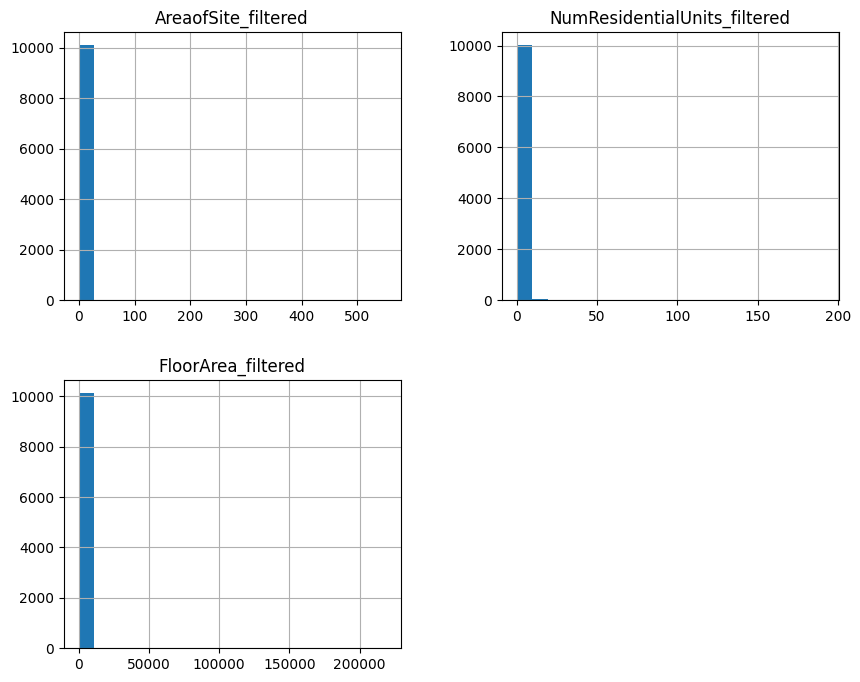

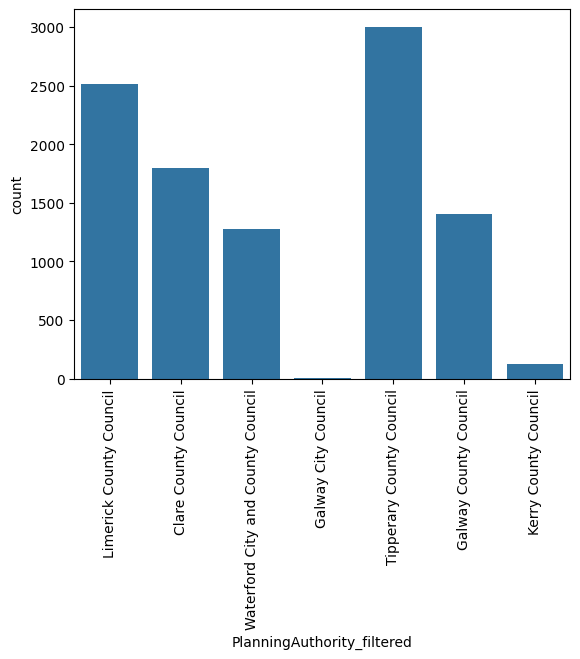

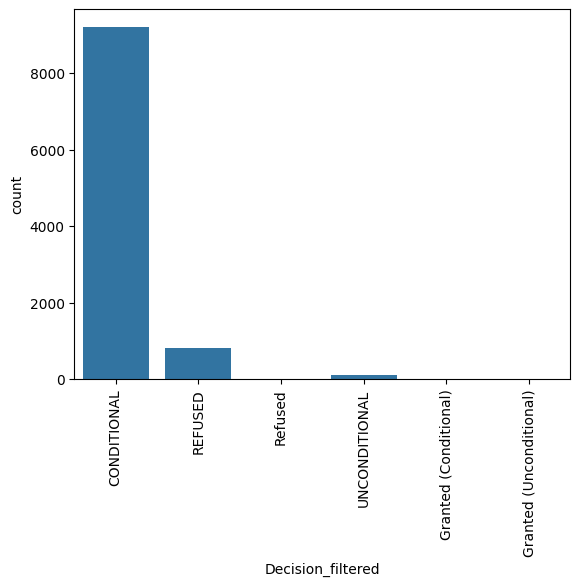

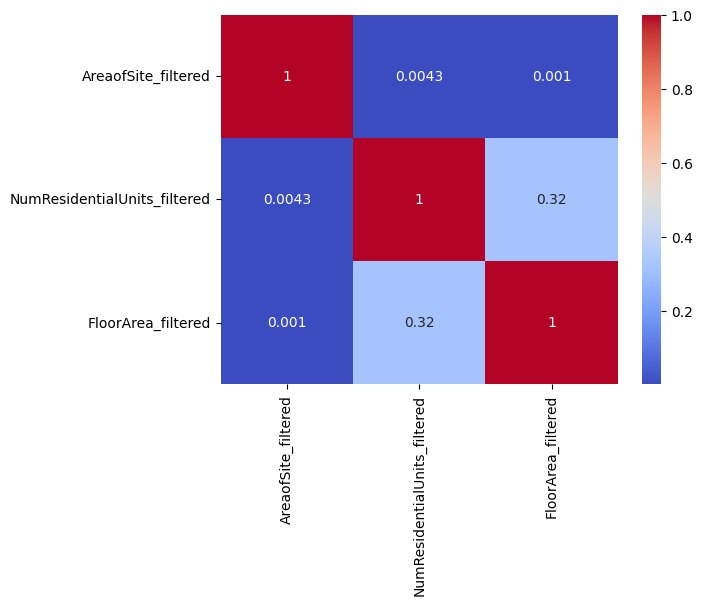

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Summary statistics
summary_stats = df_combined_filtered.describe()
print(summary_stats)

# Step 2: Histograms for numerical features
numerical_columns = ['AreaofSite_filtered', 'NumResidentialUnits_filtered', 'FloorArea_filtered']
df_combined_filtered[numerical_columns].hist(bins=20, figsize=(10, 8))
plt.show()

# Step 3: Count plot for categorical variables
categorical_columns = ['PlanningAuthority_filtered', 'Decision_filtered']
for col in categorical_columns:
    sns.countplot(data=df_combined_filtered, x=col)
    plt.xticks(rotation=90)
    plt.show()

# Step 4: Correlation matrix
correlation_matrix = df_combined_filtered[numerical_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


In [23]:
# Step 1: Define criteria for problematic applications
# Applications that were rejected or required extensions/appeals
df_combined_filtered['Problematic'] = df_combined_filtered.apply(lambda row: 1 if row['Decision_filtered'] == 'Refused' else 0, axis=1)

# Step 2: Print value counts to check the distribution
print(df_combined_filtered['Problematic'].value_counts())


Problematic
0    10125
1        2
Name: count, dtype: int64


<ipython-input-23-748df4b4313f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_combined_filtered['Problematic'] = df_combined_filtered.apply(lambda row: 1 if row['Decision_filtered'] == 'Refused' else 0, axis=1)


In [24]:
# Step 1: Calculate processing time (in days)
df_combined_filtered['ProcessingTime'] = (pd.to_datetime(df_combined_filtered['DecisionDate_filtered']) - pd.to_datetime(df_combined_filtered['ReceivedDate_filtered'])).dt.days

# Step 2: Define an application as problematic if the processing time exceeds a threshold (e.g., 180 days)
df_combined_filtered['Problematic'] = df_combined_filtered['ProcessingTime'].apply(lambda x: 1 if x > 180 else 0)

# Step 3: Print value counts to check the distribution
print(df_combined_filtered['Problematic'].value_counts())


Problematic
0    8788
1    1339
Name: count, dtype: int64


<ipython-input-24-e7b2feb0a33d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_combined_filtered['ProcessingTime'] = (pd.to_datetime(df_combined_filtered['DecisionDate_filtered']) - pd.to_datetime(df_combined_filtered['ReceivedDate_filtered'])).dt.days
<ipython-input-24-e7b2feb0a33d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_combined_filtered['Problematic'] = df_combined_filtered['ProcessingTime'].apply(lambda x: 1 if x > 180 else 0)


In [4]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')


Mounted at /content/drive


In [5]:
import os

# List files in the directory to find the correct path
file_path = '/content/drive/MyDrive/'
files = os.listdir(file_path)
print(files)  # This will print the files in your MyDrive folder


['batch_summaries_42280.csv', 'batch_summaries_42300.csv', 'batch_summaries_42320.csv', 'batch_summaries_42340.csv', 'batch_summaries_42360.csv', 'batch_summaries_42380.csv', 'batch_summaries_42400.csv', 'batch_summaries_42420.csv', 'batch_summaries_42440.csv', 'batch_summaries_42460.csv', 'batch_summaries_42480.csv', 'batch_summaries_42500.csv', 'batch_summaries_42520.csv', 'batch_summaries_42540.csv', 'batch_summaries_42560.csv', 'batch_summaries_42580.csv', 'batch_summaries_42600.csv', 'batch_summaries_42620.csv', 'batch_summaries_42640.csv', 'batch_summaries_42660.csv', 'batch_summaries_42680.csv', 'batch_summaries_42700.csv', 'batch_summaries_42720.csv', 'batch_summaries_42740.csv', 'batch_summaries_42760.csv', 'batch_summaries_42780.csv', 'batch_summaries_42800.csv', 'batch_summaries_42820.csv', 'batch_summaries_42840.csv', 'batch_summaries_42860.csv', 'batch_summaries_42880.csv', 'batch_summaries_42900.csv', 'batch_summaries_42920.csv', 'batch_summaries_42940.csv', 'batch_summar

In [7]:
import os

# Check the contents of your MyDrive to verify the file path
file_path = '/content/drive/MyDrive/'
files = os.listdir(file_path)
print(files)  # This will display the files in your MyDrive folder


['batch_summaries_42280.csv', 'batch_summaries_42300.csv', 'batch_summaries_42320.csv', 'batch_summaries_42340.csv', 'batch_summaries_42360.csv', 'batch_summaries_42380.csv', 'batch_summaries_42400.csv', 'batch_summaries_42420.csv', 'batch_summaries_42440.csv', 'batch_summaries_42460.csv', 'batch_summaries_42480.csv', 'batch_summaries_42500.csv', 'batch_summaries_42520.csv', 'batch_summaries_42540.csv', 'batch_summaries_42560.csv', 'batch_summaries_42580.csv', 'batch_summaries_42600.csv', 'batch_summaries_42620.csv', 'batch_summaries_42640.csv', 'batch_summaries_42660.csv', 'batch_summaries_42680.csv', 'batch_summaries_42700.csv', 'batch_summaries_42720.csv', 'batch_summaries_42740.csv', 'batch_summaries_42760.csv', 'batch_summaries_42780.csv', 'batch_summaries_42800.csv', 'batch_summaries_42820.csv', 'batch_summaries_42840.csv', 'batch_summaries_42860.csv', 'batch_summaries_42880.csv', 'batch_summaries_42900.csv', 'batch_summaries_42920.csv', 'batch_summaries_42940.csv', 'batch_summar

In [12]:
df_combined_filtered = pd.read_csv('/content/drive/MyDrive/combined_filtered_planning_applications.csv')


In [13]:
# Step 1: Calculate processing time (in days)
df_combined_filtered['ProcessingTime'] = (pd.to_datetime(df_combined_filtered['DecisionDate_filtered']) - pd.to_datetime(df_combined_filtered['ReceivedDate_filtered'])).dt.days

# Check the first few rows to confirm the 'ProcessingTime' calculation
print(df_combined_filtered[['ReceivedDate_filtered', 'DecisionDate_filtered', 'ProcessingTime']].head())


       ReceivedDate_filtered      DecisionDate_filtered  ProcessingTime
0  2017-01-03 00:00:00+00:00  2017-05-25 00:00:00+00:00             142
1  2017-01-10 00:00:00+00:00  2017-04-28 00:00:00+00:00             108
2  2017-02-16 00:00:00+00:00  2017-04-07 00:00:00+00:00              50
3  2017-02-16 00:00:00+00:00  2017-04-07 00:00:00+00:00              50
4  2017-02-16 00:00:00+00:00  2017-04-06 00:00:00+00:00              49


In [14]:
# Step 2: Define an application as problematic if the processing time exceeds a threshold (e.g., 180 days)
df_combined_filtered['Problematic'] = df_combined_filtered['ProcessingTime'].apply(lambda x: 1 if x > 180 else 0)

# Step 3: Print value counts to check the distribution
print(df_combined_filtered['Problematic'].value_counts())


Problematic
0    8788
1    1339
Name: count, dtype: int64


In [15]:
print(df_combined_filtered[['ReceivedDate_filtered', 'DecisionDate_filtered', 'ProcessingTime', 'Problematic']].head())


       ReceivedDate_filtered      DecisionDate_filtered  ProcessingTime  \
0  2017-01-03 00:00:00+00:00  2017-05-25 00:00:00+00:00             142   
1  2017-01-10 00:00:00+00:00  2017-04-28 00:00:00+00:00             108   
2  2017-02-16 00:00:00+00:00  2017-04-07 00:00:00+00:00              50   
3  2017-02-16 00:00:00+00:00  2017-04-07 00:00:00+00:00              50   
4  2017-02-16 00:00:00+00:00  2017-04-06 00:00:00+00:00              49   

   Problematic  
0            0  
1            0  
2            0  
3            0  
4            0  


In [16]:
# Filter problematic applications (where 'Problematic' is 1)
problematic_apps = df_combined_filtered[df_combined_filtered['Problematic'] == 1]

# Display the first few rows of problematic applications
print(problematic_apps[['ReceivedDate_filtered', 'DecisionDate_filtered', 'ProcessingTime', 'Problematic']].head())

# Get the total count of problematic applications
print(f"Total number of problematic applications: {len(problematic_apps)}")


        ReceivedDate_filtered      DecisionDate_filtered  ProcessingTime  \
10  2017-02-20 00:00:00+00:00  2018-02-07 00:00:00+00:00             352   
19  2017-02-27 00:00:00+00:00  2017-09-14 00:00:00+00:00             199   
59  2017-03-23 00:00:00+00:00  2017-10-19 00:00:00+00:00             210   
66  2017-03-23 00:00:00+00:00  2017-11-15 00:00:00+00:00             237   
81  2017-04-03 00:00:00+00:00  2017-10-11 00:00:00+00:00             191   

    Problematic  
10            1  
19            1  
59            1  
66            1  
81            1  
Total number of problematic applications: 1339


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Handle missing values
df_combined_filtered.ffill(inplace=True)

# Encode categorical features if necessary (e.g., PlanningAuthority_filtered, ApplicationType_filtered)
label_encoder = LabelEncoder()

# Assuming 'PlanningAuthority_filtered' and 'ApplicationType_filtered' are categorical columns
df_combined_filtered['PlanningAuthority_encoded'] = label_encoder.fit_transform(df_combined_filtered['PlanningAuthority_filtered'])
df_combined_filtered['ApplicationType_encoded'] = label_encoder.fit_transform(df_combined_filtered['ApplicationType_filtered'])

# Define the features and target variable
features = ['PlanningAuthority_encoded', 'ApplicationType_encoded', 'ProcessingTime']  # Add relevant features
target = 'Problematic'

X = df_combined_filtered[features]
y = df_combined_filtered[target]

# Split the data into training and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize/normalize the numerical features (if needed)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Preprocessing complete. Ready to move on to model selection.")


Preprocessing complete. Ready to move on to model selection.


In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Step 1: Initialize the model
log_reg_model = LogisticRegression(random_state=42)

# Step 2: Train the model on the training data
log_reg_model.fit(X_train_scaled, y_train)

# Step 3: Make predictions on the test set
y_pred = log_reg_model.predict(X_test_scaled)

# Step 4: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy * 100:.2f}%")
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)


Accuracy: 99.95%

Confusion Matrix:
 [[1758    1]
 [   0  267]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1759
           1       1.00      1.00      1.00       267

    accuracy                           1.00      2026
   macro avg       1.00      1.00      1.00      2026
weighted avg       1.00      1.00      1.00      2026



In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Handle missing values using forward fill
df_combined_filtered.ffill(inplace=True)

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode categorical features
df_combined_filtered['PlanningAuthority_encoded'] = label_encoder.fit_transform(df_combined_filtered['PlanningAuthority_filtered'])
df_combined_filtered['ApplicationType_encoded'] = label_encoder.fit_transform(df_combined_filtered['ApplicationType_filtered'])

# Define the feature columns you want to use
# Ensure these are all numeric
feature_columns = ['PlanningAuthority_encoded', 'ApplicationType_encoded', 'ProcessingTime']

# Define the target variable
target = 'Problematic'

# Extract features (`X`) and target (`y`)
X = df_combined_filtered[feature_columns]
y = df_combined_filtered[target]

# Split the data into training and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the training data, transform the test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Preprocessing complete. Ready to move on to model selection.")


Preprocessing complete. Ready to move on to model selection.


In [24]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
log_reg_model = LogisticRegression(random_state=42, max_iter=1000)  # Increased max_iter in case of convergence issues

# Perform 5-fold cross-validation on the training data
cross_val_scores = cross_val_score(log_reg_model, X_train_scaled, y_train, cv=5, scoring='accuracy')

print("Cross-validation scores:", cross_val_scores)
print("Average cross-validation score: {:.2f}%".format(cross_val_scores.mean() * 100))


Cross-validation scores: [0.99876619 1.         0.99876543 0.99753086 0.99938272]
Average cross-validation score: 99.89%


In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)

# Train the model
rf_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)

print(f"Random Forest Accuracy: {accuracy_rf * 100:.2f}%")
print("\nConfusion Matrix:\n", conf_matrix_rf)
print("\nClassification Report:\n", class_report_rf)


Random Forest Accuracy: 100.00%

Confusion Matrix:
 [[1759    0]
 [   0  267]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1759
           1       1.00      1.00      1.00       267

    accuracy                           1.00      2026
   macro avg       1.00      1.00      1.00      2026
weighted avg       1.00      1.00      1.00      2026



In [26]:
from xgboost import XGBClassifier

# Initialize the XGBoost model
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Train the model
xgb_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_xgb = xgb_model.predict(X_test_scaled)

# Evaluate the model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
class_report_xgb = classification_report(y_test, y_pred_xgb)

print(f"XGBoost Accuracy: {accuracy_xgb * 100:.2f}%")
print("\nConfusion Matrix:\n", conf_matrix_xgb)
print("\nClassification Report:\n", class_report_xgb)


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:49:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 99.80%

Confusion Matrix:
 [[1756    3]
 [   1  266]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1759
           1       0.99      1.00      0.99       267

    accuracy                           1.00      2026
   macro avg       0.99      1.00      1.00      2026
weighted avg       1.00      1.00      1.00      2026



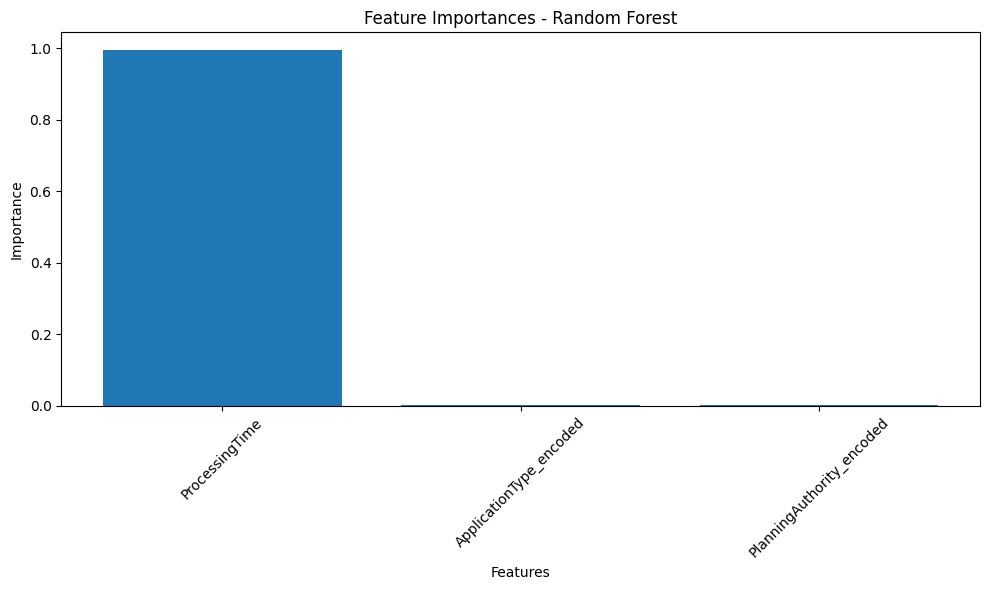

In [27]:
import matplotlib.pyplot as plt
import numpy as np

# Feature importances for Random Forest
importances = rf_model.feature_importances_
feature_names = feature_columns

# Sort the features by importance
indices = np.argsort(importances)[::-1]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances - Random Forest")
plt.bar(range(len(importances)), importances[indices], align="center")
plt.xticks(range(len(importances)), [feature_names[i] for i in indices], rotation=45)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()


In [28]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f'Train set size: {X_train.shape[0]}, Test set size: {X_test.shape[0]}')


Train set size: 8101, Test set size: 2026


In [29]:
from sklearn.model_selection import cross_val_score

# Initialize the model (Random Forest as an example)
rf_model = RandomForestClassifier(random_state=42)

# Perform 5-fold cross-validation
cross_val_scores = cross_val_score(rf_model, X_train, y_train, cv=5)
print("Cross-validation scores:", cross_val_scores)
print("Average cross-validation score:", cross_val_scores.mean())


Cross-validation scores: [1. 1. 1. 1. 1.]
Average cross-validation score: 1.0


In [30]:
from sklearn.model_selection import GridSearchCV

# Define a parameter grid for tuning
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
}

# Initialize GridSearchCV
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best parameters from Grid Search:", grid_search.best_params_)


Best parameters from Grid Search: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}


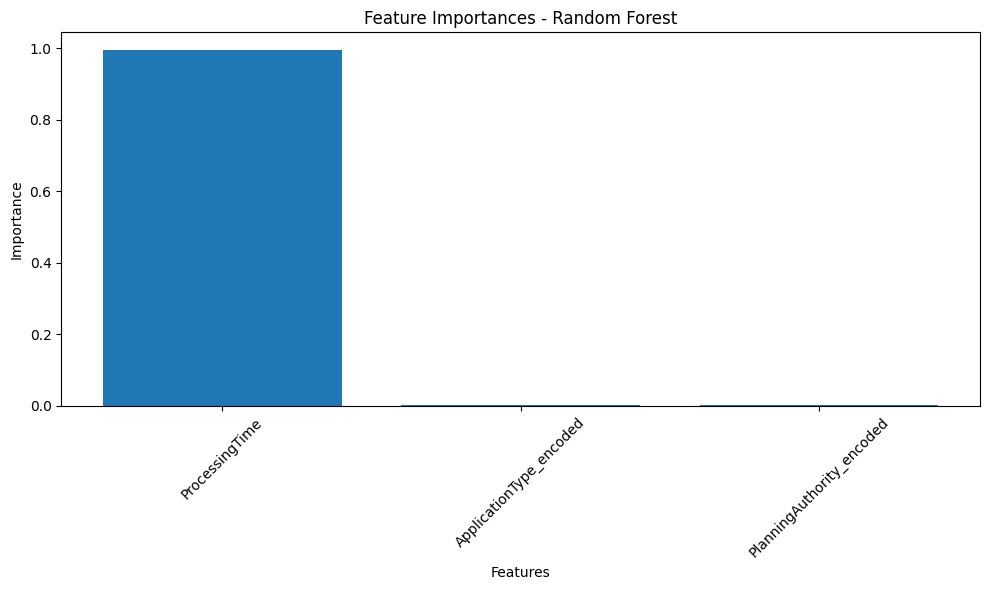

In [31]:
# Fit the model with the best parameters
best_rf_model = grid_search.best_estimator_

# Get feature importances
importances = best_rf_model.feature_importances_
feature_names = X_train.columns

# Sort the features by importance
indices = np.argsort(importances)[::-1]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances - Random Forest")
plt.bar(range(len(importances)), importances[indices], align="center")
plt.xticks(range(len(importances)), [feature_names[i] for i in indices], rotation=45)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()


In [32]:
from sklearn.metrics import confusion_matrix, classification_report

# Predict on the test set
y_pred = best_rf_model.predict(X_test)

# Print confusion matrix and classification report
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[1758    0]
 [   0  268]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1758
           1       1.00      1.00      1.00       268

    accuracy                           1.00      2026
   macro avg       1.00      1.00      1.00      2026
weighted avg       1.00      1.00      1.00      2026



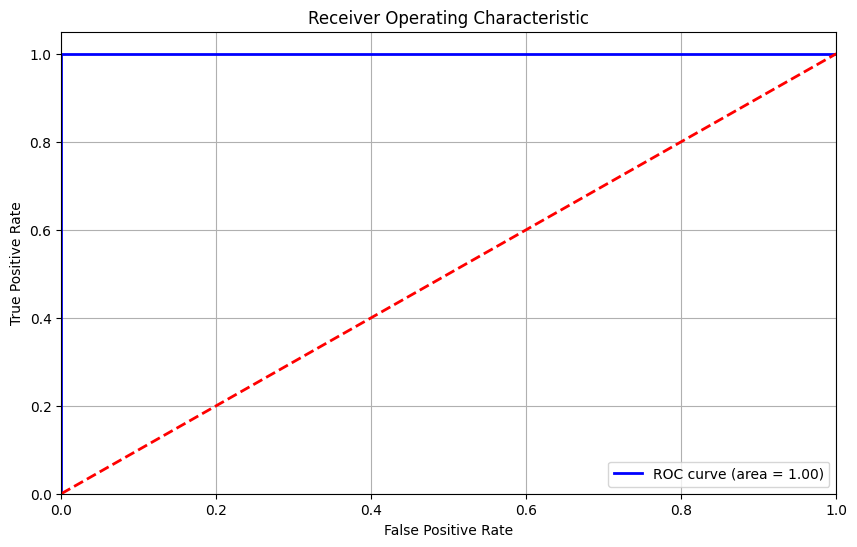

AUC: 1.00


In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming X and y are your feature matrix and labels

# Step 1: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Create and fit the Logistic Regression model
log_reg_model = LogisticRegression()
log_reg_model.fit(X_train, y_train)

# Step 3: Get predicted probabilities
y_probs = log_reg_model.predict_proba(X_test)[:, 1]  # Probability of the positive class

# Step 4: Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Step 5: Calculate AUC
roc_auc = auc(fpr, tpr)

# Step 6: Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# Print the AUC
print(f'AUC: {roc_auc:.2f}')


In [35]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

# Step 1: Make predictions
y_pred = log_reg_model.predict(X_test)

# Step 2: Calculate additional metrics
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Step 3: Print the results
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)


Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Confusion Matrix:
 [[1759    0]
 [   0  267]]


In [36]:
from sklearn.model_selection import cross_val_score

# Step 1: Perform K-fold cross-validation
cv_scores = cross_val_score(log_reg_model, X, y, cv=5)

# Step 2: Print the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Average cross-validation score:", cv_scores.mean())


Cross-validation scores: [1.         1.         0.99901235 1.         1.        ]
Average cross-validation score: 0.9998024691358024
